# ER 131: California Emissions
Contributors: Devon Madeksiak, Sarah Ding, Michelle Kaganovsky, and Justin Wong



# Prediction Problems

1. KNN for something

2. Ridge/Lasso/Regulatization Regressions for something

3. Forest Regression



# Sections

1. [Viewing Files and Preliminary Exploration](##Viewing-Files-and-Preliminary-Exploration)
    - [Exploring all the Vista CA files](#Exploring-all-the-Vista-CA-files)
        * [Looking at an Invidiual Geopandas File in Vista CA](#Looking-at-an-Invidiual-Geopandas-File-in-Vista-CA)
    - [Exploring Counties](#Exploring-Counties)
        * [About CA_Counties](#About-CA_Counties)
    - [Exploring California Air Resources Board EMSEIC emissions](#Exploring-California-Air-Resources-Board-EMSEIC-emissions)
        * [About EMSEIC](#About-EMSEIC)
        * [EMSEIC Factsheet and Acronyms](#EMSEIC-Factsheet-and-Acronyms)
        * [Looking at an Invidiual County from EMSEIC data](#Looking-at-an-Invidiual-County-from-EMSEIC-data)
        
        
2. [Data Extraction, Cleaning, and Preparation](#Data-Extraction,-Cleaning,-and-Preparation)
    - [Extracting All Vista CA dataframe](#Extracting-All-Vista-CA-dataframe)
        * [Cleaning and Standardizing all Vista CA Dataframe](#Cleaning-and-Standardizing-all-Vista-CA-Dataframe)
        * [Finding the Closest County Centroid](#Finding-the-Closest-County-Centroid)
        * [Displaced Stations](#Displaced-Stations)
        * [Save Cleaned and Combined Vista CA and CA Counties Dataframe as CSV](#Save-Cleaned-and-Combined-Vista-CA-and-CA-Counties-Dataframe-as-CSV)
        * [Prelim EDA Plots](#Prelim-EDA-Plots)
            * [Displaying Counts of Nearest County Centroid in Vista CA](#Displaying-Counts-of-Nearest-County-Centroid-in-Vista-CA)
            * [Displaying Uniqueness Count of `VistaSType` , `VistaIPCC`, and `City`](#Displaying-Uniqueness-Count-of-VistaSType-,-VistaIPCC,-and-City)
    -  [Extracting All EMSEIC](#Extracting-All-EMSEIC)
   
   
3. [Data Aggregation and Consolidation](#Data-Aggregation-and-Consolidation)
    - [Standardizing Spelling of Counties in EMSEIC with CA Counties](#Standardizing-Spelling-of-Counties-in-EMSEIC-with-CA-Counties)
    - [Combining Our Datasets](#Combining-Our-Datasets)
        * [Merging Vista CA with CA Counties](#Merging-Vista-CA-with-CA-Counties)
        * [Aggregating EMSEIC](#Aggregating-EMSEIC)
        * [Merging Combined Vista CA + CA Counties with Aggregated EMSEIC](#Merging-Combined-Vista-CA-+-CA-Counties-with-Aggregated-EMSEIC)
        
[References and Datasources](#References-and-Datasources)



In [230]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import requests, os
from os import path
import  math

##  Viewing Files and Preliminary Exploration

All data sources are referenced at the bottom of the page

### Exploring all the Vista CA files

We see that Vista CA provides spatial data products with identified and organized locations of potential methane (CH4) emitting facilities and infrastructure spanning the State of California. However, it is missing the actual measurement. 

Vista-CA spatial datasets identify and classify potential methane source emitters in California. Vista-CA spatial datasets were created utilizing an assortment of publicly available data sources ranging from local, state, and federal agencies. 

The Vista-CA data product is a key tool for CH4 emissions research and mitigation efforts; by (1) mapping areas of CH4 emitting infrastructure, (2) identifying targets for CH4 surveys, and (3) enabling interpretation of atmospheric observations, including source attribution, and comparison of measured emissions to permitted or reported emissions. Combined with atmospheric observations, Vista enables systematic study of CH4 emission sources.

In [2]:
## Exploring all te Vista CA files
!ls data/NACP_Vista_CA_CH4_Inventory_1726/data


Vista_CA_Composting_Sites
Vista_CA_Composting_Sites.zip
Vista_CA_Dairies
Vista_CA_Dairies.zip
Vista_CA_Digesters
Vista_CA_Digesters.zip
Vista_CA_Feed_Lots
Vista_CA_Feed_Lots.zip
Vista_CA_Landfills
Vista_CA_Landfills.zip
Vista_CA_NG_Fueling_Stations
Vista_CA_NG_Fueling_Stations.zip
Vista_CA_NG_Stations
Vista_CA_NG_Stations.zip
Vista_CA_Oil_and_Gas_Facilities
Vista_CA_Oil_and_Gas_Facilities.zip
Vista_CA_Oil_and_Gas_Field_Boundaries
Vista_CA_Oil_and_Gas_Field_Boundaries.zip
Vista_CA_Oil_and_Gas_Wells
Vista_CA_Oil_and_Gas_Wells.zip
Vista_CA_Power_Plants
Vista_CA_Power_Plants.zip
Vista_CA_Processing_Plants
Vista_CA_Processing_Plants.zip
Vista_CA_Refineries
Vista_CA_Refineries.zip
Vista_CA_Storage_Fields
Vista_CA_Storage_Fields.zip
Vista_CA_Wastewater_Treatment_Plants
Vista_CA_Wastewater_Treatment_Plants.zip


In [3]:
!ls data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Composting_Sites


Vista_CA_Composting_Sites.dbf Vista_CA_Composting_Sites.sbx
Vista_CA_Composting_Sites.prj Vista_CA_Composting_Sites.shp
Vista_CA_Composting_Sites.sbn Vista_CA_Composting_Sites.shx


#### Looking at an Invidiual Geopandas File in Vista CA

In [4]:
compositing_sites_fn = "data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Composting_Sites/Vista_CA_Composting_Sites.shp"
compositing_sites = gpd.read_file(compositing_sites_fn)
compositing_sites.head()

Latitude  Longitude                               VistaIPCC  \
0  37.72799 -120.89865  4B Biological Treatment of Solid Waste   
1  33.70999 -117.32864  4B Biological Treatment of Solid Waste   
2  38.01667 -122.13333  4B Biological Treatment of Solid Waste   
3  34.03281 -118.35424  4B Biological Treatment of Solid Waste   
4  34.44517 -117.29007  4B Biological Treatment of Solid Waste   

                                  VistaName        VistaSType   Vista_ID  \
0                                3D Ag, LLC  Composting Sites  CMP000001   
1                    A. Lua Recycling, Inc.  Composting Sites  CMP000002   
2          Acme Composting Compost Facility  Composting Sites  CMP000003   
3                       Adams Garden Supply  Composting Sites  CMP000004   
4  Advance Disposal Center for the Environm  Composting Sites  CMP000005   

    VistaDate State                City      Source  \
0  2019-08-20    CA             Oakdale  CalRecycle   
1  2019-08-20    CA       Lake Elsinore  CalRecycle   
2  2019-08-20    CA            Martinez  CalRecycle   
3  2019-08-20    CA  Los Angeles (City)  CalRecycle   
4  2019-08-20    CA            Hesperia  CalRecycle   

                                            geometry  
0  POLYGON ((-120.89865 37.72808, -120.89863 37.7...  
1  POLYGON ((-117.32864 33.71008, -117.32862 33.7...  
2  POLYGON ((-122.13333 38.01676, -122.13331 38.0...  
3  POLYGON ((-118.35424 34.03290, -118.35422 34.0...  
4  POLYGON ((-117.29007 34.44526, -117.29005 34.4...

In [6]:
print("There are {w} sites.".format(w=compositing_sites.shape[0]))

compositing_sites['Vista_ID'].value_counts()


There are 430 sites.


CMP000022    2
CMP000311    2
CMP000121    2
CMP000128    2
CMP000185    2
            ..
CMP000016    1
CMP000034    1
CMP000231    1
CMP000152    1
CMP000202    1
Name: Vista_ID, Length: 418, dtype: int64

In [7]:
compositing_sites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

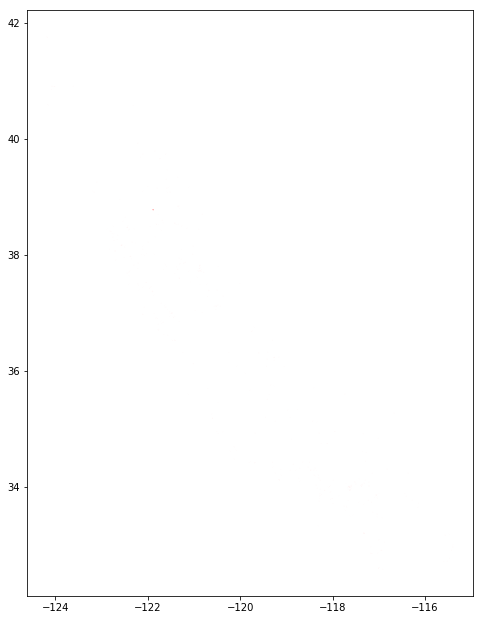

In [8]:
fig, ax = plt.subplots(figsize=(8,12))

compositing_sites.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3)

In [9]:
o_and_g_fn = "data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Oil_and_Gas_Facilities/Vista_CA_Oil_and_Gas_Facilities.shp"
oil_and_gas = gpd.read_file(o_and_g_fn)
oil_and_gas.head()



Vista_ID                VistaIPCC                   VistaName  \
0  FAB000036  1B2 Oil and Natural Gas             Aera Energy LLC   
1  FAB001335  1B2 Oil and Natural Gas      Dole Enterprises, Inc.   
2  FAB001589  1B2 Oil and Natural Gas  ERG Operating Company, LLC   
3  FAB001590  1B2 Oil and Natural Gas  ERG Operating Company, LLC   
4  FAB000030  1B2 Oil and Natural Gas          Aalpha Energy Inc.   

                      VistaSType  VistaDate   Latitude   Longitude Source  \
0  Oil and Gas Facility Boundary  8/20/2019  34.314766 -119.298972    CEC   
1  Oil and Gas Facility Boundary  8/20/2019  35.396192 -119.162234    CEC   
2  Oil and Gas Facility Boundary  8/20/2019  34.852297 -120.280802    CEC   
3  Oil and Gas Facility Boundary  8/20/2019  34.838018 -120.300527    CEC   
4  Oil and Gas Facility Boundary  8/20/2019  33.998134 -118.049691    CEC   

  State                                           geometry  
0    CA  POLYGON ((-119.29877 34.31434, -119.29916 34.3...  
1    CA  POLYGON ((-119.16244 35.39628, -119.16202 35.3...  
2    CA  POLYGON ((-120.28095 34.85282, -120.28009 34.8...  
3    CA  POLYGON ((-120.30181 34.83876, -120.30163 34.8...  
4    CA  POLYGON ((-118.04981 33.99837, -118.04980 33.9...

In [10]:
print("There are {w} sites.".format(w=oil_and_gas.shape[0]))

oil_and_gas['VistaName'].value_counts()


There are 3356 sites.


Chevron U.S.A. Inc.                               533
Vintage Production California LLC                 399
Aera Energy LLC                                   268
E & B Natural Resources Management Corporation    204
Linn Operating, Inc.                               95
                                                 ... 
John O. Richardson                                  1
Gary A. Darnell, Trust                              1
PS126 Investments, LLC                              1
Well Water Management                               1
TRC Cypress Group LLC                               1
Name: VistaName, Length: 364, dtype: int64

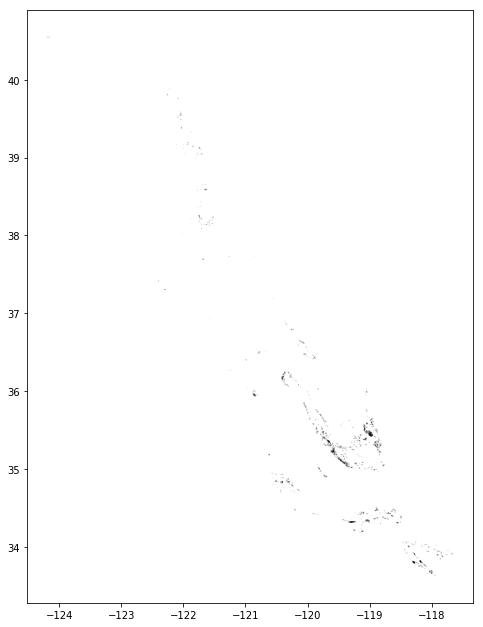

In [11]:
fig, ax = plt.subplots(figsize=(8,12))

oil_and_gas.plot(ax=ax, color = 'blue', edgecolor='black', alpha = .3)



### Exploring Counties

#### About CA_Counties
The TIGER/Line shapefiles and related database files (.dbf) are an extract of selected geographic and cartographic information from the U.S. Census Bureau's Master Address File / Topologically Integrated Geographic Encoding and Referencing (MAF/TIGER) Database (MTDB)

This particular CA_Counties dataset was actually from Fall 2020 ER 131 Lab 3.


In [162]:
counties = gpd.read_file('data/CA_Counties/CA_Counties_TIGER2016.shp')


## Extract latitude and longitude
counties['Centroid_Latitude'] = pd.Series(counties['INTPTLAT'], dtype=np.float64)
counties['Centroid_Longitude'] = pd.Series(counties['INTPTLON'], dtype=np.float64)
counties.head()

STATEFP COUNTYFP  COUNTYNS  GEOID           NAME              NAMELSAD LSAD  \
0      06      091  00277310  06091         Sierra         Sierra County   06   
1      06      067  00277298  06067     Sacramento     Sacramento County   06   
2      06      083  00277306  06083  Santa Barbara  Santa Barbara County   06   
3      06      009  01675885  06009      Calaveras      Calaveras County   06   
4      06      111  00277320  06111        Ventura        Ventura County   06   

  CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND      AWATER  \
0      H1  G4020  None   None     None        A  2468694587    23299110   
1      H1  G4020   472  40900     None        A  2499183617    76073827   
2      H1  G4020  None  42200     None        A  7084000598  2729814515   
3      H1  G4020  None   None     None        A  2641820834    43806026   
4      H1  G4020   348  37100     None        A  4773390489   945942791   

      INTPTLAT      INTPTLON  \
0  +39.5769252  -120.5219926   
1  +38.4500114  -121.3404409   
2  +34.5370572  -120.0399729   
3  +38.1838996  -120.5614415   
4  +34.3587415  -119.1331432   

                                            geometry  Centroid_Latitude  \
0  POLYGON ((-13431319.751 4821511.426, -13431312...          39.576925   
1  POLYGON ((-13490651.476 4680831.603, -13490511...          38.450011   
2  MULTIPOLYGON (((-13423116.772 4042044.149, -13...          34.537057   
3  POLYGON ((-13428575.483 4627725.228, -13428534...          38.183900   
4  MULTIPOLYGON (((-13317853.594 3931602.414, -13...          34.358742   

   Centroid_Longitude  
0         -120.521993  
1         -121.340441  
2         -120.039973  
3         -120.561442  
4         -119.133143

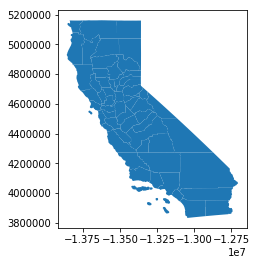

In [13]:
# Create a map of the CA counties
counties.plot();
# counties[counties['Latitude'] == min(counties['Latitude'])]


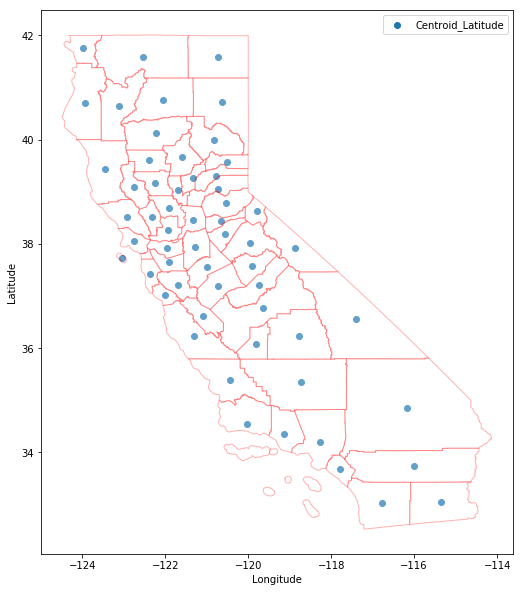

In [334]:
## The centroids of each county


fig, ax = plt.subplots(figsize=(15,10))

plt.scatter(counties_wgs84['Centroid_Longitude'],counties_wgs84['Centroid_Latitude'])
counties_wgs84.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3)

ax.axis('on') # You can optionally omit the axes


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()




In [15]:
## Seeing how Vista CA relates to County
print("oil_and_gas geomerty data type:")
print(oil_and_gas.geometry.type.unique())

print("\nCounties geomerty data type:")
print(counties.geometry.type.unique())

print(oil_and_gas.crs)
print(counties.crs)

oil_and_gas geomerty data type:
['Polygon']

Counties geomerty data type:
['Polygon' 'MultiPolygon']
epsg:4326
epsg:3857


In [163]:
counties_wgs84 = counties.to_crs(epsg=4326, inplace=False)
assert counties_wgs84.crs == 'epsg:4326'



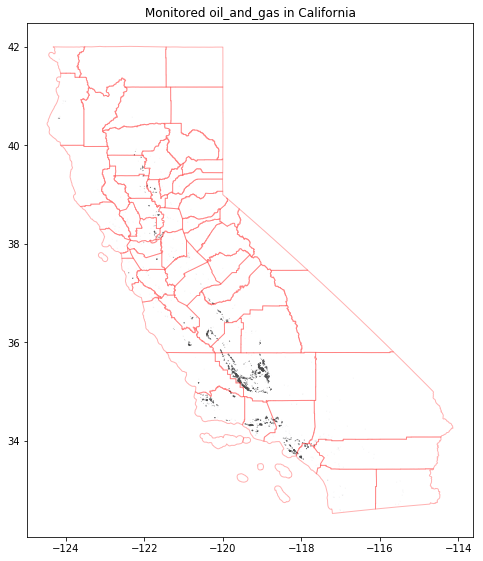

In [17]:
fig, ax = plt.subplots(figsize=(8,12))

compositing_sites.plot(ax=ax, color = 'blue', edgecolor='black', alpha = 2, markersize = 50)

oil_and_gas.plot(ax=ax, color = 'blue', edgecolor='black', alpha = 2, markersize = 50)

counties_wgs84.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3)

ax.axis('on') # You can optionally omit the axes

# Show a title
ax.set_title('Monitored oil_and_gas in California')

plt.show()

### Exploring California Air Resources Board EMSEIC emissions

#### About EMSEIC
EMSEIC stands for Emissions Specific information by California County. All emissions are represented in `Tons per Day` and reflect the most current data provided to ARB, the California Air Resources Board. 

#### EMSEIC Factsheet and Acronyms
From the factsheet at https://ww3.arb.ca.gov/ei/speciate/factsheets_model_ei_speciation_tog_8_00.pdf. These are standard air pollutants that are measured.

`TOG`: Total Organic Gas emissions

`ROG`: Reactive Organic Gas emissions

`COT`: Carbon Monoxide Totals

`NOX`: Nitrous Oxide

`SOX`: Sulfur Oxide

`PM`: Particulate Matter

In [18]:
## EMSEIC = EMissions SpEcific Info by County in California
def download_all_arb_CA_counties_emseic():
    base = "https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2012&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO="
    files = os.listdir('data/emseic')
    for i in range(1, 59):
        county_download_url = base + str(i)
        csv_file = "emseic_{i}.csv".format(i=i)
        fn = "data/emseic/" + csv_file
        if csv_file not in files:
            r = requests.get(county_download_url)
            open(fn, 'wb').write(r.content)

            print("Processed {fn} <-- {url}".format(fn=fn, url=county_download_url))
        else:
            print("Already downloaded {fn}!".format(fn=fn))

download_all_arb_CA_counties_emseic()


Already downloaded data/emseic/emseic_1.csv!
Already downloaded data/emseic/emseic_2.csv!
Already downloaded data/emseic/emseic_3.csv!
Already downloaded data/emseic/emseic_4.csv!
Already downloaded data/emseic/emseic_5.csv!
Already downloaded data/emseic/emseic_6.csv!
Already downloaded data/emseic/emseic_7.csv!
Already downloaded data/emseic/emseic_8.csv!
Already downloaded data/emseic/emseic_9.csv!
Already downloaded data/emseic/emseic_10.csv!
Already downloaded data/emseic/emseic_11.csv!
Already downloaded data/emseic/emseic_12.csv!
Already downloaded data/emseic/emseic_13.csv!
Already downloaded data/emseic/emseic_14.csv!
Already downloaded data/emseic/emseic_15.csv!
Already downloaded data/emseic/emseic_16.csv!
Already downloaded data/emseic/emseic_17.csv!
Already downloaded data/emseic/emseic_18.csv!
Already downloaded data/emseic/emseic_19.csv!
Already downloaded data/emseic/emseic_20.csv!
Already downloaded data/emseic/emseic_21.csv!
Already downloaded data/emseic/emseic_22.cs

In [388]:
## EMSEIC = EMissions SpEcific Info by County in California

def download_to_directory_as_fn(fdirectory, fn, source):
    ## write to this specific path
    full_fn = "{fdir}/{csv}".format(fdir=fdirectory, csv=fn)
    
    if fn not in fdirectory:
        r = requests.get(source)
        open(full_fn, 'wb').write(r.content)
        print("Processed {fn} to {dest} <-- {url}".format(fn=fn, url=source, dest=fdirectory))
    else:
        print("Already downloaded {fn}!".format(fn=fn))
'''
downloads Califfornia Air Resources Board emissions data
filtered by year and county. Defaults to Alameda county
'''
def download_all_arb_CA_counties_emseic_by_year_and_county(year, county=0, fdir=''):
    base = "https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR={year}&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=".format(year=year)
    ## Check if emseic/{year} currently exists as a folder and if not, create it
    if fdir == '':
        fdir = "data/emseic/{year}".format(year=year)
    else:
        fdir = "data/emseic/{custom}".format(custom=fdir)
    files = []
    if path.isdir(fdir):
        files = os.listdir(fdir)
    else:
        os.mkdir(fdir)
        print("Directory '%s' created" %fdir) 
        
    if county == 0:
        for i in range(1, 59):
            county_download_url = base + str(i)
            csv_file = "emseic_{year}_{i}.csv".format(i=i, year=year)
            fn = "{fdir}/{csv}".format(fdir=fdir, csv=csv_file)
            download_to_directory_as_fn(fdir, csv_file, county_download_url)
    else:
        county_download_url = base + str(county)
        csv_file = "emseic_{year}_{c}.csv".format(c=county, year=year)
        fn = "{fdir}/{csv}".format(fdir=fdir, csv=csv_file)
        download_to_directory_as_fn(fdir, csv_file, county_download_url)
            
def download_all_arb_CA_counties_emseic_by_yearrange_and_county(begin, end, county=0, fdir=''):
    for y in range(begin, end+1):
        download_all_arb_CA_counties_emseic_by_year_and_county(y, county=county, fdir=fdir)
        
def download_all_arb_CA_counties_emseic_all_fast(begin, end):
    for y in range(begin, end+1):
        for c in range(1, 59):
            download_all_arb_CA_counties_emseic_by_year_and_county(y, county=c)


In [406]:
download_all_arb_CA_counties_emseic_all_fast(2020, 2035)

Processed emseic_2020_1.csv to data/emseic/2020 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2020&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=1
Processed emseic_2020_2.csv to data/emseic/2020 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2020&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=2
Processed emseic_2020_3.csv to data/emseic/2020 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2020&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=3
Processed emseic_2020_4.csv to data/emseic/2020 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2020&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=4
Processed emseic_2020_5.csv to data/emseic/2020 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2020&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=5
Processed emseic_2020_6.csv to data/emseic/2020 <-- https://www.arb.ca

Processed emseic_2020_45.csv to data/emseic/2020 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2020&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=45
Processed emseic_2020_46.csv to data/emseic/2020 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2020&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=46
Processed emseic_2020_47.csv to data/emseic/2020 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2020&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=47
Processed emseic_2020_48.csv to data/emseic/2020 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2020&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=48
Processed emseic_2020_49.csv to data/emseic/2020 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2020&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=49
Processed emseic_2020_50.csv to data/emseic/2020 <-- https:/

Processed emseic_2021_31.csv to data/emseic/2021 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2021&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=31
Processed emseic_2021_32.csv to data/emseic/2021 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2021&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=32
Processed emseic_2021_33.csv to data/emseic/2021 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2021&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=33
Processed emseic_2021_34.csv to data/emseic/2021 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2021&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=34
Processed emseic_2021_35.csv to data/emseic/2021 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2021&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=35
Processed emseic_2021_36.csv to data/emseic/2021 <-- https:/

Processed emseic_2022_17.csv to data/emseic/2022 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2022&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=17
Processed emseic_2022_18.csv to data/emseic/2022 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2022&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=18
Processed emseic_2022_19.csv to data/emseic/2022 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2022&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=19
Processed emseic_2022_20.csv to data/emseic/2022 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2022&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=20
Processed emseic_2022_21.csv to data/emseic/2022 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2022&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=21
Processed emseic_2022_22.csv to data/emseic/2022 <-- https:/

Processed emseic_2023_3.csv to data/emseic/2023 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2023&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=3
Processed emseic_2023_4.csv to data/emseic/2023 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2023&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=4
Processed emseic_2023_5.csv to data/emseic/2023 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2023&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=5
Processed emseic_2023_6.csv to data/emseic/2023 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2023&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=6
Processed emseic_2023_7.csv to data/emseic/2023 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2023&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=7
Processed emseic_2023_8.csv to data/emseic/2023 <-- https://www.arb.ca

Processed emseic_2023_47.csv to data/emseic/2023 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2023&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=47
Processed emseic_2023_48.csv to data/emseic/2023 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2023&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=48
Processed emseic_2023_49.csv to data/emseic/2023 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2023&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=49
Processed emseic_2023_50.csv to data/emseic/2023 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2023&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=50
Processed emseic_2023_51.csv to data/emseic/2023 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2023&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=51
Processed emseic_2023_52.csv to data/emseic/2023 <-- https:/

Processed emseic_2024_33.csv to data/emseic/2024 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2024&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=33
Processed emseic_2024_34.csv to data/emseic/2024 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2024&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=34
Processed emseic_2024_35.csv to data/emseic/2024 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2024&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=35
Processed emseic_2024_36.csv to data/emseic/2024 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2024&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=36
Processed emseic_2024_37.csv to data/emseic/2024 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2024&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=37
Processed emseic_2024_38.csv to data/emseic/2024 <-- https:/

Processed emseic_2025_19.csv to data/emseic/2025 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2025&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=19
Processed emseic_2025_20.csv to data/emseic/2025 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2025&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=20
Processed emseic_2025_21.csv to data/emseic/2025 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2025&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=21
Processed emseic_2025_22.csv to data/emseic/2025 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2025&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=22
Processed emseic_2025_23.csv to data/emseic/2025 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2025&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=23
Processed emseic_2025_24.csv to data/emseic/2025 <-- https:/

Processed emseic_2026_5.csv to data/emseic/2026 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2026&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=5
Processed emseic_2026_6.csv to data/emseic/2026 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2026&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=6
Processed emseic_2026_7.csv to data/emseic/2026 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2026&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=7
Processed emseic_2026_8.csv to data/emseic/2026 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2026&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=8
Processed emseic_2026_9.csv to data/emseic/2026 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2026&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=9
Processed emseic_2026_10.csv to data/emseic/2026 <-- https://www.arb.c

Processed emseic_2026_49.csv to data/emseic/2026 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2026&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=49
Processed emseic_2026_50.csv to data/emseic/2026 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2026&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=50
Processed emseic_2026_51.csv to data/emseic/2026 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2026&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=51
Processed emseic_2026_52.csv to data/emseic/2026 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2026&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=52
Processed emseic_2026_53.csv to data/emseic/2026 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2026&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=53
Processed emseic_2026_54.csv to data/emseic/2026 <-- https:/

Processed emseic_2027_35.csv to data/emseic/2027 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2027&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=35
Processed emseic_2027_36.csv to data/emseic/2027 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2027&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=36
Processed emseic_2027_37.csv to data/emseic/2027 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2027&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=37
Processed emseic_2027_38.csv to data/emseic/2027 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2027&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=38
Processed emseic_2027_39.csv to data/emseic/2027 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2027&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=39
Processed emseic_2027_40.csv to data/emseic/2027 <-- https:/

Processed emseic_2028_21.csv to data/emseic/2028 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2028&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=21
Processed emseic_2028_22.csv to data/emseic/2028 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2028&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=22
Processed emseic_2028_23.csv to data/emseic/2028 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2028&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=23
Processed emseic_2028_24.csv to data/emseic/2028 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2028&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=24
Processed emseic_2028_25.csv to data/emseic/2028 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2028&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=25
Processed emseic_2028_26.csv to data/emseic/2028 <-- https:/

Processed emseic_2029_7.csv to data/emseic/2029 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2029&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=7
Processed emseic_2029_8.csv to data/emseic/2029 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2029&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=8
Processed emseic_2029_9.csv to data/emseic/2029 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2029&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=9
Processed emseic_2029_10.csv to data/emseic/2029 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2029&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=10
Processed emseic_2029_11.csv to data/emseic/2029 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2029&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=11
Processed emseic_2029_12.csv to data/emseic/2029 <-- https://www.a

Processed emseic_2029_51.csv to data/emseic/2029 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2029&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=51
Processed emseic_2029_52.csv to data/emseic/2029 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2029&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=52
Processed emseic_2029_53.csv to data/emseic/2029 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2029&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=53
Processed emseic_2029_54.csv to data/emseic/2029 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2029&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=54
Processed emseic_2029_55.csv to data/emseic/2029 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2029&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=55
Processed emseic_2029_56.csv to data/emseic/2029 <-- https:/

Processed emseic_2030_37.csv to data/emseic/2030 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2030&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=37
Processed emseic_2030_38.csv to data/emseic/2030 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2030&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=38
Processed emseic_2030_39.csv to data/emseic/2030 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2030&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=39
Processed emseic_2030_40.csv to data/emseic/2030 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2030&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=40
Processed emseic_2030_41.csv to data/emseic/2030 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2030&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=41
Processed emseic_2030_42.csv to data/emseic/2030 <-- https:/

Processed emseic_2031_23.csv to data/emseic/2031 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2031&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=23
Processed emseic_2031_24.csv to data/emseic/2031 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2031&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=24
Processed emseic_2031_25.csv to data/emseic/2031 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2031&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=25
Processed emseic_2031_26.csv to data/emseic/2031 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2031&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=26
Processed emseic_2031_27.csv to data/emseic/2031 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2031&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=27
Processed emseic_2031_28.csv to data/emseic/2031 <-- https:/

Processed emseic_2032_9.csv to data/emseic/2032 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2032&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=9
Processed emseic_2032_10.csv to data/emseic/2032 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2032&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=10
Processed emseic_2032_11.csv to data/emseic/2032 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2032&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=11
Processed emseic_2032_12.csv to data/emseic/2032 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2032&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=12
Processed emseic_2032_13.csv to data/emseic/2032 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2032&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=13
Processed emseic_2032_14.csv to data/emseic/2032 <-- https://w

Processed emseic_2032_53.csv to data/emseic/2032 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2032&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=53
Processed emseic_2032_54.csv to data/emseic/2032 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2032&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=54
Processed emseic_2032_55.csv to data/emseic/2032 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2032&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=55
Processed emseic_2032_56.csv to data/emseic/2032 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2032&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=56
Processed emseic_2032_57.csv to data/emseic/2032 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2032&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=57
Processed emseic_2032_58.csv to data/emseic/2032 <-- https:/

Processed emseic_2033_39.csv to data/emseic/2033 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2033&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=39
Processed emseic_2033_40.csv to data/emseic/2033 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2033&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=40
Processed emseic_2033_41.csv to data/emseic/2033 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2033&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=41
Processed emseic_2033_42.csv to data/emseic/2033 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2033&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=42
Processed emseic_2033_43.csv to data/emseic/2033 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2033&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=43
Processed emseic_2033_44.csv to data/emseic/2033 <-- https:/

Processed emseic_2034_25.csv to data/emseic/2034 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2034&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=25
Processed emseic_2034_26.csv to data/emseic/2034 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2034&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=26
Processed emseic_2034_27.csv to data/emseic/2034 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2034&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=27
Processed emseic_2034_28.csv to data/emseic/2034 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2034&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=28
Processed emseic_2034_29.csv to data/emseic/2034 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2034&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=29
Processed emseic_2034_30.csv to data/emseic/2034 <-- https:/

Processed emseic_2035_11.csv to data/emseic/2035 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2035&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=11
Processed emseic_2035_12.csv to data/emseic/2035 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2035&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=12
Processed emseic_2035_13.csv to data/emseic/2035 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2035&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=13
Processed emseic_2035_14.csv to data/emseic/2035 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2035&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=14
Processed emseic_2035_15.csv to data/emseic/2035 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2035&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=15
Processed emseic_2035_16.csv to data/emseic/2035 <-- https:/

Processed emseic_2035_55.csv to data/emseic/2035 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2035&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=55
Processed emseic_2035_56.csv to data/emseic/2035 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2035&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=56
Processed emseic_2035_57.csv to data/emseic/2035 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2035&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=57
Processed emseic_2035_58.csv to data/emseic/2035 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2035&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=58


In [389]:
download_all_arb_CA_counties_emseic_all_fast(2013, 2035)

Processed emseic_2013_1.csv to data/emseic/2013 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2013&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=1
Processed emseic_2013_2.csv to data/emseic/2013 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2013&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=2
Processed emseic_2013_3.csv to data/emseic/2013 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2013&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=3
Processed emseic_2013_4.csv to data/emseic/2013 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2013&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=4
Processed emseic_2013_5.csv to data/emseic/2013 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2013&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=5
Processed emseic_2013_6.csv to data/emseic/2013 <-- https://www.arb.ca

Processed emseic_2013_45.csv to data/emseic/2013 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2013&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=45
Processed emseic_2013_46.csv to data/emseic/2013 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2013&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=46
Processed emseic_2013_47.csv to data/emseic/2013 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2013&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=47
Processed emseic_2013_48.csv to data/emseic/2013 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2013&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=48
Processed emseic_2013_49.csv to data/emseic/2013 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2013&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=49
Processed emseic_2013_50.csv to data/emseic/2013 <-- https:/

Processed emseic_2014_31.csv to data/emseic/2014 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2014&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=31
Processed emseic_2014_32.csv to data/emseic/2014 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2014&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=32
Processed emseic_2014_33.csv to data/emseic/2014 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2014&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=33
Processed emseic_2014_34.csv to data/emseic/2014 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2014&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=34
Processed emseic_2014_35.csv to data/emseic/2014 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2014&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=35
Processed emseic_2014_36.csv to data/emseic/2014 <-- https:/

Processed emseic_2015_17.csv to data/emseic/2015 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2015&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=17
Processed emseic_2015_18.csv to data/emseic/2015 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2015&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=18
Processed emseic_2015_19.csv to data/emseic/2015 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2015&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=19
Processed emseic_2015_20.csv to data/emseic/2015 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2015&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=20
Processed emseic_2015_21.csv to data/emseic/2015 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2015&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=21
Processed emseic_2015_22.csv to data/emseic/2015 <-- https:/

Processed emseic_2016_3.csv to data/emseic/2016 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2016&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=3
Processed emseic_2016_4.csv to data/emseic/2016 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2016&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=4
Processed emseic_2016_5.csv to data/emseic/2016 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2016&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=5
Processed emseic_2016_6.csv to data/emseic/2016 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2016&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=6
Processed emseic_2016_7.csv to data/emseic/2016 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2016&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=7
Processed emseic_2016_8.csv to data/emseic/2016 <-- https://www.arb.ca

Processed emseic_2016_47.csv to data/emseic/2016 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2016&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=47
Processed emseic_2016_48.csv to data/emseic/2016 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2016&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=48
Processed emseic_2016_49.csv to data/emseic/2016 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2016&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=49
Processed emseic_2016_50.csv to data/emseic/2016 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2016&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=50
Processed emseic_2016_51.csv to data/emseic/2016 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2016&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=51
Processed emseic_2016_52.csv to data/emseic/2016 <-- https:/

Processed emseic_2017_33.csv to data/emseic/2017 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2017&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=33
Processed emseic_2017_34.csv to data/emseic/2017 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2017&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=34
Processed emseic_2017_35.csv to data/emseic/2017 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2017&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=35
Processed emseic_2017_36.csv to data/emseic/2017 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2017&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=36
Processed emseic_2017_37.csv to data/emseic/2017 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2017&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=37
Processed emseic_2017_38.csv to data/emseic/2017 <-- https:/

Processed emseic_2018_19.csv to data/emseic/2018 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2018&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=19
Processed emseic_2018_20.csv to data/emseic/2018 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2018&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=20
Processed emseic_2018_21.csv to data/emseic/2018 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2018&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=21
Processed emseic_2018_22.csv to data/emseic/2018 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2018&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=22
Processed emseic_2018_23.csv to data/emseic/2018 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2018&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=23
Processed emseic_2018_24.csv to data/emseic/2018 <-- https:/

Processed emseic_2019_5.csv to data/emseic/2019 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2019&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=5
Processed emseic_2019_6.csv to data/emseic/2019 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2019&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=6
Processed emseic_2019_7.csv to data/emseic/2019 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2019&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=7
Processed emseic_2019_8.csv to data/emseic/2019 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2019&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=8
Processed emseic_2019_9.csv to data/emseic/2019 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2019&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=9
Processed emseic_2019_10.csv to data/emseic/2019 <-- https://www.arb.c

Processed emseic_2019_49.csv to data/emseic/2019 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2019&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=49
Processed emseic_2019_50.csv to data/emseic/2019 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2019&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=50
Processed emseic_2019_51.csv to data/emseic/2019 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2019&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=51
Processed emseic_2019_52.csv to data/emseic/2019 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2019&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=52
Processed emseic_2019_53.csv to data/emseic/2019 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2019&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=53
Processed emseic_2019_54.csv to data/emseic/2019 <-- https:/

KeyboardInterrupt: 

In [385]:
## Run this cell to download all ARB emissions for all CA counties between 2000 to 2035
download_all_arb_CA_counties_emseic_by_yearrange_and_county(2000, 2035)

Processed emseic_2000_1.csv to data/emseic/2000 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2000&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=1
Processed emseic_2000_2.csv to data/emseic/2000 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2000&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=2
Processed emseic_2000_3.csv to data/emseic/2000 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2000&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=3
Processed emseic_2000_4.csv to data/emseic/2000 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2000&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=4
Processed emseic_2000_5.csv to data/emseic/2000 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2000&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=5
Processed emseic_2000_6.csv to data/emseic/2000 <-- https://www.arb.ca

Processed emseic_2000_45.csv to data/emseic/2000 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2000&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=45
Processed emseic_2000_46.csv to data/emseic/2000 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2000&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=46
Processed emseic_2000_47.csv to data/emseic/2000 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2000&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=47
Processed emseic_2000_48.csv to data/emseic/2000 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2000&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=48
Processed emseic_2000_49.csv to data/emseic/2000 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2000&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=49
Processed emseic_2000_50.csv to data/emseic/2000 <-- https:/

Processed emseic_2001_31.csv to data/emseic/2001 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2001&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=31
Processed emseic_2001_32.csv to data/emseic/2001 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2001&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=32
Processed emseic_2001_33.csv to data/emseic/2001 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2001&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=33
Processed emseic_2001_34.csv to data/emseic/2001 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2001&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=34
Processed emseic_2001_35.csv to data/emseic/2001 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2001&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=35
Processed emseic_2001_36.csv to data/emseic/2001 <-- https:/

Processed emseic_2002_17.csv to data/emseic/2002 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2002&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=17
Processed emseic_2002_18.csv to data/emseic/2002 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2002&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=18
Processed emseic_2002_19.csv to data/emseic/2002 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2002&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=19
Processed emseic_2002_20.csv to data/emseic/2002 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2002&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=20
Processed emseic_2002_21.csv to data/emseic/2002 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2002&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=21
Processed emseic_2002_22.csv to data/emseic/2002 <-- https:/

Processed emseic_2003_3.csv to data/emseic/2003 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2003&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=3
Processed emseic_2003_4.csv to data/emseic/2003 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2003&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=4
Processed emseic_2003_5.csv to data/emseic/2003 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2003&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=5
Processed emseic_2003_6.csv to data/emseic/2003 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2003&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=6
Processed emseic_2003_7.csv to data/emseic/2003 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2003&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=7
Processed emseic_2003_8.csv to data/emseic/2003 <-- https://www.arb.ca

Processed emseic_2003_47.csv to data/emseic/2003 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2003&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=47
Processed emseic_2003_48.csv to data/emseic/2003 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2003&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=48
Processed emseic_2003_49.csv to data/emseic/2003 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2003&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=49
Processed emseic_2003_50.csv to data/emseic/2003 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2003&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=50
Processed emseic_2003_51.csv to data/emseic/2003 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2003&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=51
Processed emseic_2003_52.csv to data/emseic/2003 <-- https:/

Processed emseic_2004_33.csv to data/emseic/2004 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2004&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=33
Processed emseic_2004_34.csv to data/emseic/2004 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2004&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=34
Processed emseic_2004_35.csv to data/emseic/2004 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2004&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=35
Processed emseic_2004_36.csv to data/emseic/2004 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2004&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=36
Processed emseic_2004_37.csv to data/emseic/2004 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2004&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=37
Processed emseic_2004_38.csv to data/emseic/2004 <-- https:/

Processed emseic_2005_19.csv to data/emseic/2005 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2005&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=19
Processed emseic_2005_20.csv to data/emseic/2005 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2005&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=20
Processed emseic_2005_21.csv to data/emseic/2005 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2005&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=21
Processed emseic_2005_22.csv to data/emseic/2005 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2005&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=22
Processed emseic_2005_23.csv to data/emseic/2005 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2005&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=23
Processed emseic_2005_24.csv to data/emseic/2005 <-- https:/

Processed emseic_2006_5.csv to data/emseic/2006 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2006&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=5
Processed emseic_2006_6.csv to data/emseic/2006 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2006&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=6
Processed emseic_2006_7.csv to data/emseic/2006 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2006&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=7
Processed emseic_2006_8.csv to data/emseic/2006 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2006&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=8
Processed emseic_2006_9.csv to data/emseic/2006 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2006&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=9
Processed emseic_2006_10.csv to data/emseic/2006 <-- https://www.arb.c

Processed emseic_2006_49.csv to data/emseic/2006 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2006&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=49
Processed emseic_2006_50.csv to data/emseic/2006 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2006&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=50
Processed emseic_2006_51.csv to data/emseic/2006 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2006&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=51
Processed emseic_2006_52.csv to data/emseic/2006 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2006&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=52
Processed emseic_2006_53.csv to data/emseic/2006 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2006&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=53
Processed emseic_2006_54.csv to data/emseic/2006 <-- https:/

Processed emseic_2007_35.csv to data/emseic/2007 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2007&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=35
Processed emseic_2007_36.csv to data/emseic/2007 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2007&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=36
Processed emseic_2007_37.csv to data/emseic/2007 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2007&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=37
Processed emseic_2007_38.csv to data/emseic/2007 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2007&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=38
Processed emseic_2007_39.csv to data/emseic/2007 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2007&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=39
Processed emseic_2007_40.csv to data/emseic/2007 <-- https:/

Processed emseic_2008_21.csv to data/emseic/2008 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2008&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=21
Processed emseic_2008_22.csv to data/emseic/2008 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2008&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=22
Processed emseic_2008_23.csv to data/emseic/2008 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2008&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=23
Processed emseic_2008_24.csv to data/emseic/2008 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2008&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=24
Processed emseic_2008_25.csv to data/emseic/2008 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2008&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=25
Processed emseic_2008_26.csv to data/emseic/2008 <-- https:/

Processed emseic_2009_7.csv to data/emseic/2009 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2009&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=7
Processed emseic_2009_8.csv to data/emseic/2009 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2009&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=8
Processed emseic_2009_9.csv to data/emseic/2009 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2009&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=9
Processed emseic_2009_10.csv to data/emseic/2009 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2009&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=10
Processed emseic_2009_11.csv to data/emseic/2009 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2009&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=11
Processed emseic_2009_12.csv to data/emseic/2009 <-- https://www.a

Processed emseic_2009_51.csv to data/emseic/2009 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2009&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=51
Processed emseic_2009_52.csv to data/emseic/2009 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2009&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=52
Processed emseic_2009_53.csv to data/emseic/2009 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2009&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=53
Processed emseic_2009_54.csv to data/emseic/2009 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2009&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=54
Processed emseic_2009_55.csv to data/emseic/2009 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2009&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=55
Processed emseic_2009_56.csv to data/emseic/2009 <-- https:/

Processed emseic_2010_37.csv to data/emseic/2010 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2010&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=37
Processed emseic_2010_38.csv to data/emseic/2010 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2010&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=38
Processed emseic_2010_39.csv to data/emseic/2010 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2010&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=39
Processed emseic_2010_40.csv to data/emseic/2010 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2010&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=40
Processed emseic_2010_41.csv to data/emseic/2010 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2010&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=41
Processed emseic_2010_42.csv to data/emseic/2010 <-- https:/

Processed emseic_2011_23.csv to data/emseic/2011 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2011&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=23
Processed emseic_2011_24.csv to data/emseic/2011 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2011&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=24
Processed emseic_2011_25.csv to data/emseic/2011 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2011&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=25
Processed emseic_2011_26.csv to data/emseic/2011 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2011&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=26
Processed emseic_2011_27.csv to data/emseic/2011 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2011&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=27
Processed emseic_2011_28.csv to data/emseic/2011 <-- https:/

Processed emseic_2012_9.csv to data/emseic/2012 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2012&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=9
Processed emseic_2012_10.csv to data/emseic/2012 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2012&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=10
Processed emseic_2012_11.csv to data/emseic/2012 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2012&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=11
Processed emseic_2012_12.csv to data/emseic/2012 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2012&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=12
Processed emseic_2012_13.csv to data/emseic/2012 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2012&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=13
Processed emseic_2012_14.csv to data/emseic/2012 <-- https://w

Processed emseic_2012_53.csv to data/emseic/2012 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2012&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=53
Processed emseic_2012_54.csv to data/emseic/2012 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2012&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=54
Processed emseic_2012_55.csv to data/emseic/2012 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2012&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=55
Processed emseic_2012_56.csv to data/emseic/2012 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2012&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=56
Processed emseic_2012_57.csv to data/emseic/2012 <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2012&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=57
Processed emseic_2012_58.csv to data/emseic/2012 <-- https:/

KeyboardInterrupt: 

In [364]:
## 
download_all_arb_CA_counties_emseic_by_yearrange_and_county(2000, 2035, county=1, fdir='Alameda')

Directory 'data/emseic/Alameda' created
Processed emseic_2000_1.csv to data/emseic/Alameda <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2000&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=1
Processed emseic_2001_1.csv to data/emseic/Alameda <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2001&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=1
Processed emseic_2002_1.csv to data/emseic/Alameda <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2002&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=1
Processed emseic_2003_1.csv to data/emseic/Alameda <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2003&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=1
Processed emseic_2004_1.csv to data/emseic/Alameda <-- https://www.arb.ca.gov/app/emsinv/2017/emsbyeic.csv?F_YR=2004&F_DIV=-4&F_SEASON=A&SP=SIP105ADJ&SPN=SIP105ADJ&F_AREA=CO&F_COAB=&F_CO=1
Processed emsei

#### Looking at an Invidiual County from EMSEIC data

In [19]:
alameda_emseic = pd.read_csv('data/emseic/emseic_1.csv')
print(alameda_emseic.shape)
alameda_emseic.head()

(2182, 19)


DATA_SOURCE  YEAR     AREA          SEASON         EMISSION_TYPE  \
0   SIP105ADJ  2012  ALAMEDA  Annual Average  Grown and Controlled   
1   SIP105ADJ  2012  ALAMEDA  Annual Average  Grown and Controlled   
2   SIP105ADJ  2012  ALAMEDA  Annual Average  Grown and Controlled   
3   SIP105ADJ  2012  ALAMEDA  Annual Average  Grown and Controlled   
4   SIP105ADJ  2012  ALAMEDA  Annual Average  Grown and Controlled   

     SRC_TYPE                 EIC             EICSUMN  \
0  STATIONARY   010-040-0110-0000  ELECTRIC UTILITIES   
1  STATIONARY   010-040-1200-0000  ELECTRIC UTILITIES   
2  STATIONARY   010-045-0110-0000  ELECTRIC UTILITIES   
3  STATIONARY   010-045-1200-0000  ELECTRIC UTILITIES   
4  STATIONARY   010-070-0240-0000  ELECTRIC UTILITIES   

                      EICSOUN                              EICMATN  \
0  I.C. RECIPROCATING ENGINES                          NATURAL GAS   
1  I.C. RECIPROCATING ENGINES  DIESEL/DISTILLATE OIL (UNSPECIFIED)   
2        I.C. TURBINE ENGINES                          NATURAL GAS   
3        I.C. TURBINE ENGINES  DIESEL/DISTILLATE OIL (UNSPECIFIED)   
4             IN-PROCESS FUEL            SOLID WASTE (UNSPECIFIED)   

                    EICSUBN     TOG     ROG     COT     NOX     SOX      PM  \
0  SUB-CATEGORY UNSPECIFIED  0.0001  0.0000  0.0000  0.0001  0.0000  0.0000   
1  SUB-CATEGORY UNSPECIFIED  0.0040  0.0034  0.0144  0.0523  0.0000  0.0035   
2  SUB-CATEGORY UNSPECIFIED  0.0005  0.0000  0.0001  0.0001  0.0000  0.0001   
3  SUB-CATEGORY UNSPECIFIED  0.0007  0.0006  0.0030  0.0326  0.0096  0.0059   
4  SUB-CATEGORY UNSPECIFIED  0.0046  0.0032  0.1144  0.0255  0.0003  0.0018   

     PM10   PM2_5  
0  0.0000  0.0000  
1  0.0035  0.0034  
2  0.0001  0.0001  
3  0.0057  0.0057  
4  0.0018  0.0017

Text(0.5, 1.0, 'KDE plot of Air Pollutant in Alameda in 2012')

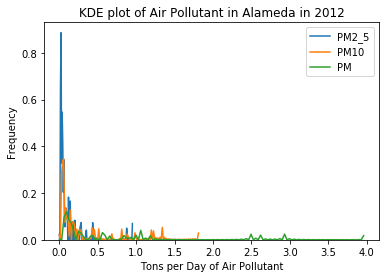

In [20]:
sns.kdeplot(alameda_emseic['PM2_5'])
sns.kdeplot(alameda_emseic['PM10'])
sns.kdeplot(alameda_emseic['PM'])

plt.xlabel('Tons per Day of Air Pollutant')
plt.ylabel('Frequency')
plt.title('KDE plot of Air Pollutant in Alameda in 2012')

#### Looking at an Alameda County Over Time from EMSEIC data

In [367]:
alameda_timescale_df = extract_all_csv('data/emseic/Alameda')
alameda_timescale_df.head()


Opening : data/emseic/Alameda/emseic_2018_1.csv
  Shape read: (2168, 19)

Opening : data/emseic/Alameda/emseic_2025_1.csv
  Shape read: (2088, 19)

Opening : data/emseic/Alameda/emseic_2001_1.csv
  Shape read: (2071, 19)

Opening : data/emseic/Alameda/emseic_2003_1.csv
  Shape read: (2146, 19)

Opening : data/emseic/Alameda/emseic_2027_1.csv
  Shape read: (2080, 19)

Opening : data/emseic/Alameda/emseic_2023_1.csv
  Shape read: (2112, 19)

Opening : data/emseic/Alameda/emseic_2007_1.csv
  Shape read: (2140, 19)

Opening : data/emseic/Alameda/emseic_2005_1.csv
  Shape read: (2162, 19)

Opening : data/emseic/Alameda/emseic_2021_1.csv
  Shape read: (2112, 19)

Opening : data/emseic/Alameda/emseic_2002_1.csv
  Shape read: (2121, 19)

Opening : data/emseic/Alameda/emseic_2026_1.csv
  Shape read: (2088, 19)

Opening : data/emseic/Alameda/emseic_2024_1.csv
  Shape read: (2104, 19)

Opening : data/emseic/Alameda/emseic_2019_1.csv
  Shape read: (2168, 19)

Opening : data/emseic/Alameda/emseic_

DATA_SOURCE  YEAR     AREA          SEASON         EMISSION_TYPE  \
0   SIP105ADJ  2018  ALAMEDA  Annual Average  Grown and Controlled   
1   SIP105ADJ  2018  ALAMEDA  Annual Average  Grown and Controlled   
2   SIP105ADJ  2018  ALAMEDA  Annual Average  Grown and Controlled   
3   SIP105ADJ  2018  ALAMEDA  Annual Average  Grown and Controlled   
4   SIP105ADJ  2018  ALAMEDA  Annual Average  Grown and Controlled   

     SRC_TYPE                 EIC             EICSUMN  \
0  STATIONARY   010-040-0110-0000  ELECTRIC UTILITIES   
1  STATIONARY   010-040-1200-0000  ELECTRIC UTILITIES   
2  STATIONARY   010-045-0110-0000  ELECTRIC UTILITIES   
3  STATIONARY   010-045-1200-0000  ELECTRIC UTILITIES   
4  STATIONARY   010-070-0240-0000  ELECTRIC UTILITIES   

                      EICSOUN                              EICMATN  \
0  I.C. RECIPROCATING ENGINES                          NATURAL GAS   
1  I.C. RECIPROCATING ENGINES  DIESEL/DISTILLATE OIL (UNSPECIFIED)   
2        I.C. TURBINE ENGINES                          NATURAL GAS   
3        I.C. TURBINE ENGINES  DIESEL/DISTILLATE OIL (UNSPECIFIED)   
4             IN-PROCESS FUEL            SOLID WASTE (UNSPECIFIED)   

                    EICSUBN     TOG     ROG     COT     NOX     SOX      PM  \
0  SUB-CATEGORY UNSPECIFIED  0.0001  0.0000  0.0000  0.0001  0.0000  0.0000   
1  SUB-CATEGORY UNSPECIFIED  0.0039  0.0033  0.0145  0.0493  0.0000  0.0028   
2  SUB-CATEGORY UNSPECIFIED  0.0006  0.0001  0.0001  0.0001  0.0000  0.0002   
3  SUB-CATEGORY UNSPECIFIED  0.0008  0.0007  0.0032  0.0350  0.0103  0.0063   
4  SUB-CATEGORY UNSPECIFIED  0.0049  0.0034  0.1207  0.0269  0.0004  0.0019   

     PM10   PM2_5  
0  0.0000  0.0000  
1  0.0027  0.0027  
2  0.0002  0.0002  
3  0.0062  0.0061  
4  0.0019  0.0018

In [369]:
cumulative_alameda_timescale = alameda_timescale_df.groupby(['AREA', 'YEAR']).agg(sum).reset_index()
cumulative_alameda_timescale.head()



AREA  YEAR         TOG         ROG         COT         NOX     SOX  \
0  ALAMEDA  2000  232.204000  104.081900  550.046100  139.461300  4.7541   
1  ALAMEDA  2001  203.103500   95.160700  501.230800  131.429400  4.9423   
2  ALAMEDA  2002  193.930642   89.998100  464.997002  124.711116  5.0190   
3  ALAMEDA  2003  197.915270   84.838270  425.529765  116.344917  4.3906   
4  ALAMEDA  2004  197.012466   80.326131  387.644382  111.499504  4.6411   

          PM       PM10      PM2_5  
0  43.158200  26.200300  11.345600  
1  39.680000  24.132400  10.406300  
2  39.088136  23.665108  10.042079  
3  34.840117  21.530919   9.693226  
4  33.559873  20.895930   9.565886

Text(0.5, 1.0, 'Alameda County TOG over time')

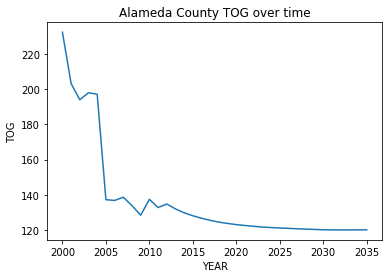

In [372]:
measurement = 'TOG'

sns.lineplot(data=cumulative_alameda_timescale, x='YEAR', y=measurement)

plt.title('Alameda County {y} over time'.format(y=measurement))

In [380]:
def standard_bulk_line_plot(_data, x, y, ylabel):
    n = len(x) ## this determines how many plots we need to make
    
    fig = plt.figure(figsize=(20, 20))
    
    rows = round(n / 2) ## this determines how many rows of 2 we will plot
    gs = fig.add_gridspec(rows, 2)
    
    switch = 0 ## flips betwen left and right plot on each row
    for i in range(n):
        c = x[i]
        r = i // 2 ## the current row of this iteration
        ax1 = fig.add_subplot(gs[r, switch])
        
        ## scatterplot
#         print(c, y)
        sns.lineplot(data=_data, x=y, y=c)
        
        ## chart design
        plt.title('{x} over {y}'.format(x=c, y=ylabel))
        
        plt.tight_layout()
        
        ## move to other plot
        if switch == 0:
            switch = 1
        else:
            switch = 0

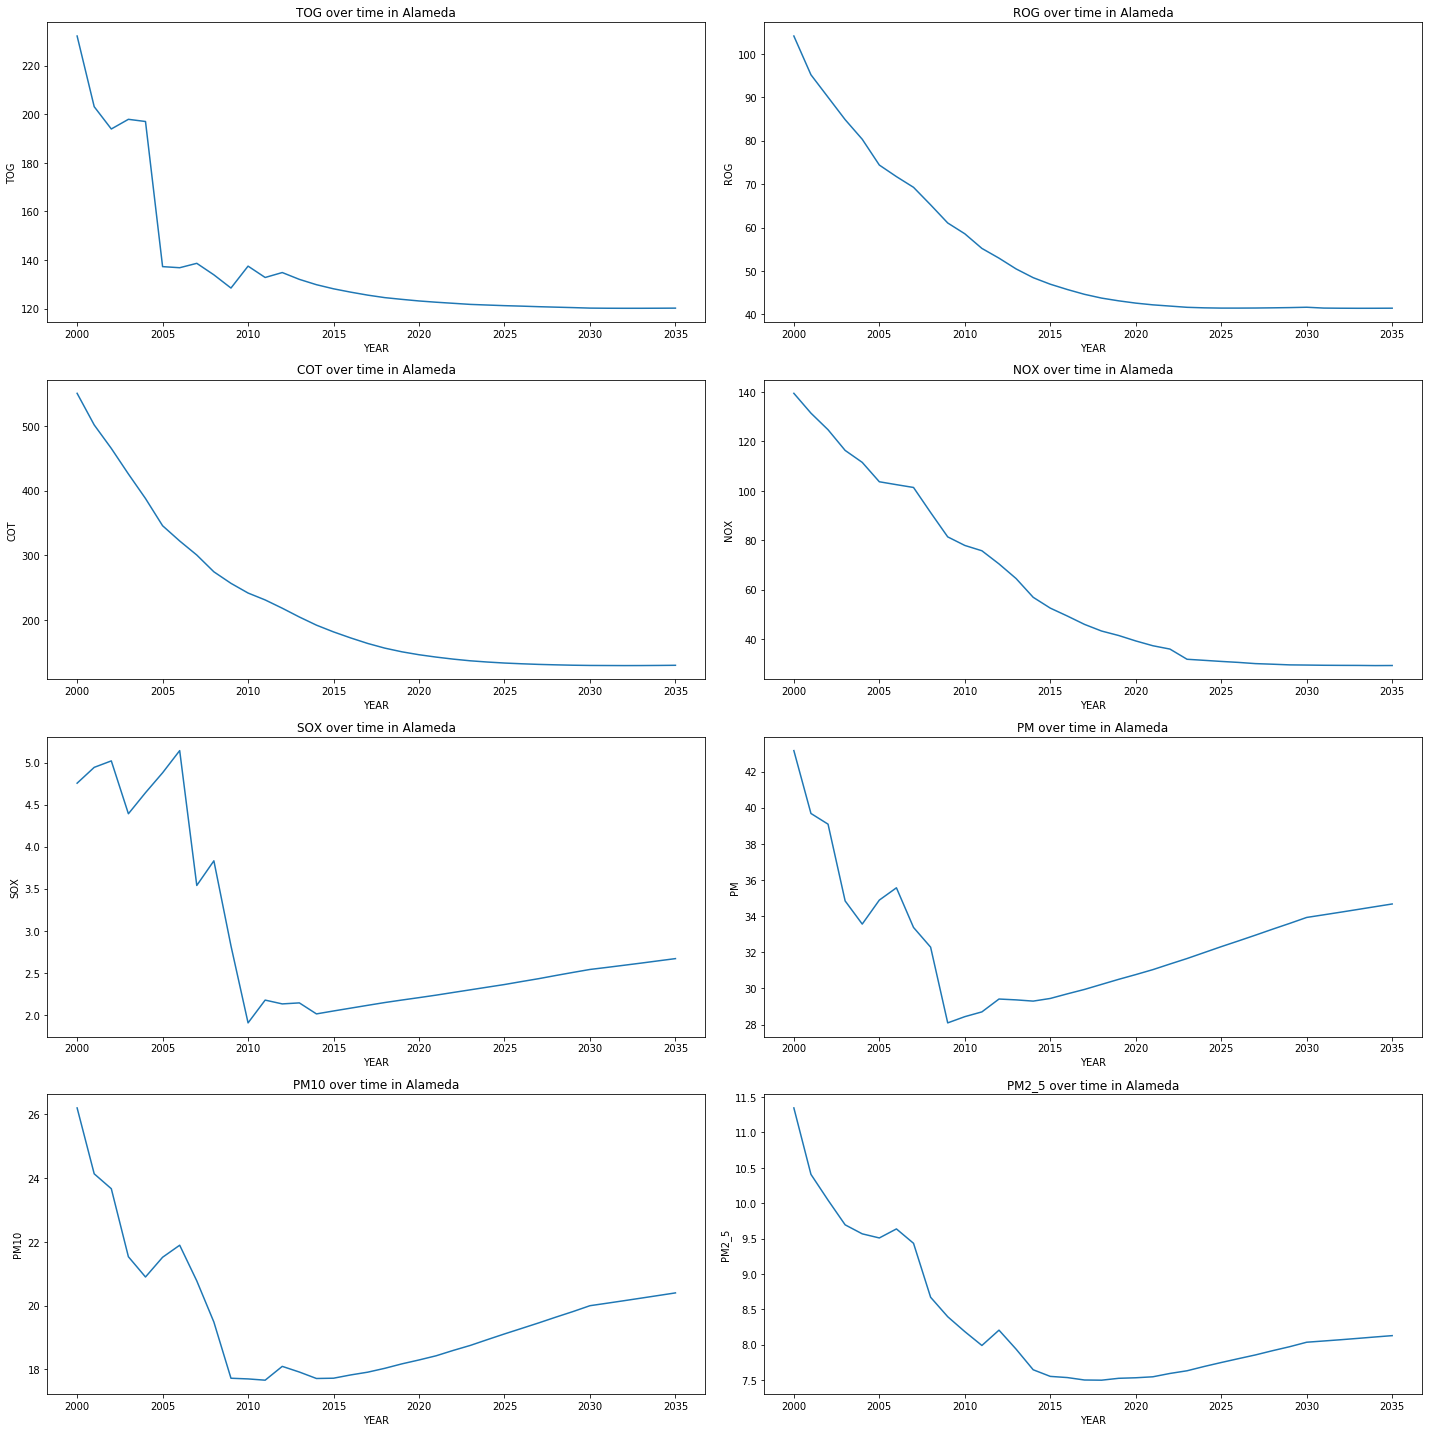

In [382]:
emseic_measurements_list = ['TOG', 'ROG', 'COT', 'NOX', 'SOX', 'PM', 'PM10', 'PM2_5']

standard_bulk_line_plot(cumulative_alameda_timescale, emseic_measurements_list, 'YEAR', 'time in Alameda')

In [9]:
all_counties_2012_df = extract_all_csv('data/emseic/2012')
cumulative_all_counties_2012_df = all_counties_2012_df.groupby(['AREA', 'YEAR']).agg(sum).reset_index()
cumulative_all_counties_2012_df.head()


Opening : data/emseic/2012/emseic_2012_26.csv
  Shape read: (1739, 19)

Opening : data/emseic/2012/emseic_2012_32.csv
  Shape read: (1801, 19)

Opening : data/emseic/2012/emseic_2012_33.csv
  Shape read: (2147, 19)

Opening : data/emseic/2012/emseic_2012_27.csv
  Shape read: (2088, 19)

Opening : data/emseic/2012/emseic_2012_19.csv
  Shape read: (2626, 19)

Opening : data/emseic/2012/emseic_2012_31.csv
  Shape read: (1891, 19)

Opening : data/emseic/2012/emseic_2012_25.csv
  Shape read: (1710, 19)

Opening : data/emseic/2012/emseic_2012_9.csv
  Shape read: (1810, 19)

Opening : data/emseic/2012/emseic_2012_8.csv
  Shape read: (1885, 19)

Opening : data/emseic/2012/emseic_2012_24.csv
  Shape read: (1923, 19)

Opening : data/emseic/2012/emseic_2012_30.csv
  Shape read: (2284, 19)

Opening : data/emseic/2012/emseic_2012_18.csv
  Shape read: (1770, 19)

Opening : data/emseic/2012/emseic_2012_34.csv
  Shape read: (2133, 19)

Opening : data/emseic/2012/emseic_2012_20.csv
  Shape read: (1995

AREA  YEAR         TOG        ROG         COT        NOX     SOX  \
0    ALAMEDA  2012  134.840060  52.964215  218.327664  70.393760  2.1303   
1     ALPINE  2012    0.651000   0.451800    1.675300   0.386966  0.0033   
2     AMADOR  2012   10.252184   5.091711   19.055692   4.357744  0.1249   
3      BUTTE  2012   23.291007  14.396062   69.518978  18.730721  0.2657   
4  CALAVERAS  2012   11.288079   5.075024   21.024100   2.769050  0.0387   

          PM       PM10     PM2_5  
0  29.412402  18.091634  8.204909  
1   2.161600   1.265200  0.153800  
2   8.725638   5.396293  2.941648  
3  31.816585  17.991954  5.661389  
4   5.729100   3.691200  1.326400

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

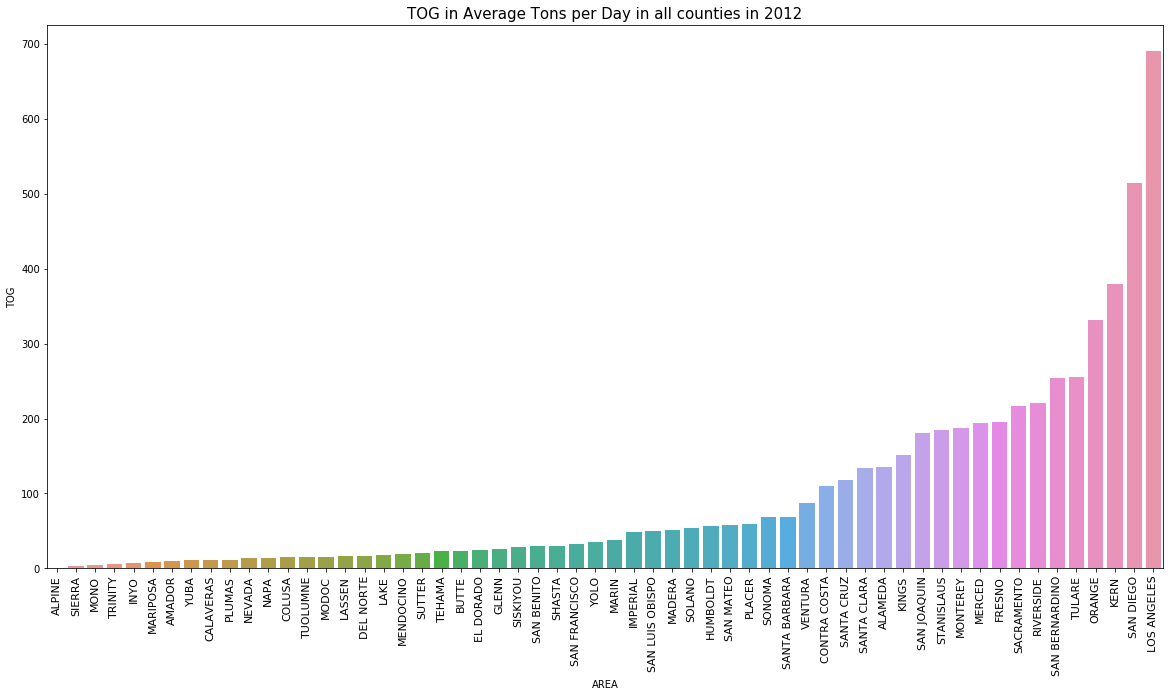

In [405]:
plt.figure(figsize=(20, 10))

sns.barplot(x="AREA", 
            y=measurement, 
            data=cumulative_all_counties_2012_df, 
            order=cumulative_all_counties_2012_df.sort_values(measurement).AREA)

plt.title('{y} in Average Tons per Day in all counties in 2012'.format(y=measurement), size=15)
plt.xticks(rotation=90, size=11)


In [8]:
def extract_emseic_by_county(c_num):
    combined = pd.DataFrame()
    
    for y in range(2000, 2036):
        fdir = 'data/emseic/{y}'.format(y=y)
        fn = 'emseic_{y}_{c}.csv'.format(y=y, c=c_num)
        extracted = extract_csv(fdir, fn)

        combined = pd.concat([combined, extracted])
    return combined

In [12]:
first_five = pd.DataFrame()
for i in range(1, 36):
    all_years_i_county_df = extract_emseic_by_county(i)
    cumulative_all_years = all_years_i_county_df.groupby(['AREA', 'YEAR']).agg(sum).reset_index()
    
    first_five = pd.concat([first_five, cumulative_all_years])

    


Opening : data/emseic/2000/emseic_2000_1.csv
  Shape read: (2064, 19)

Opening : data/emseic/2001/emseic_2001_1.csv
  Shape read: (2071, 19)

Opening : data/emseic/2002/emseic_2002_1.csv
  Shape read: (2121, 19)

Opening : data/emseic/2003/emseic_2003_1.csv
  Shape read: (2146, 19)

Opening : data/emseic/2004/emseic_2004_1.csv
  Shape read: (2151, 19)

Opening : data/emseic/2005/emseic_2005_1.csv
  Shape read: (2162, 19)

Opening : data/emseic/2006/emseic_2006_1.csv
  Shape read: (2157, 19)

Opening : data/emseic/2007/emseic_2007_1.csv
  Shape read: (2140, 19)

Opening : data/emseic/2008/emseic_2008_1.csv
  Shape read: (2141, 19)

Opening : data/emseic/2009/emseic_2009_1.csv
  Shape read: (2166, 19)

Opening : data/emseic/2010/emseic_2010_1.csv
  Shape read: (2181, 19)

Opening : data/emseic/2011/emseic_2011_1.csv
  Shape read: (2187, 19)

Opening : data/emseic/2012/emseic_2012_1.csv
  Shape read: (2182, 19)

Opening : data/emseic/2013/emseic_2013_1.csv
  Shape read: (2173, 19)

Openi


Opening : data/emseic/2012/emseic_2012_4.csv
  Shape read: (2088, 19)

Opening : data/emseic/2013/emseic_2013_4.csv
  Shape read: (2079, 19)

Opening : data/emseic/2014/emseic_2014_4.csv
  Shape read: (2079, 19)

Opening : data/emseic/2015/emseic_2015_4.csv
  Shape read: (2079, 19)

Opening : data/emseic/2016/emseic_2016_4.csv
  Shape read: (2079, 19)

Opening : data/emseic/2017/emseic_2017_4.csv
  Shape read: (2079, 19)

Opening : data/emseic/2018/emseic_2018_4.csv
  Shape read: (2079, 19)

Opening : data/emseic/2019/emseic_2019_4.csv
  Shape read: (2079, 19)

Opening : data/emseic/2020/emseic_2020_4.csv
  Shape read: (2070, 19)

Opening : data/emseic/2021/emseic_2021_4.csv
  Shape read: (2023, 19)

Opening : data/emseic/2022/emseic_2022_4.csv
  Shape read: (2023, 19)

Opening : data/emseic/2023/emseic_2023_4.csv
  Shape read: (2023, 19)

Opening : data/emseic/2024/emseic_2024_4.csv
  Shape read: (2015, 19)

Opening : data/emseic/2025/emseic_2025_4.csv
  Shape read: (1999, 19)

Openi


Opening : data/emseic/2022/emseic_2022_7.csv
  Shape read: (2022, 19)

Opening : data/emseic/2023/emseic_2023_7.csv
  Shape read: (2022, 19)

Opening : data/emseic/2024/emseic_2024_7.csv
  Shape read: (2014, 19)

Opening : data/emseic/2025/emseic_2025_7.csv
  Shape read: (1998, 19)

Opening : data/emseic/2026/emseic_2026_7.csv
  Shape read: (1998, 19)

Opening : data/emseic/2027/emseic_2027_7.csv
  Shape read: (1990, 19)

Opening : data/emseic/2028/emseic_2028_7.csv
  Shape read: (1990, 19)

Opening : data/emseic/2029/emseic_2029_7.csv
  Shape read: (1990, 19)

Opening : data/emseic/2030/emseic_2030_7.csv
  Shape read: (1990, 19)

Opening : data/emseic/2031/emseic_2031_7.csv
  Shape read: (1990, 19)

Opening : data/emseic/2032/emseic_2032_7.csv
  Shape read: (1984, 19)

Opening : data/emseic/2033/emseic_2033_7.csv
  Shape read: (1984, 19)

Opening : data/emseic/2034/emseic_2034_7.csv
  Shape read: (1984, 19)

Opening : data/emseic/2035/emseic_2035_7.csv
  Shape read: (1982, 19)

Openi


Opening : data/emseic/2029/emseic_2029_10.csv
  Shape read: (2220, 19)

Opening : data/emseic/2030/emseic_2030_10.csv
  Shape read: (2220, 19)

Opening : data/emseic/2031/emseic_2031_10.csv
  Shape read: (2220, 19)

Opening : data/emseic/2032/emseic_2032_10.csv
  Shape read: (2214, 19)

Opening : data/emseic/2033/emseic_2033_10.csv
  Shape read: (2214, 19)

Opening : data/emseic/2034/emseic_2034_10.csv
  Shape read: (2214, 19)

Opening : data/emseic/2035/emseic_2035_10.csv
  Shape read: (2212, 19)

Opening : data/emseic/2000/emseic_2000_11.csv
  Shape read: (1788, 19)

Opening : data/emseic/2001/emseic_2001_11.csv
  Shape read: (1800, 19)

Opening : data/emseic/2002/emseic_2002_11.csv
  Shape read: (1807, 19)

Opening : data/emseic/2003/emseic_2003_11.csv
  Shape read: (1827, 19)

Opening : data/emseic/2004/emseic_2004_11.csv
  Shape read: (1847, 19)

Opening : data/emseic/2005/emseic_2005_11.csv
  Shape read: (1855, 19)

Opening : data/emseic/2006/emseic_2006_11.csv
  Shape read: (18


Opening : data/emseic/2000/emseic_2000_14.csv
  Shape read: (1783, 19)

Opening : data/emseic/2001/emseic_2001_14.csv
  Shape read: (1792, 19)

Opening : data/emseic/2002/emseic_2002_14.csv
  Shape read: (1802, 19)

Opening : data/emseic/2003/emseic_2003_14.csv
  Shape read: (1822, 19)

Opening : data/emseic/2004/emseic_2004_14.csv
  Shape read: (1828, 19)

Opening : data/emseic/2005/emseic_2005_14.csv
  Shape read: (1716, 19)

Opening : data/emseic/2006/emseic_2006_14.csv
  Shape read: (1723, 19)

Opening : data/emseic/2007/emseic_2007_14.csv
  Shape read: (1725, 19)

Opening : data/emseic/2008/emseic_2008_14.csv
  Shape read: (1733, 19)

Opening : data/emseic/2009/emseic_2009_14.csv
  Shape read: (1876, 19)

Opening : data/emseic/2010/emseic_2010_14.csv
  Shape read: (1889, 19)

Opening : data/emseic/2011/emseic_2011_14.csv
  Shape read: (1888, 19)

Opening : data/emseic/2012/emseic_2012_14.csv
  Shape read: (1889, 19)

Opening : data/emseic/2013/emseic_2013_14.csv
  Shape read: (18

  Shape read: (1754, 19)

Opening : data/emseic/2013/emseic_2013_17.csv
  Shape read: (1745, 19)

Opening : data/emseic/2014/emseic_2014_17.csv
  Shape read: (1745, 19)

Opening : data/emseic/2015/emseic_2015_17.csv
  Shape read: (1746, 19)

Opening : data/emseic/2016/emseic_2016_17.csv
  Shape read: (1746, 19)

Opening : data/emseic/2017/emseic_2017_17.csv
  Shape read: (1746, 19)

Opening : data/emseic/2018/emseic_2018_17.csv
  Shape read: (1746, 19)

Opening : data/emseic/2019/emseic_2019_17.csv
  Shape read: (1746, 19)

Opening : data/emseic/2020/emseic_2020_17.csv
  Shape read: (1729, 19)

Opening : data/emseic/2021/emseic_2021_17.csv
  Shape read: (1690, 19)

Opening : data/emseic/2022/emseic_2022_17.csv
  Shape read: (1690, 19)

Opening : data/emseic/2023/emseic_2023_17.csv
  Shape read: (1690, 19)

Opening : data/emseic/2024/emseic_2024_17.csv
  Shape read: (1682, 19)

Opening : data/emseic/2025/emseic_2025_17.csv
  Shape read: (1666, 19)

Opening : data/emseic/2026/emseic_2026


Opening : data/emseic/2023/emseic_2023_20.csv
  Shape read: (1930, 19)

Opening : data/emseic/2024/emseic_2024_20.csv
  Shape read: (1922, 19)

Opening : data/emseic/2025/emseic_2025_20.csv
  Shape read: (1906, 19)

Opening : data/emseic/2026/emseic_2026_20.csv
  Shape read: (1906, 19)

Opening : data/emseic/2027/emseic_2027_20.csv
  Shape read: (1898, 19)

Opening : data/emseic/2028/emseic_2028_20.csv
  Shape read: (1898, 19)

Opening : data/emseic/2029/emseic_2029_20.csv
  Shape read: (1898, 19)

Opening : data/emseic/2030/emseic_2030_20.csv
  Shape read: (1898, 19)

Opening : data/emseic/2031/emseic_2031_20.csv
  Shape read: (1898, 19)

Opening : data/emseic/2032/emseic_2032_20.csv
  Shape read: (1892, 19)

Opening : data/emseic/2033/emseic_2033_20.csv
  Shape read: (1892, 19)

Opening : data/emseic/2034/emseic_2034_20.csv
  Shape read: (1891, 19)

Opening : data/emseic/2035/emseic_2035_20.csv
  Shape read: (1890, 19)

Opening : data/emseic/2000/emseic_2000_21.csv
  Shape read: (17


Opening : data/emseic/2031/emseic_2031_23.csv
  Shape read: (1807, 19)

Opening : data/emseic/2032/emseic_2032_23.csv
  Shape read: (1801, 19)

Opening : data/emseic/2033/emseic_2033_23.csv
  Shape read: (1801, 19)

Opening : data/emseic/2034/emseic_2034_23.csv
  Shape read: (1800, 19)

Opening : data/emseic/2035/emseic_2035_23.csv
  Shape read: (1799, 19)

Opening : data/emseic/2000/emseic_2000_24.csv
  Shape read: (1771, 19)

Opening : data/emseic/2001/emseic_2001_24.csv
  Shape read: (1769, 19)

Opening : data/emseic/2002/emseic_2002_24.csv
  Shape read: (1785, 19)

Opening : data/emseic/2003/emseic_2003_24.csv
  Shape read: (1812, 19)

Opening : data/emseic/2004/emseic_2004_24.csv
  Shape read: (1826, 19)

Opening : data/emseic/2005/emseic_2005_24.csv
  Shape read: (1857, 19)

Opening : data/emseic/2006/emseic_2006_24.csv
  Shape read: (1861, 19)

Opening : data/emseic/2007/emseic_2007_24.csv
  Shape read: (1861, 19)

Opening : data/emseic/2008/emseic_2008_24.csv
  Shape read: (18


Opening : data/emseic/2010/emseic_2010_27.csv
  Shape read: (2091, 19)

Opening : data/emseic/2011/emseic_2011_27.csv
  Shape read: (2102, 19)

Opening : data/emseic/2012/emseic_2012_27.csv
  Shape read: (2088, 19)

Opening : data/emseic/2013/emseic_2013_27.csv
  Shape read: (2079, 19)

Opening : data/emseic/2014/emseic_2014_27.csv
  Shape read: (2072, 19)

Opening : data/emseic/2015/emseic_2015_27.csv
  Shape read: (2072, 19)

Opening : data/emseic/2016/emseic_2016_27.csv
  Shape read: (2072, 19)

Opening : data/emseic/2017/emseic_2017_27.csv
  Shape read: (2072, 19)

Opening : data/emseic/2018/emseic_2018_27.csv
  Shape read: (2072, 19)

Opening : data/emseic/2019/emseic_2019_27.csv
  Shape read: (2072, 19)

Opening : data/emseic/2020/emseic_2020_27.csv
  Shape read: (2063, 19)

Opening : data/emseic/2021/emseic_2021_27.csv
  Shape read: (2016, 19)

Opening : data/emseic/2022/emseic_2022_27.csv
  Shape read: (2016, 19)

Opening : data/emseic/2023/emseic_2023_27.csv
  Shape read: (20


Opening : data/emseic/2016/emseic_2016_30.csv
  Shape read: (2278, 19)

Opening : data/emseic/2017/emseic_2017_30.csv
  Shape read: (2278, 19)

Opening : data/emseic/2018/emseic_2018_30.csv
  Shape read: (2278, 19)

Opening : data/emseic/2019/emseic_2019_30.csv
  Shape read: (2278, 19)

Opening : data/emseic/2020/emseic_2020_30.csv
  Shape read: (2269, 19)

Opening : data/emseic/2021/emseic_2021_30.csv
  Shape read: (2222, 19)

Opening : data/emseic/2022/emseic_2022_30.csv
  Shape read: (2222, 19)

Opening : data/emseic/2023/emseic_2023_30.csv
  Shape read: (2222, 19)

Opening : data/emseic/2024/emseic_2024_30.csv
  Shape read: (2214, 19)

Opening : data/emseic/2025/emseic_2025_30.csv
  Shape read: (2198, 19)

Opening : data/emseic/2026/emseic_2026_30.csv
  Shape read: (2198, 19)

Opening : data/emseic/2027/emseic_2027_30.csv
  Shape read: (2190, 19)

Opening : data/emseic/2028/emseic_2028_30.csv
  Shape read: (2190, 19)

Opening : data/emseic/2029/emseic_2029_30.csv
  Shape read: (21


Opening : data/emseic/2023/emseic_2023_33.csv
  Shape read: (2083, 19)

Opening : data/emseic/2024/emseic_2024_33.csv
  Shape read: (2075, 19)

Opening : data/emseic/2025/emseic_2025_33.csv
  Shape read: (2059, 19)

Opening : data/emseic/2026/emseic_2026_33.csv
  Shape read: (2059, 19)

Opening : data/emseic/2027/emseic_2027_33.csv
  Shape read: (2051, 19)

Opening : data/emseic/2028/emseic_2028_33.csv
  Shape read: (2051, 19)

Opening : data/emseic/2029/emseic_2029_33.csv
  Shape read: (2051, 19)

Opening : data/emseic/2030/emseic_2030_33.csv
  Shape read: (2051, 19)

Opening : data/emseic/2031/emseic_2031_33.csv
  Shape read: (2051, 19)

Opening : data/emseic/2032/emseic_2032_33.csv
  Shape read: (2045, 19)

Opening : data/emseic/2033/emseic_2033_33.csv
  Shape read: (2045, 19)

Opening : data/emseic/2034/emseic_2034_33.csv
  Shape read: (2045, 19)

Opening : data/emseic/2035/emseic_2035_33.csv
  Shape read: (2043, 19)

Opening : data/emseic/2000/emseic_2000_34.csv
  Shape read: (20

In [13]:
first_five.head()

AREA  YEAR         TOG         ROG         COT         NOX     SOX  \
0  ALAMEDA  2000  232.204000  104.081900  550.046100  139.461300  4.7541   
1  ALAMEDA  2001  203.103500   95.160700  501.230800  131.429400  4.9423   
2  ALAMEDA  2002  193.930642   89.998100  464.997002  124.711116  5.0190   
3  ALAMEDA  2003  197.915270   84.838270  425.529765  116.344917  4.3906   
4  ALAMEDA  2004  197.012466   80.326131  387.644382  111.499504  4.6411   

          PM       PM10      PM2_5  
0  43.158200  26.200300  11.345600  
1  39.680000  24.132400  10.406300  
2  39.088136  23.665108  10.042079  
3  34.840117  21.530919   9.693226  
4  33.559873  20.895930   9.565886

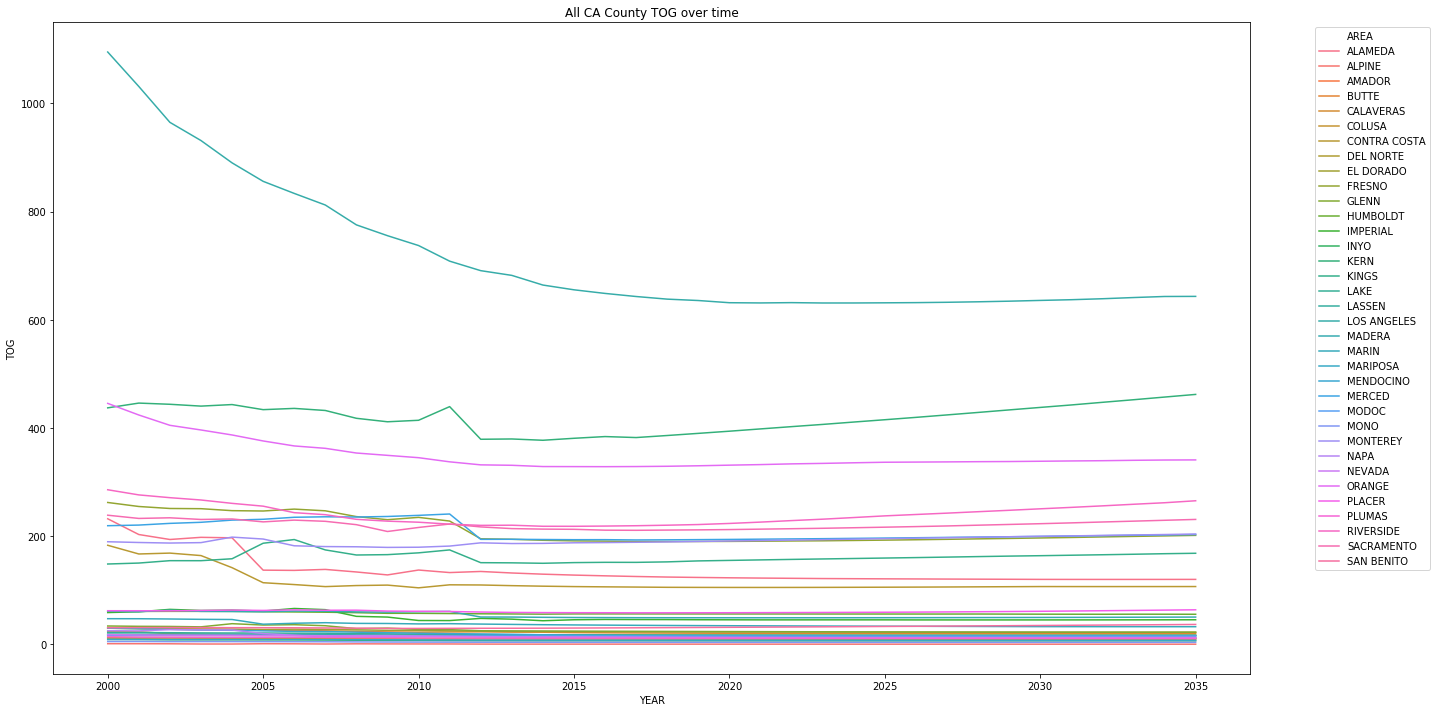

In [15]:
tog = 'TOG'
fig = plt.figure(figsize=(20, 10))

sns.lineplot(data=first_five, x='YEAR', y=tog, hue='AREA')


plt.title('All CA County {y} over time'.format(y=tog))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()



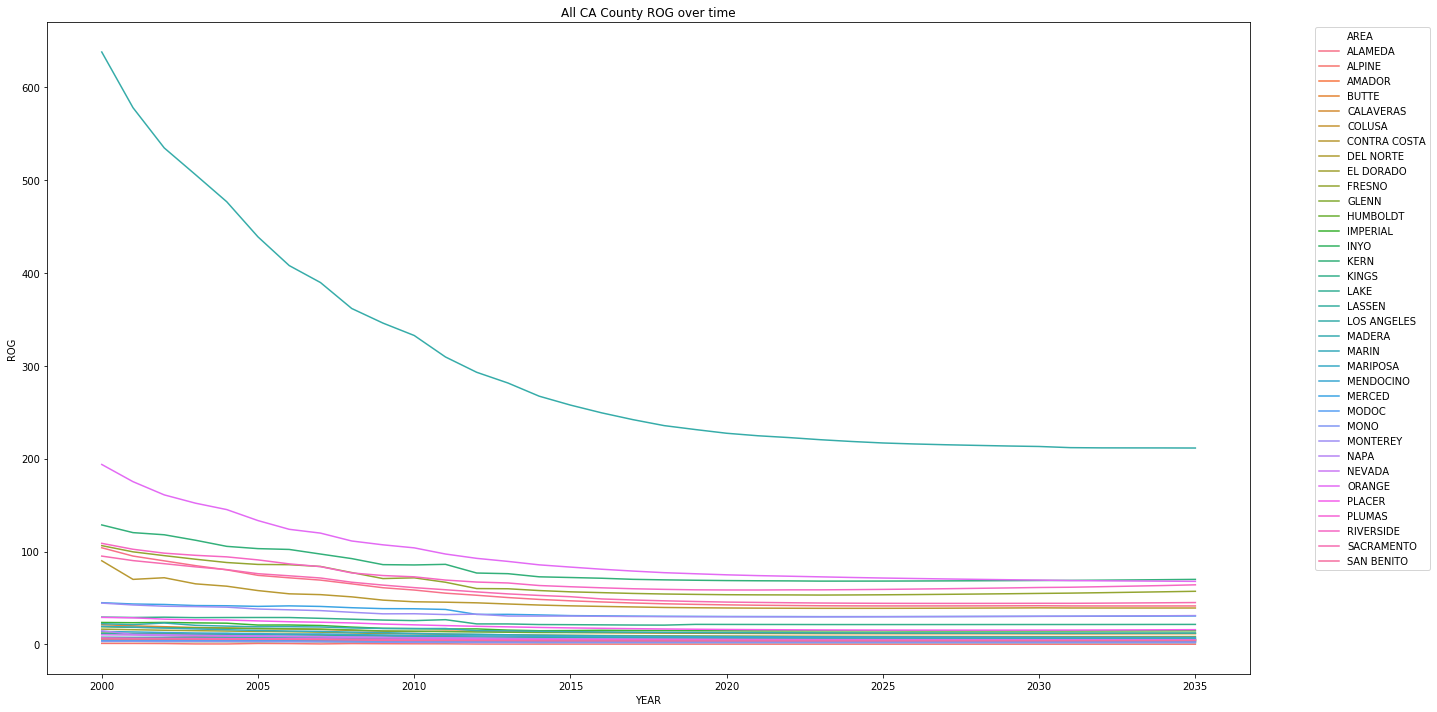

In [89]:
fig = plt.figure(figsize=(20, 10))
rog =  'ROG'
sns.lineplot(data=first_five, x='YEAR', y=rog, hue='AREA')


plt.title('All CA County {y} over time'.format(y=rog))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()



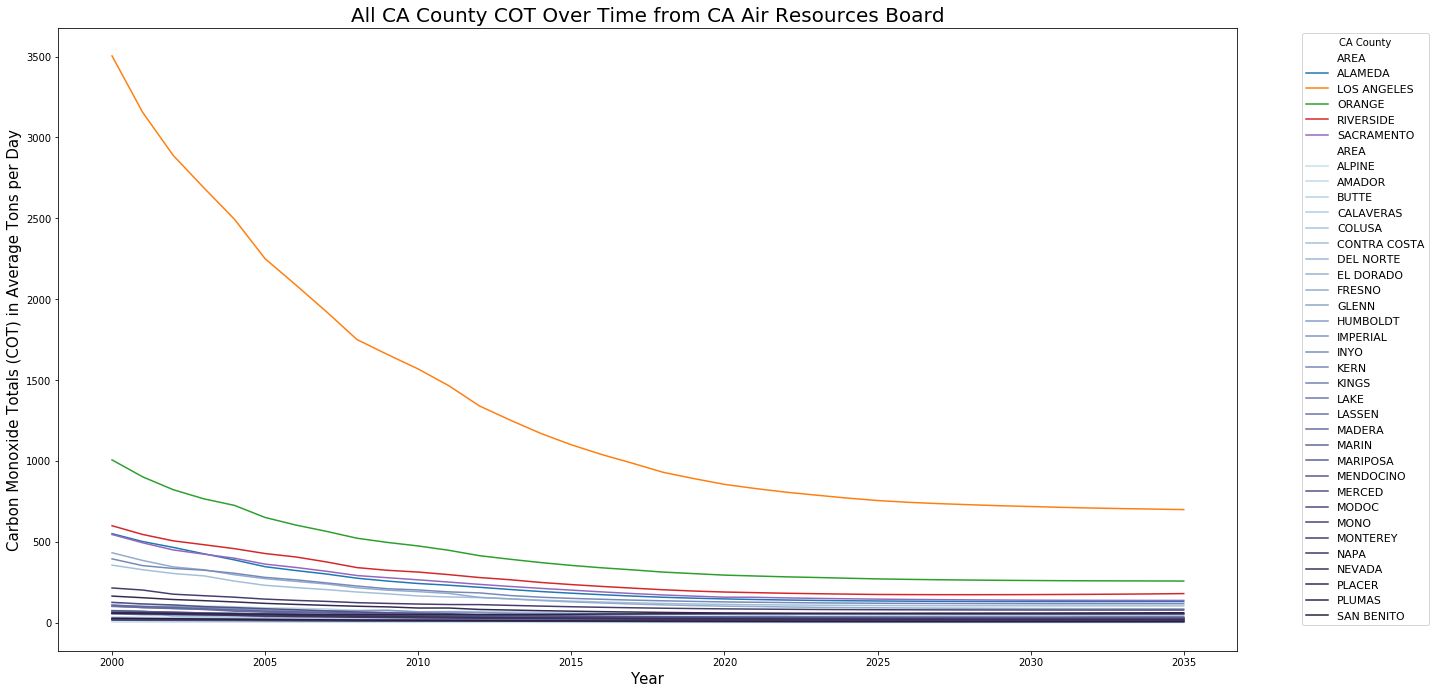

In [82]:
fig = plt.figure(figsize=(20, 10))
co =  'COT'

# for y in range(2000, 2036):
#     annual = first_five[first_five['YEAR']==y].sort_values('COT', ascending=False)
#     annual_top_five = annual[:5]
#     annual_else = annual[5:]
    
#     sns.lineplot(data=annual_top_five, x='YEAR', y=co, hue='AREA')
    
#     remaining = len(first_five[first_five['YEAR']==y]['AREA'].unique()) - 5
#     palette = sns.color_palette("mako_r", remaining)
#     sns.lineplot(data=annual_else, x='YEAR', y=co, hue='AREA', palette=palette)
    
    
top_five = ['LOS ANGELES', 'ORANGE', 'RIVERSIDE', 'ALAMEDA', 'SACRAMENTO']

# top_five_cot = first_five[first_five['YEAR']==2000].sort_values('COT', ascending=False)[:5]
# all_else_cot = first_five[first_five['YEAR']==2000].sort_values('COT', ascending=False)[5:]
top_five_counties = first_five[(first_five['AREA'] == 'LOS ANGELES')|
                   (first_five['AREA'] == 'ORANGE') | 
                   (first_five['AREA'] == 'RIVERSIDE') |
                   (first_five['AREA'] == 'ALAMEDA') | 
                   (first_five['AREA'] == 'SACRAMENTO')
                  ]

rest_counties = first_five[(first_five['AREA'] != 'LOS ANGELES') &
                   (first_five['AREA'] != 'ORANGE') & 
                   (first_five['AREA'] != 'RIVERSIDE') &
                   (first_five['AREA'] != 'ALAMEDA') & 
                   (first_five['AREA'] != 'SACRAMENTO')
                  ]

remaining = len(rest_counties['AREA'].unique())
palette = sns.color_palette("ch:s=.25,rot=-.25", n_colors=remaining)

sns.lineplot(data=top_five_counties, x='YEAR', y=co, hue='AREA')
sns.lineplot(data=rest_counties, x='YEAR', y=co, hue='AREA', palette=palette)

# sns.lineplot(data=top_five_cot, x='YEAR', y=co, hue='AREA')


plt.ylabel('Carbon Monoxide Totals (COT) in Average Tons of CO per Day', size=15)
plt.xlabel('Year', size=15)
plt.title('All CA Counties {y} Over Time from CA Air Resources Board'.format(y=co), size=20)
plt.legend(title='CA County', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()


35


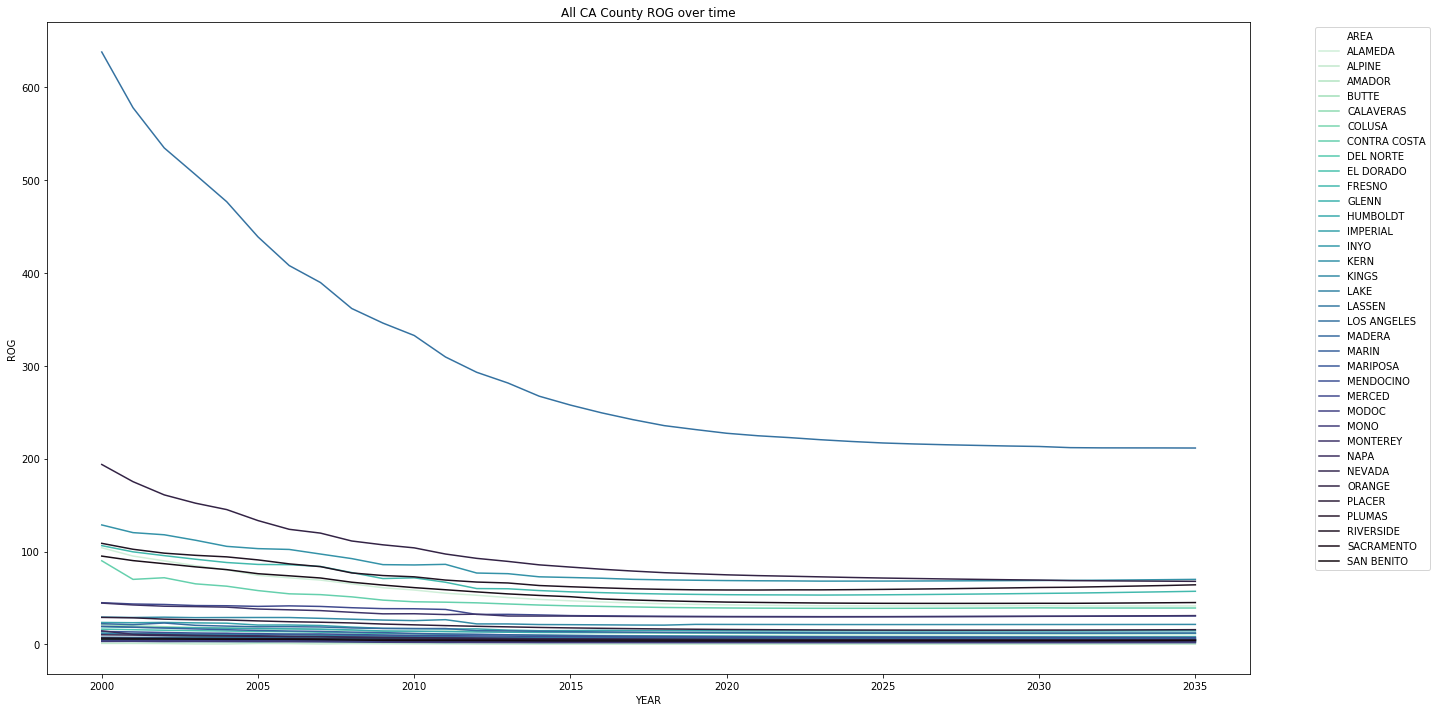

In [54]:
fig = plt.figure(figsize=(20, 10))
rog =  'ROG'


sns.lineplot(data=first_five, x='YEAR', y=rog, hue='AREA', palette=palette)


plt.title('All CA County {y} over time'.format(y=rog))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()



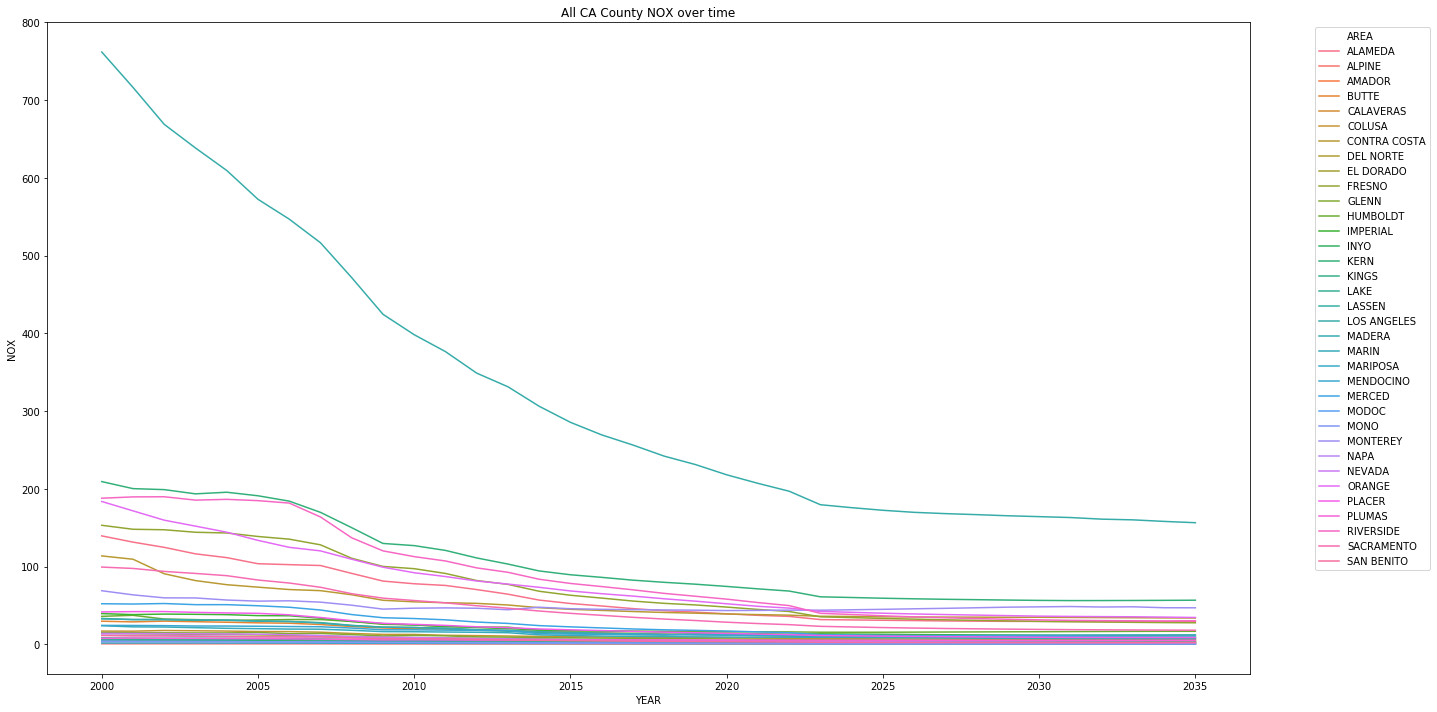

In [83]:
fig = plt.figure(figsize=(20, 10))
nox =  'NOX'
sns.lineplot(data=first_five, x='YEAR', y=nox, hue='AREA')


plt.title('All CA County {y} over time'.format(y=nox))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()



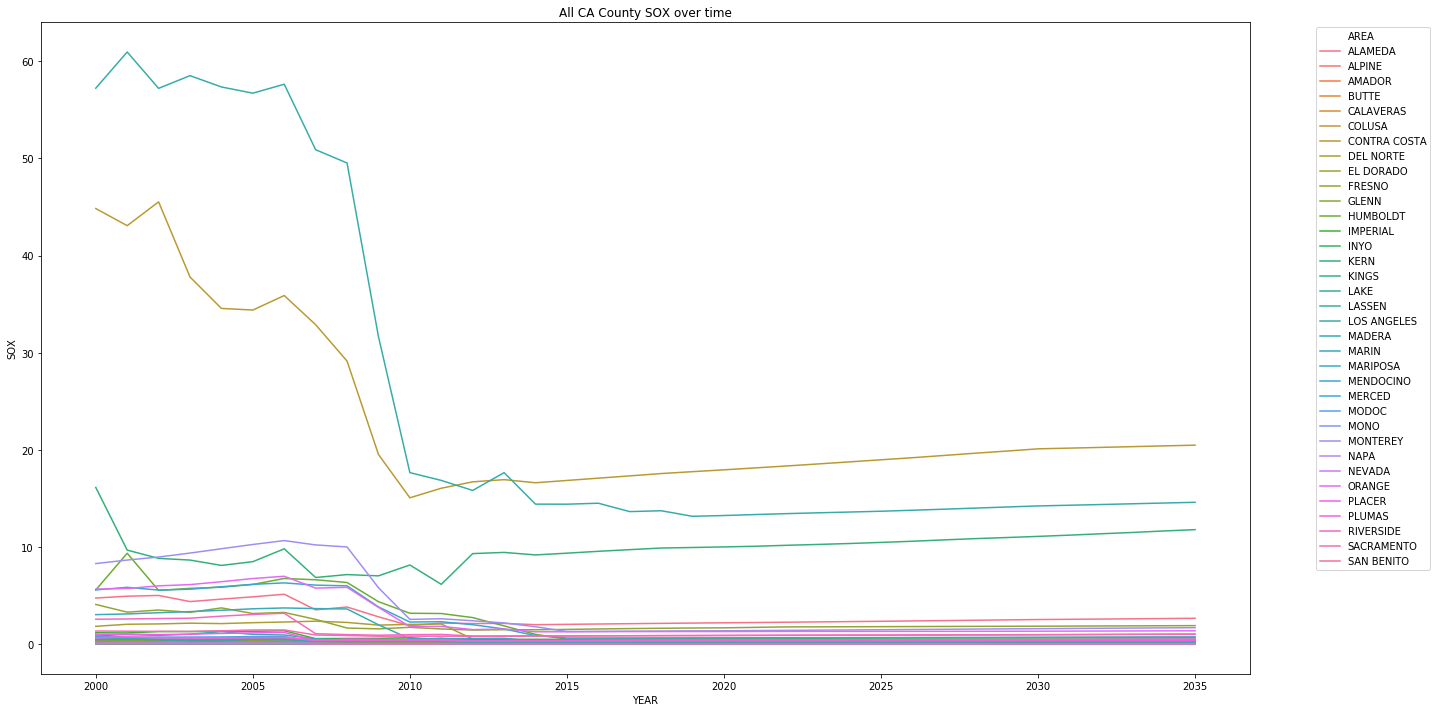

In [85]:
fig = plt.figure(figsize=(20, 10))
sox =  'SOX'
sns.lineplot(data=first_five, x='YEAR', y=sox, hue='AREA')


plt.title('All CA County {y} over time'.format(y=sox))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()



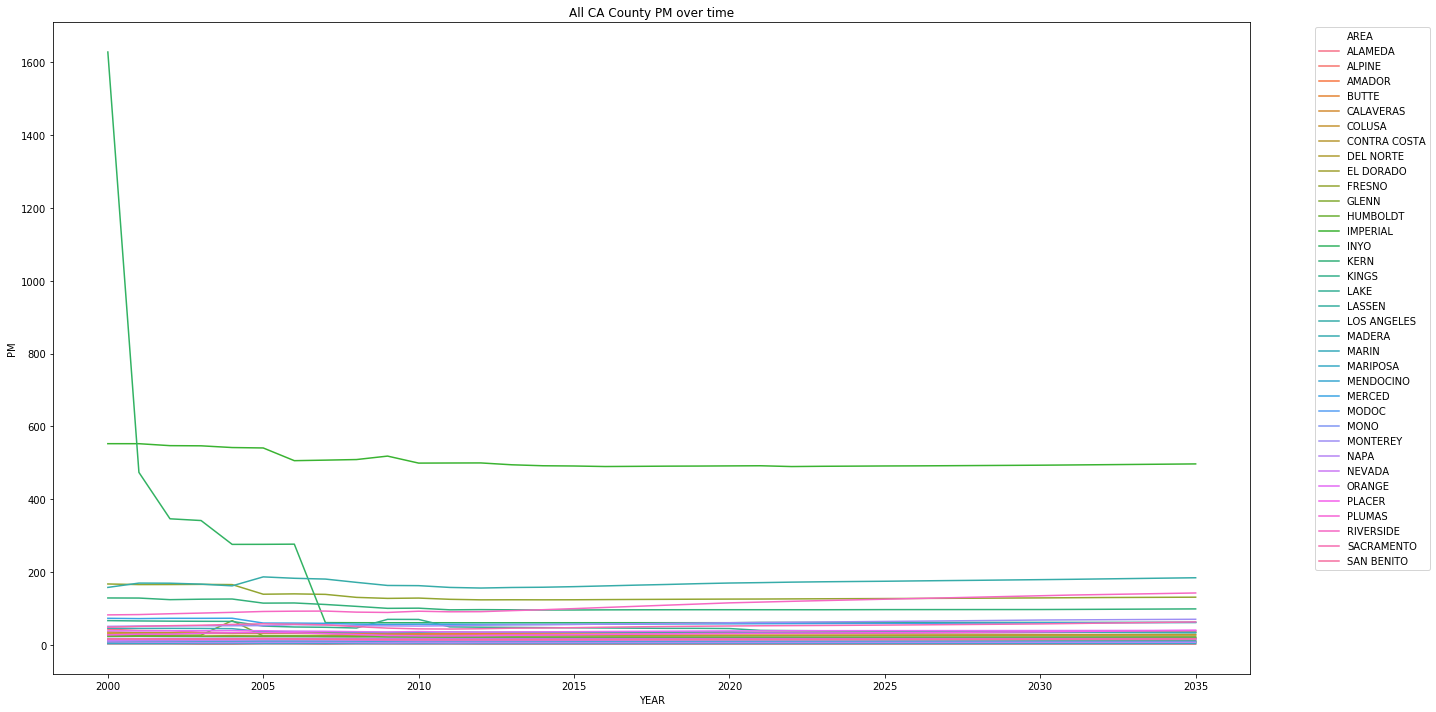

In [86]:
fig = plt.figure(figsize=(20, 10))
pm =  'PM'
sns.lineplot(data=first_five, x='YEAR', y=pm, hue='AREA')


plt.title('All CA County {y} over time'.format(y=pm))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()



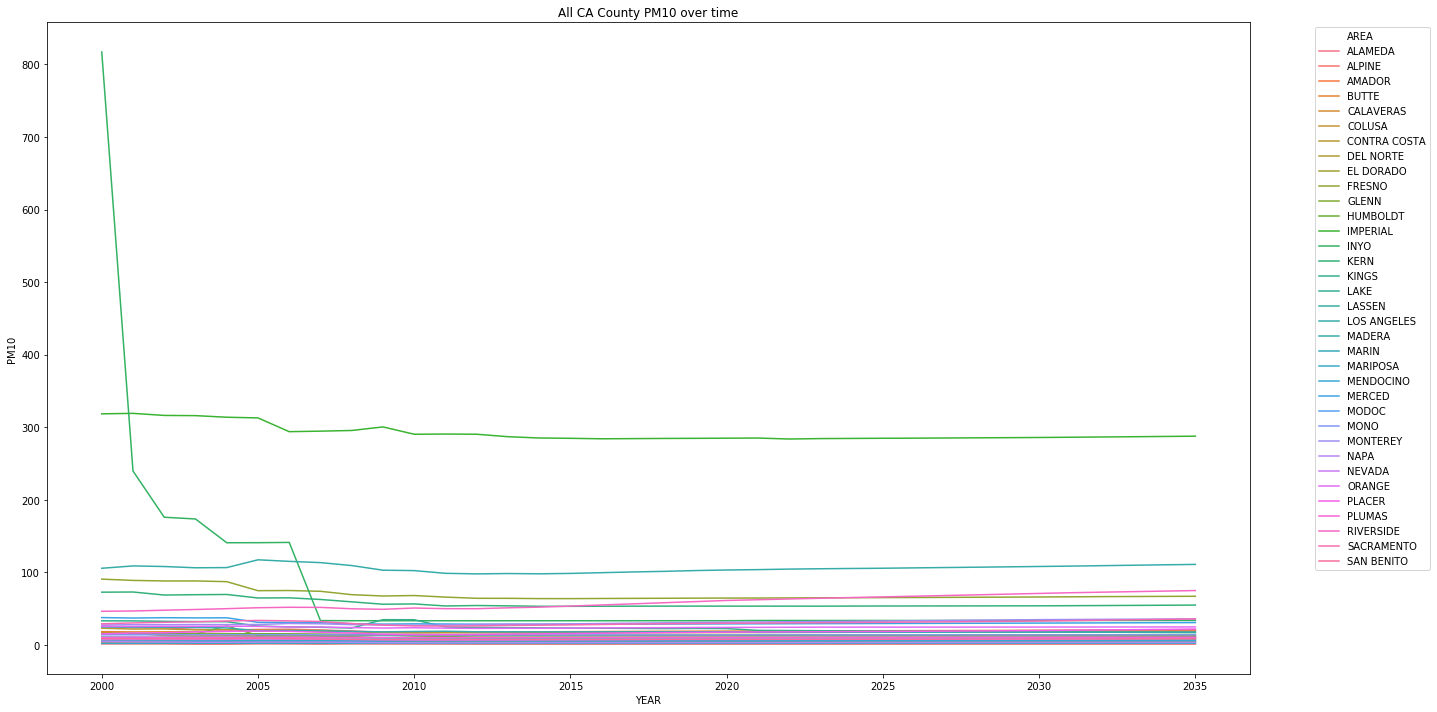

In [87]:
fig = plt.figure(figsize=(20, 10))
pm =  'PM10'
sns.lineplot(data=first_five, x='YEAR', y=pm, hue='AREA')


plt.title('All CA County {y} over time'.format(y=pm))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()



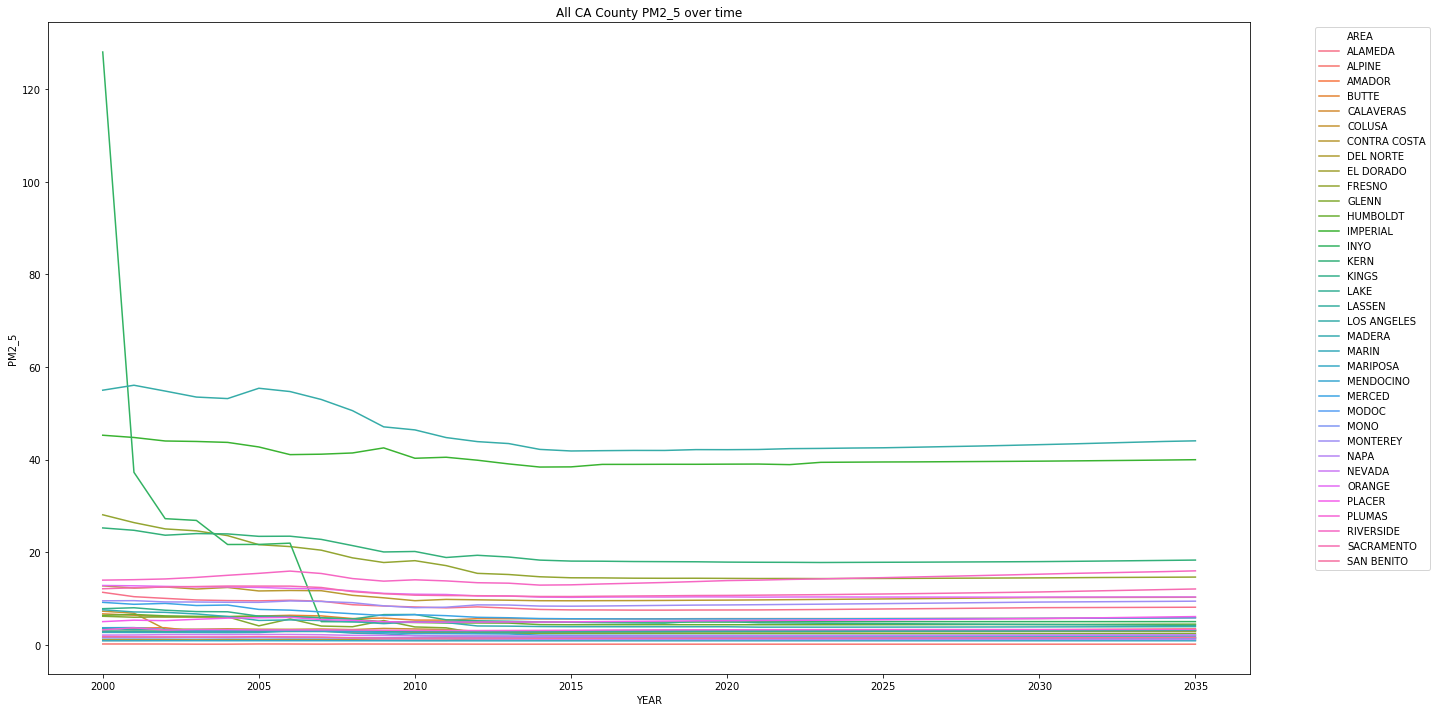

In [88]:
fig = plt.figure(figsize=(20, 10))
pm =  'PM2_5'
sns.lineplot(data=first_five, x='YEAR', y=pm, hue='AREA')


plt.title('All CA County {y} over time'.format(y=pm))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()



In [84]:
first_five.head()

AREA  YEAR         TOG         ROG         COT         NOX     SOX  \
0  ALAMEDA  2000  232.204000  104.081900  550.046100  139.461300  4.7541   
1  ALAMEDA  2001  203.103500   95.160700  501.230800  131.429400  4.9423   
2  ALAMEDA  2002  193.930642   89.998100  464.997002  124.711116  5.0190   
3  ALAMEDA  2003  197.915270   84.838270  425.529765  116.344917  4.3906   
4  ALAMEDA  2004  197.012466   80.326131  387.644382  111.499504  4.6411   

          PM       PM10      PM2_5  
0  43.158200  26.200300  11.345600  
1  39.680000  24.132400  10.406300  
2  39.088136  23.665108  10.042079  
3  34.840117  21.530919   9.693226  
4  33.559873  20.895930   9.565886

In [421]:
first_five.to_csv('processed_data/all_counties_historical_ARB_aggregated_emseic.csv')

## Data Extraction, Cleaning, and Preparation

The following section will comine our data sources together to create a uniqfied dataframe so that the prediction problem can be tackled. The data sources are in the references at bottom of the notebook.


The Vista CA indicates the locations of different emissions source stations in California. The California counties contains the locations of counties in California. 

### Extracting All Vista CA dataframe

Since there are many shape files for the  different Vista CA emissions sources, we want to extract all these individual files and put them into one dataframe all togeher. This will become the `combined_vista_ca` dataframe.

In [21]:
def extract_gpd(directory, fn):
    path = directory + "/" + fn + "/" + fn + ".shp"
    print("\nOpening : " + path)
    gpd_df = gpd.read_file(path)
    
    print("  Shape: {s}".format(s=gpd_df.shape))
    print("  Geomtry types")
    [print("    -" + t) for t in gpd_df.geometry.type.unique()]
    return gpd.read_file(path)



In [22]:
vista_ca = ["Vista_CA_Composting_Sites",
            "Vista_CA_Dairies",
            "Vista_CA_Digesters",
            "Vista_CA_Feed_Lots",
            "Vista_CA_Landfills",
            "Vista_CA_NG_Fueling_Stations",
            "Vista_CA_NG_Stations",
            "Vista_CA_Oil_and_Gas_Facilities",
            "Vista_CA_Oil_and_Gas_Field_Boundaries",
            "Vista_CA_Oil_and_Gas_Wells",
            "Vista_CA_Power_Plants",
            "Vista_CA_Processing_Plants",
            "Vista_CA_Refineries",
            "Vista_CA_Storage_Fields", 
            "Vista_CA_Wastewater_Treatment_Plants"]

!ls data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Composting_Sites


Vista_CA_Composting_Sites.dbf Vista_CA_Composting_Sites.sbx
Vista_CA_Composting_Sites.prj Vista_CA_Composting_Sites.shp
Vista_CA_Composting_Sites.sbn Vista_CA_Composting_Sites.shx


In [23]:
combined_vista_ca = pd.DataFrame()
for vca_source in vista_ca:
    extracted = extract_gpd("data/NACP_Vista_CA_CH4_Inventory_1726/data", vca_source)
    extracted_wgs84 = extracted.to_crs(epsg=4326, inplace=False)
    assert extracted_wgs84.crs == 'epsg:4326'
    
    combined_vista_ca = pd.concat([combined_vista_ca, extracted_wgs84])


Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Composting_Sites/Vista_CA_Composting_Sites.shp
  Shape: (430, 11)
  Geomtry types
    -Polygon

Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Dairies/Vista_CA_Dairies.shp
  Shape: (1715, 11)
  Geomtry types
    -Point

Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Digesters/Vista_CA_Digesters.shp
  Shape: (33, 10)
  Geomtry types
    -MultiPolygon
    -Polygon

Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Feed_Lots/Vista_CA_Feed_Lots.shp
  Shape: (72, 11)
  Geomtry types
    -Point

Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Landfills/Vista_CA_Landfills.shp
  Shape: (714, 10)
  Geomtry types
    -Polygon
    -MultiPolygon

Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_NG_Fueling_Stations/Vista_CA_NG_Fueling_Stations.shp
  Shape: (208, 11)
  Geomtry types
    -Polygon
    -MultiPolygon

Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vis

In [24]:
combined_vista_ca.head()

Latitude  Longitude                               VistaIPCC  \
0  37.72799 -120.89865  4B Biological Treatment of Solid Waste   
1  33.70999 -117.32864  4B Biological Treatment of Solid Waste   
2  38.01667 -122.13333  4B Biological Treatment of Solid Waste   
3  34.03281 -118.35424  4B Biological Treatment of Solid Waste   
4  34.44517 -117.29007  4B Biological Treatment of Solid Waste   

                                  VistaName        VistaSType   Vista_ID  \
0                                3D Ag, LLC  Composting Sites  CMP000001   
1                    A. Lua Recycling, Inc.  Composting Sites  CMP000002   
2          Acme Composting Compost Facility  Composting Sites  CMP000003   
3                       Adams Garden Supply  Composting Sites  CMP000004   
4  Advance Disposal Center for the Environm  Composting Sites  CMP000005   

    VistaDate State                City      Source  ... Vista_Date County  \
0  2019-08-20    CA             Oakdale  CalRecycle  ...        NaN    NaN   
1  2019-08-20    CA       Lake Elsinore  CalRecycle  ...        NaN    NaN   
2  2019-08-20    CA            Martinez  CalRecycle  ...        NaN    NaN   
3  2019-08-20    CA  Los Angeles (City)  CalRecycle  ...        NaN    NaN   
4  2019-08-20    CA            Hesperia  CalRecycle  ...        NaN    NaN   

  CITY STATE LATITUDE  LONGITUDE  SOURCE source latitude  longitude  
0  NaN   NaN      NaN        NaN     NaN    NaN      NaN        NaN  
1  NaN   NaN      NaN        NaN     NaN    NaN      NaN        NaN  
2  NaN   NaN      NaN        NaN     NaN    NaN      NaN        NaN  
3  NaN   NaN      NaN        NaN     NaN    NaN      NaN        NaN  
4  NaN   NaN      NaN        NaN     NaN    NaN      NaN        NaN  

[5 rows x 21 columns]

#### Cleaning and Standardizing all Vista CA Dataframe

Since the some columns across te multiple CA Vista files represent the same thing, we need to combine and clean the columns. Below are the columns that represent the same thing:


`Latitude`<-- ['Latitude', 'LATITUDE', 'latitude']

`Longitude`<-- ['Longitude', 'LONGITUDE', 'longitude']

`Vista_Date`<--  ['VistaDate', 'Vista_Date']

`State`<-- ['State', 'STATE']

`City`<-- ['City', "CITY"]

`Source`<-- ['Source', 'SOURCE', 'source']


In [25]:
combined_vista_ca.columns

Index(['Latitude', 'Longitude', 'VistaIPCC', 'VistaName', 'VistaSType',
       'Vista_ID', 'VistaDate', 'State', 'City', 'Source', 'geometry',
       'Vista_Date', 'County', 'CITY', 'STATE', 'LATITUDE', 'LONGITUDE',
       'SOURCE', 'source', 'latitude', 'longitude'],
      dtype='object')

In [26]:
def combine_and_clean(_df, combined_col_name, columns_to_combine, inplace=False):
    '''
    Combines  and cleans a dataframe by clearing Nans on the specified `columns_to_combine`
    and concatenates the results ina new column specified by `combined_col_name`.
    This then drops the `columns_to_combine` and returns the dataframe.
    
    This is can optionally mutate the dataframe inplace.
    '''
    assert type(columns_to_combine) == list, "`columns_to_combine` must be a list"
    assert type(combined_col_name) == str, "`combined_col_name` must be a list"
    ## Make  sure each columns_to_combine is in actually a column in our dataframe
    df_columns = _df.columns
    for input_col in columns_to_combine:
        assert input_col in df_columns, "Make sure you include a column that exists in the dataframe"
    
    df=_df
    if not inplace:
        df = _df.copy()
        
    first = columns_to_combine[0]
    firstIndexOccurence= df.columns.get_loc(first)
    
    clean_replacement = df[columns_to_combine].fillna('').astype(str).agg(','.join, axis=1)
    clean_replacement = [val.strip(',') for val in clean_replacement]
    df = df.drop(columns_to_combine, axis=1)
    df.insert(firstIndexOccurence, combined_col_name, clean_replacement)
    return df

In [27]:
combined_vista_ca[['Latitude', 'LATITUDE', 'latitude']].head()



Latitude  LATITUDE  latitude
0  37.72799       NaN       NaN
1  33.70999       NaN       NaN
2  38.01667       NaN       NaN
3  34.03281       NaN       NaN
4  34.44517       NaN       NaN

This next block take a while to run because it needs to aggregate multiple columns, concatenate their values into a string, delimit the values with a column, then inseert the column back into the dataframe.

In [28]:
## Map the columns in the list to the desired key
duplicate_mapper = {
    "Latitude": ['Latitude', 'LATITUDE', 'latitude'],
    "Longitude": ['Longitude', 'LONGITUDE', 'longitude'],
    "Vista_Date":  ['VistaDate', 'Vista_Date'],
    "State": ['State', 'STATE'],
    "City": ['City', "CITY"],
    "Source": ['Source', 'SOURCE', 'source']
}

## i.e. we want to combine "Latitude", "LATITUDE", and "latitude" to represent "Latitude"
cleaned_combined_vista_ca = combined_vista_ca.copy()
for k,v in duplicate_mapper.items():
    print(k, v)
    cleaned_combined_vista_ca = combine_and_clean(cleaned_combined_vista_ca, k, v)
    print("  Finished processing {k}".format(k=k))


Latitude ['Latitude', 'LATITUDE', 'latitude']
  Finished processing Latitude
Longitude ['Longitude', 'LONGITUDE', 'longitude']
  Finished processing Longitude
Vista_Date ['VistaDate', 'Vista_Date']
  Finished processing Vista_Date
State ['State', 'STATE']
  Finished processing State
City ['City', 'CITY']
  Finished processing City
Source ['Source', 'SOURCE', 'source']
  Finished processing Source


In [29]:

## convert Latitude and Longitude back to np floats intead of strings
cleaned_combined_vista_ca['Station_Longitude'] = pd.to_numeric(cleaned_combined_vista_ca['Longitude'],errors='coerce')
cleaned_combined_vista_ca['Station_Latitude'] = pd.to_numeric(cleaned_combined_vista_ca['Latitude'],errors='coerce')



In [30]:
cleaned_combined_vista_ca.head()

Latitude   Longitude                               VistaIPCC  \
0  37.72799  -120.89865  4B Biological Treatment of Solid Waste   
1  33.70999  -117.32864  4B Biological Treatment of Solid Waste   
2  38.01667  -122.13333  4B Biological Treatment of Solid Waste   
3  34.03281  -118.35424  4B Biological Treatment of Solid Waste   
4  34.44517  -117.29007  4B Biological Treatment of Solid Waste   

                                  VistaName        VistaSType   Vista_ID  \
0                                3D Ag, LLC  Composting Sites  CMP000001   
1                    A. Lua Recycling, Inc.  Composting Sites  CMP000002   
2          Acme Composting Compost Facility  Composting Sites  CMP000003   
3                       Adams Garden Supply  Composting Sites  CMP000004   
4  Advance Disposal Center for the Environm  Composting Sites  CMP000005   

   Vista_Date State                City      Source  \
0  2019-08-20    CA             Oakdale  CalRecycle   
1  2019-08-20    CA       Lake Elsinore  CalRecycle   
2  2019-08-20    CA            Martinez  CalRecycle   
3  2019-08-20    CA  Los Angeles (City)  CalRecycle   
4  2019-08-20    CA            Hesperia  CalRecycle   

                                            geometry County  \
0  POLYGON ((-120.89865 37.72808, -120.89863 37.7...    NaN   
1  POLYGON ((-117.32864 33.71008, -117.32862 33.7...    NaN   
2  POLYGON ((-122.13333 38.01676, -122.13331 38.0...    NaN   
3  POLYGON ((-118.35424 34.03290, -118.35422 34.0...    NaN   
4  POLYGON ((-117.29007 34.44526, -117.29005 34.4...    NaN   

   Station_Longitude  Station_Latitude  
0         -120.89865          37.72799  
1         -117.32864          33.70999  
2         -122.13333          38.01667  
3         -118.35424          34.03281  
4         -117.29007          34.44517

In [31]:
## comvert to csv so no need to rerun combining and cleaning process for Vista CA
cleaned_combined_vista_ca.to_csv("processed_data/combined_vista_ca.csv")

#### Finding the Closest County Centroid

Our counties data includes the centroids of each county from the coordinates defined by (`INTPTLAT`, `INTPTLON`).

Because we seek to predict atmospheric carbon emissions, county borders may not necessarily reflect the true air quality of a station. Thus, we want to minimize the distance from a station to a county centroid. In 



In [32]:
counties.head()

STATEFP COUNTYFP  COUNTYNS  GEOID           NAME              NAMELSAD LSAD  \
0      06      091  00277310  06091         Sierra         Sierra County   06   
1      06      067  00277298  06067     Sacramento     Sacramento County   06   
2      06      083  00277306  06083  Santa Barbara  Santa Barbara County   06   
3      06      009  01675885  06009      Calaveras      Calaveras County   06   
4      06      111  00277320  06111        Ventura        Ventura County   06   

  CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND      AWATER  \
0      H1  G4020  None   None     None        A  2468694587    23299110   
1      H1  G4020   472  40900     None        A  2499183617    76073827   
2      H1  G4020  None  42200     None        A  7084000598  2729814515   
3      H1  G4020  None   None     None        A  2641820834    43806026   
4      H1  G4020   348  37100     None        A  4773390489   945942791   

      INTPTLAT      INTPTLON  \
0  +39.5769252  -120.5219926   
1  +38.4500114  -121.3404409   
2  +34.5370572  -120.0399729   
3  +38.1838996  -120.5614415   
4  +34.3587415  -119.1331432   

                                            geometry  Centroid_Latitude  \
0  POLYGON ((-13431319.751 4821511.426, -13431312...          39.576925   
1  POLYGON ((-13490651.476 4680831.603, -13490511...          38.450011   
2  MULTIPOLYGON (((-13423116.772 4042044.149, -13...          34.537057   
3  POLYGON ((-13428575.483 4627725.228, -13428534...          38.183900   
4  MULTIPOLYGON (((-13317853.594 3931602.414, -13...          34.358742   

   Centroid_Longitude  
0         -120.521993  
1         -121.340441  
2         -120.039973  
3         -120.561442  
4         -119.133143

In [108]:
def find_distance(x, y, a, b):  
    '''Returns a one-dimensional array containing the distances between the point (a,b) and a series of 
    points whose x-coordinates are represented as the one-dimensional array x, and whose y-coordinates 
    are represented by the one-dimensional array y'''
    ## From ER 131 Fa 2020 hw5
    return [np.sqrt((a-a2)**2 +  (b-b2)**2) for a2, b2 in zip(x,y)]

## Longitude is horizontal; latitude in vertical
def find_closest_county(latitude, longitude):
    distances = find_distance(counties_wgs84['Centroid_Latitude'], counties_wgs84['Centroid_Longitude'], latitude, longitude)
    min_iloc = np.argmin(distances)
    return counties.iloc[min_iloc]['NAMELSAD'].replace(' County', '')



In [109]:
## Chceking out find_closest_county works appropriately
assert find_closest_county(39.576925, -120.521993) == 'Sierra'

assert find_closest_county(34, -119) == 'Ventura'

In [110]:
## This may take a while
cleaned_combined_vista_ca['Closest_County_Centroid'] = [find_closest_county(lat, long) for lat, long in zip(cleaned_combined_vista_ca['Station_Latitude'], cleaned_combined_vista_ca['Station_Longitude'])]


In [111]:
cleaned_combined_vista_ca['County'] = cleaned_combined_vista_ca['County'].fillna('NA')
cleaned_combined_vista_ca['County'].unique()



array(['NA', 'Modoc', 'Siskiyou', 'Shasta', 'Lassen', 'Humboldt',
       'Trinity', 'Tehama', 'Butte', 'Glenn', 'Mendocino', 'Colusa',
       'Yuba', 'Nevada', 'Sutter', 'Placer', 'Yolo', 'Sonoma',
       'Sacramento', 'Solano', 'Amador', 'Napa', 'Calaveras',
       'San Joaquin', 'Marin', 'Contra Costa', 'Stanislaus', 'Alameda',
       'San Francisco', 'San Mateo', 'Merced', 'Santa Clara', 'Madera',
       'Santa Cruz', 'Fresno', 'San Benito', 'Monterey', 'Kings',
       'Tulare', 'San Bernardino', 'Kern', 'San Luis Obispo',
       'Santa Barbara', 'Los Angeles', 'Ventura', 'Riverside', 'Orange',
       'San Diego', 'Imperial'], dtype=object)

In [112]:
cleaned_combined_vista_ca['Closest_County_Centroid'].unique()

array(['Stanislaus', 'Orange', 'Contra Costa', 'Los Angeles', 'San Diego',
       'Ventura', 'Monterey', 'Alameda', 'Humboldt', 'Sonoma',
       'Santa Clara', 'San Luis Obispo', 'Kern', 'San Bernardino',
       'San Mateo', 'Santa Cruz', 'Merced', 'San Joaquin', 'Marin',
       'Imperial', 'Napa', 'Kings', 'Tulare', 'Butte', 'Tehama', 'Shasta',
       'Yolo', 'Sacramento', 'Riverside', 'Lake', 'Glenn', 'Del Norte',
       'Santa Barbara', 'Sutter', 'Fresno', 'Solano', 'Yuba', 'Mariposa',
       'Colusa', 'Mendocino', 'San Benito', 'Inyo', 'Calaveras', 'Amador',
       'El Dorado', 'Lassen', 'Modoc', 'Madera', 'Siskiyou', 'Mono',
       'Trinity', 'Sierra', 'Placer', 'Plumas'], dtype=object)

#### Displaced Stations

While county borders are clearly defined, there are some cases where the distance from a station to any county centroid is closer to a neighboring county's centroid than the station's true county's centroid. Such a station will be called a `displaced station` because it "displaced" from its nearest county centroid.

In [41]:
print(cleaned_combined_vista_ca.shape)
cleaned_combined_vista_ca.head()


(234576, 15)


Latitude   Longitude                               VistaIPCC  \
0  37.72799  -120.89865  4B Biological Treatment of Solid Waste   
1  33.70999  -117.32864  4B Biological Treatment of Solid Waste   
2  38.01667  -122.13333  4B Biological Treatment of Solid Waste   
3  34.03281  -118.35424  4B Biological Treatment of Solid Waste   
4  34.44517  -117.29007  4B Biological Treatment of Solid Waste   

                                  VistaName        VistaSType   Vista_ID  \
0                                3D Ag, LLC  Composting Sites  CMP000001   
1                    A. Lua Recycling, Inc.  Composting Sites  CMP000002   
2          Acme Composting Compost Facility  Composting Sites  CMP000003   
3                       Adams Garden Supply  Composting Sites  CMP000004   
4  Advance Disposal Center for the Environm  Composting Sites  CMP000005   

   Vista_Date State                City      Source  \
0  2019-08-20    CA             Oakdale  CalRecycle   
1  2019-08-20    CA       Lake Elsinore  CalRecycle   
2  2019-08-20    CA            Martinez  CalRecycle   
3  2019-08-20    CA  Los Angeles (City)  CalRecycle   
4  2019-08-20    CA            Hesperia  CalRecycle   

                                            geometry County  \
0  POLYGON ((-120.89865 37.72808, -120.89863 37.7...     NA   
1  POLYGON ((-117.32864 33.71008, -117.32862 33.7...     NA   
2  POLYGON ((-122.13333 38.01676, -122.13331 38.0...     NA   
3  POLYGON ((-118.35424 34.03290, -118.35422 34.0...     NA   
4  POLYGON ((-117.29007 34.44526, -117.29005 34.4...     NA   

   Station_Longitude  Station_Latitude Closest_County_Centroid  
0         -120.89865          37.72799              Stanislaus  
1         -117.32864          33.70999                  Orange  
2         -122.13333          38.01667            Contra Costa  
3         -118.35424          34.03281             Los Angeles  
4         -117.29007          34.44517                  Orange

In [42]:
displaced_vista_ca_stations = cleaned_combined_vista_ca.query("Closest_County_Centroid != County and County != 'NA'")
displaced_vista_ca_stations


Latitude       Longitude                VistaIPCC  \
2     41.4277816443  -121.470968454  1B2 Oil and Natural Gas   
3     41.3471733357  -121.536121104  1B2 Oil and Natural Gas   
35    40.4285376523   -122.27916087  1B2 Oil and Natural Gas   
36    40.4357632386  -122.269692409  1B2 Oil and Natural Gas   
38    40.4038328334  -122.234052833  1B2 Oil and Natural Gas   
...             ...             ...                      ...   
1073  33.7655400968  -118.094894454  1B2 Oil and Natural Gas   
1094  38.0789545355  -122.138175337  1B2 Oil and Natural Gas   
1097  37.7556648016  -122.386612267  1B2 Oil and Natural Gas   
1100  35.4474440197  -119.259362319  1B2 Oil and Natural Gas   
1102  35.5000879837   -119.41952628  1B2 Oil and Natural Gas   

                       VistaName           VistaSType   Vista_ID  Vista_Date  \
2                    Powerline 4  Natural Gas Station  COM000954  2019-08-20   
3                 Indian Springs  Natural Gas Station  COM000787  2019-08-20   
35           Wheelabrator Shasta  Natural Gas Station  COM001108  2019-08-20   
36                 Lassen Energy  Natural Gas Station  COM000821  2019-08-20   
38                   Balls Ferry  Natural Gas Station  COM000578  2019-08-20   
...                          ...                  ...        ...         ...   
1073                      Haynes  Natural Gas Station  COM000212  2019-08-20   
1094                       Exxon  Natural Gas Station  COM000171  2019-08-20   
1097  San Francisco Gas Load Ctr  Natural Gas Station  COM000415  2019-08-20   
1100                      Petrol  Natural Gas Station  COM000359  2019-08-20   
1102                      5Ax5Bx  Natural Gas Station  COM000004  2019-08-20   

     State City Source                               geometry         County  \
2       CA         CEC  POINT Z (-121.47097 41.42778 0.00000)       Siskiyou   
3       CA         CEC  POINT Z (-121.53612 41.34717 0.00000)       Siskiyou   
35      CA         CEC  POINT Z (-122.27916 40.42854 0.00000)         Shasta   
36      CA         CEC  POINT Z (-122.26969 40.43576 0.00000)         Shasta   
38      CA         CEC  POINT Z (-122.23405 40.40383 0.00000)         Shasta   
...    ...  ...    ...                                    ...            ...   
1073    CA         CEC  POINT Z (-118.09492 33.76557 0.00000)    Los Angeles   
1094    CA         CEC  POINT Z (-122.13818 38.07895 0.00000)         Solano   
1097    CA         CEC  POINT Z (-122.38661 37.75566 0.00000)  San Francisco   
1100    CA         CEC  POINT Z (-119.25936 35.44744 0.00000)          Kings   
1102    CA         CEC  POINT Z (-119.41953 35.50009 0.00000)           Kern   

      Station_Longitude  Station_Latitude Closest_County_Centroid  
2           -121.470968         41.427782                   Modoc  
3           -121.536121         41.347173                  Shasta  
35          -122.279161         40.428538                  Tehama  
36          -122.269692         40.435763                  Tehama  
38          -122.234053         40.403833                  Tehama  
...                 ...               ...                     ...  
1073        -118.094894         33.765540                  Orange  
1094        -122.138175         38.078955            Contra Costa  
1097        -122.386612         37.755665               San Mateo  
1100        -119.259362         35.447444                    Kern  
1102        -119.419526         35.500088                   Kings  

[261 rows x 15 columns]

There are 261 rows that are displaced. Each row represents  one location of potential methane (CH4) emitting facilities and infrastructure spanning the State of California.

#### Save Cleaned and Combined Vista CA and CA Counties Dataframe as CSV

This ensures we save our processed dataframe so we dont have to rerun cells above individually.

In [43]:
## Reset index then comvert to csv so no need to rerun all cells above
cleaned_combined_vista_ca = cleaned_combined_vista_ca.reset_index()
cleaned_combined_vista_ca.to_csv("processed_data/cleaned_combined_vista_ca.csv")
cleaned_combined_vista_ca


index       Latitude       Longitude  \
0           0       37.72799      -120.89865   
1           1       33.70999      -117.32864   
2           2       38.01667      -122.13333   
3           3       34.03281      -118.35424   
4           4       34.44517      -117.29007   
...       ...            ...             ...   
234571    144  34.0324329882  -118.068310172   
234572    145  34.0537076474  -117.360473285   
234573    146  34.0509120669  -117.336136977   
234574    147  34.0068266799   -117.09449752   
234575    148  32.7804457165  -117.043184237   

                                                VistaIPCC  \
0                  4B Biological Treatment of Solid Waste   
1                  4B Biological Treatment of Solid Waste   
2                  4B Biological Treatment of Solid Waste   
3                  4B Biological Treatment of Solid Waste   
4                  4B Biological Treatment of Solid Waste   
...                                                   ...   
234571  4D1 & 4D2 Domestic Wastewater Treatment and Di...   
234572  4D1 & 4D2 Domestic Wastewater Treatment and Di...   
234573  4D1 & 4D2 Domestic Wastewater Treatment and Di...   
234574  4D1 & 4D2 Domestic Wastewater Treatment and Di...   
234575  4D1 & 4D2 Domestic Wastewater Treatment and Di...   

                                       VistaName                  VistaSType  \
0                                     3D Ag, LLC            Composting Sites   
1                         A. Lua Recycling, Inc.            Composting Sites   
2               Acme Composting Compost Facility            Composting Sites   
3                            Adams Garden Supply            Composting Sites   
4       Advance Disposal Center for the Environm            Composting Sites   
...                                          ...                         ...   
234571  Whittier Narrows Water Reclamation Plant  Wastewater Treatment Plant   
234572                                Rialto WRF  Wastewater Treatment Plant   
234573                                    Colton  Wastewater Treatment Plant   
234574    Yucaipa Valley Henry N. Wochholtz WWTP  Wastewater Treatment Plant   
234575            Alvarado Water Treatment Plant  Wastewater Treatment Plant   

         Vista_ID  Vista_Date State                City      Source  \
0       CMP000001  2019-08-20    CA             Oakdale  CalRecycle   
1       CMP000002  2019-08-20    CA       Lake Elsinore  CalRecycle   
2       CMP000003  2019-08-20    CA            Martinez  CalRecycle   
3       CMP000004  2019-08-20    CA  Los Angeles (City)  CalRecycle   
4       CMP000005  2019-08-20    CA            Hesperia  CalRecycle   
...           ...         ...   ...                 ...         ...   
234571  WWT000146  2019-08-20    CA            El Monte        CARB   
234572  WWT000100  2019-08-20    CA          Bloomingon        CARB   
234573  WWT000019  2019-08-20    CA              Colton        CARB   
234574  WWT000148  2019-08-20    CA             Yucaipa        CARB   
234575  WWT000149  2019-08-20    CA           San Diego       RAFIQ   

                                                 geometry County  \
0       POLYGON ((-120.89865 37.72808, -120.89863 37.7...     NA   
1       POLYGON ((-117.32864 33.71008, -117.32862 33.7...     NA   
2       POLYGON ((-122.13333 38.01676, -122.13331 38.0...     NA   
3       POLYGON ((-118.35424 34.03290, -118.35422 34.0...     NA   
4       POLYGON ((-117.29007 34.44526, -117.29005 34.4...     NA   
...                                                   ...    ...   
234571  POLYGON Z ((-118.06679 34.03102 0.00000, -118....     NA   
234572  POLYGON Z ((-117.36143 34.05588 0.00000, -117....     NA   
234573  POLYGON Z ((-117.33428 34.05249 0.00000, -117....     NA   
234574  POLYGON Z ((-117.09978 34.00791 0.00000, -117....     NA   
234575  POLYGON Z ((-117.04020 32.78273 0.00000, -117....     NA   

        Station_Longitude  Station_Latitude Closest_County_Centroid

#### Prelim EDA Plots

In [57]:
afsize=20

##### Displaying Counts of Nearest County Centroid in Vista CA

index  Closest_County_Centroid
0          Kings                    73659
1           Kern                    66136
2  Santa Barbara                    24131
3    Los Angeles                    21553
4         Orange                    14391

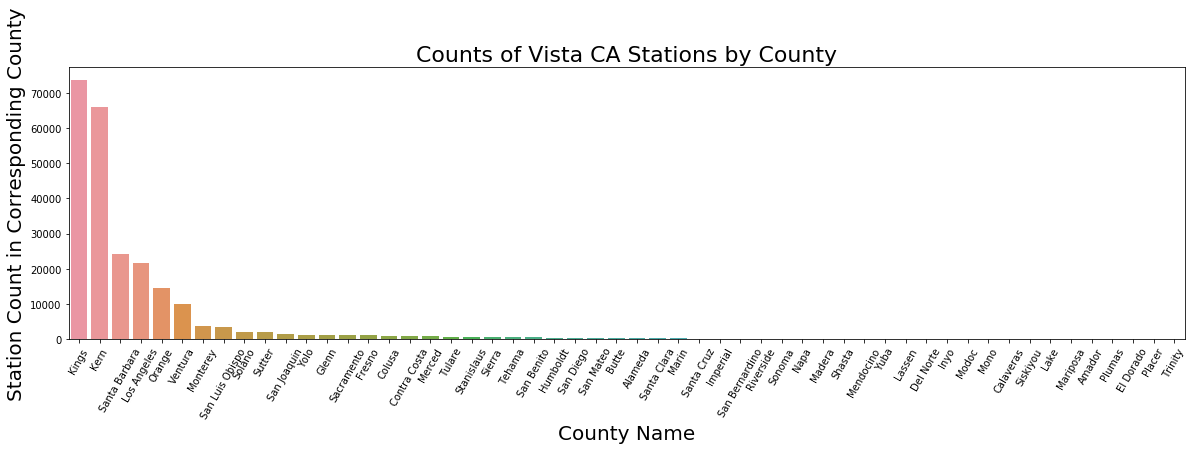

In [62]:
centroid_count = pd.DataFrame(cleaned_combined_vista_ca['Closest_County_Centroid'].value_counts()).reset_index()
display(centroid_count.head())

plt.figure(figsize=(20, 5))
sns.barplot(data=centroid_count, x='index', y='Closest_County_Centroid')

plt.xticks(rotation=60, size=10)
plt.xlabel('County Name', size=afsize)
plt.ylabel('Station Count in Corresponding County', size=afsize)
plt.title('Counts of Vista CA Stations by County', size=afsize+2)
plt.show()

##### Displaying Uniqueness Count of `VistaSType` , `VistaIPCC`, and `City`

In [63]:
## value count for VistaSType
vistastype_count = pd.DataFrame(cleaned_combined_vista_ca['VistaSType'].value_counts()).reset_index()
display(vistastype_count)

## value count for VistaIPCC
vistaipcc_count = pd.DataFrame(cleaned_combined_vista_ca['VistaIPCC'].value_counts()).reset_index()
display(vistaipcc_count)

## value count for City
vistacity_count = pd.DataFrame(cleaned_combined_vista_ca['City'].value_counts()).reset_index()
display(vistacity_count)


index  VistaSType
0                         Oil and Gas Well      225766
1            Oil and Gas Facility Boundary        3356
2                                    Dairy        1715
3                      Natural Gas Station        1120
4                                 Landfill         714
5               Oil and Gas Field Boundary         516
6                              Power Plant         433
7                         Composting Sites         430
8   Compressed Natural Gas Fueling Station         162
9               Wastewater Treatment Plant         149
10                                Feed Lot          72
11   Liquefied Natural Gas Fueling Station          46
12                                Digester          33
13           Natural Gas Processing Plants          26
14                                Refinery          26
15               Natural Gas Storage Field          12

index  VistaIPCC
0                            1B2 Oil and Natural Gas     231004
1  3A1 & 3A2 Enteric Fermentation and Manure Mana...       1715
2                   4A1 Managed Waste Disposal Sites        714
3                              1A1 Energy Industries        459
4             4B Biological Treatment of Solid Waste        430
5  4D1 & 4D2 Domestic Wastewater Treatment and Di...        149
6                           3A1 Enteric Fermentation         72
7                              3A2 Manure Management         33

index    City
0               Kern  142645
1        Los Angeles   22421
2             Fresno   12091
3            Ventura    8382
4             Orange    8239
..               ...     ...
643  American Canyon       1
644       Santa Ynez       1
645  Borrego Springs       1
646    Big Bear Lake       1
647          Menifee       1

[648 rows x 2 columns]

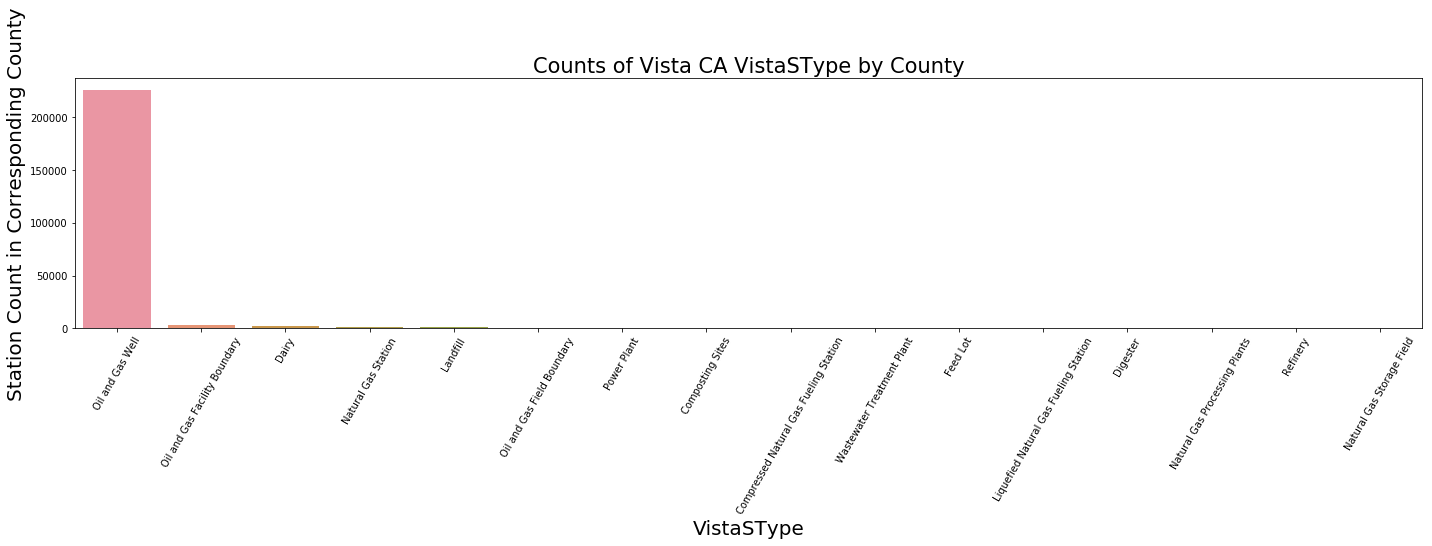

In [64]:
plt.figure(figsize=(20, 7))

## barplot for VistaSType
sns.barplot(data=vistastype_count, x='index', y='VistaSType')

## Chart Design
plt.xticks(rotation=60, size=10)
plt.xlabel('VistaSType', fontsize = afsize)
plt.ylabel('Station Count in Corresponding County', fontsize = afsize)
plt.title('Counts of Vista CA VistaSType by County', fontsize = afsize+1)


plt.tight_layout()
plt.show()

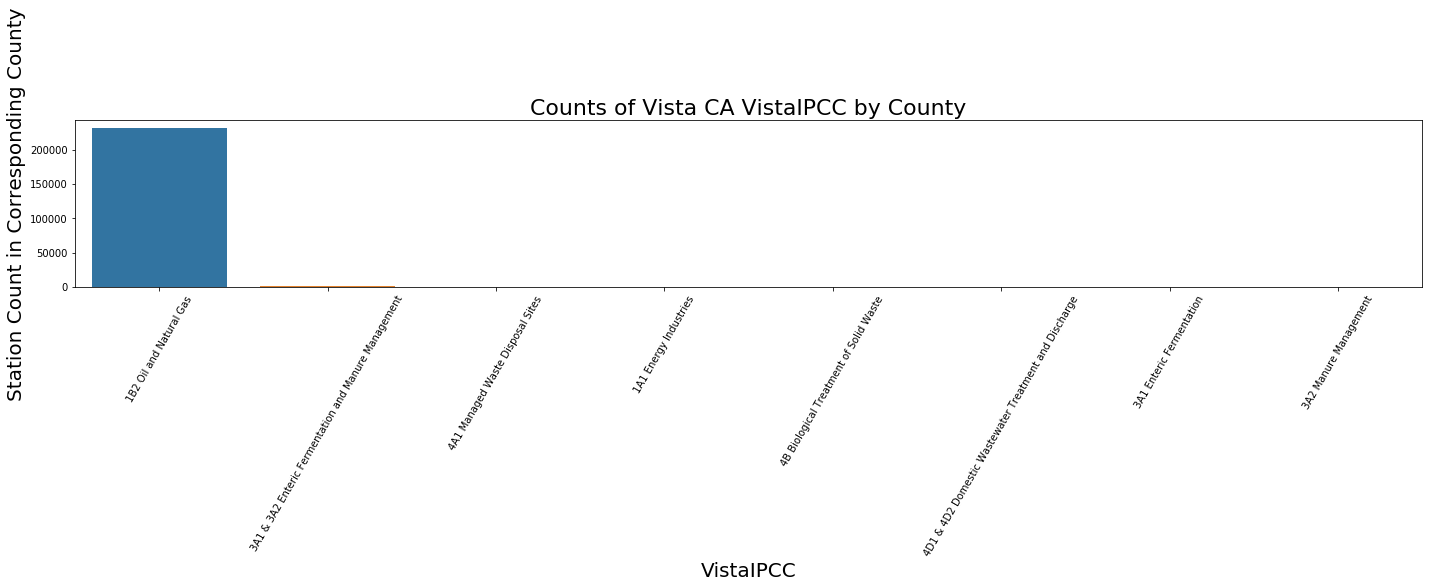

In [65]:
plt.figure(figsize=(20, 7))

## barplot for VistaIPCC
sns.barplot(data=vistaipcc_count, x='index', y='VistaIPCC')

## Chart Design
plt.xticks(rotation=60, size=10)
plt.xlabel('VistaIPCC', fontsize = afsize)
plt.ylabel('Station Count in Corresponding County', fontsize = afsize)
plt.title('Counts of Vista CA VistaIPCC by County', size=afsize+2)

plt.tight_layout()
plt.show()


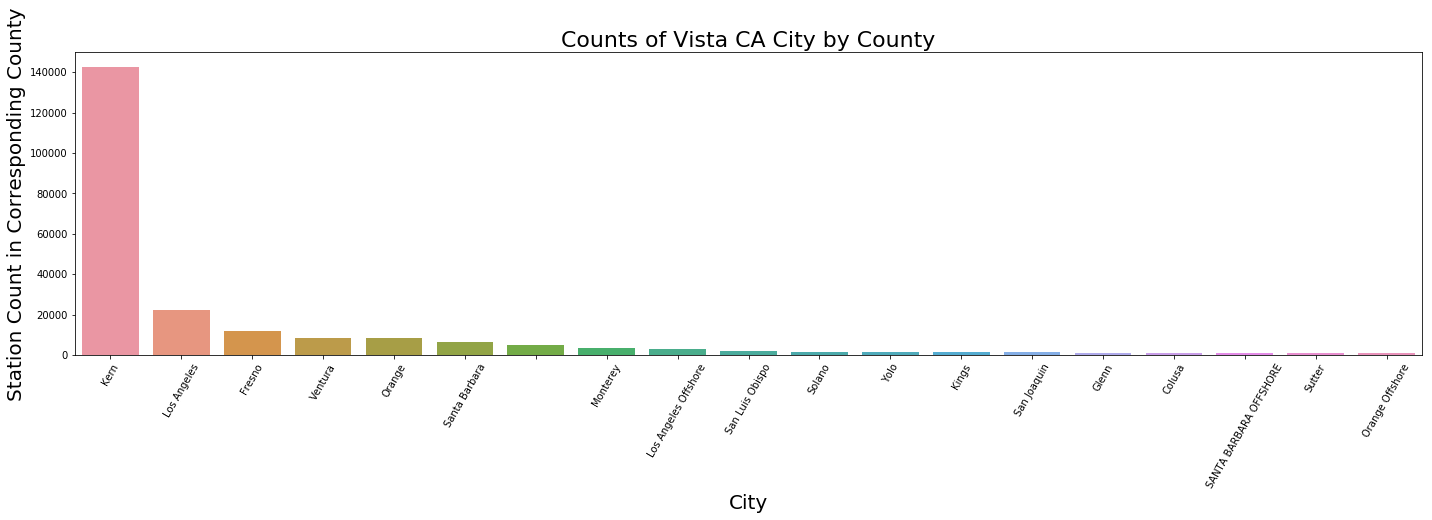

In [67]:
plt.figure(figsize=(20, 7))

## barplot for City with stations over 100
sns.barplot(data=vistacity_count[vistacity_count['City'] > 1000], x='index', y='City')

## Chart Design
plt.xticks(rotation=60, size=10)
plt.xlabel('City', fontsize = afsize)
plt.ylabel('Station Count in Corresponding County', fontsize = afsize)
plt.title('Counts of Vista CA City by County', size=afsize+2)

plt.tight_layout()
plt.show()


### Extracting All EMSEIC


In [7]:
'''
Wrapper for pd.read_csv to keep track of progress
'''
def extract_csv(directory, fn):
    path = directory + "/" + fn
    print("\nOpening : " + path)
    df = pd.read_csv(path)
    
    print("  Shape read: {s}".format(s=str(df.shape)))
    return df

'''
Given a directory, reads all the csv files and combines them into one dataframe.
'''
def extract_all_csv(csv_dir):
    files = os.listdir(csv_dir)
    
    combined = pd.DataFrame()
    for fn in files:
        if fn[-4:] == '.csv':
            extracted = extract_csv(csv_dir, fn)

            combined = pd.concat([combined, extracted])
    return combined


In [69]:
emseic_dir = 'data/emseic'
combined_emseic = extract_all_csv(emseic_dir)
combined_emseic.head()


Opening : data/emseic/emseic_46.csv
  Shape read: (1729, 19)

Opening : data/emseic/emseic_52.csv
  Shape read: (1903, 19)

Opening : data/emseic/emseic_53.csv
  Shape read: (1758, 19)

Opening : data/emseic/emseic_47.csv
  Shape read: (1789, 19)

Opening : data/emseic/emseic_51.csv
  Shape read: (1870, 19)

Opening : data/emseic/emseic_45.csv
  Shape read: (1956, 19)

Opening : data/emseic/emseic_44.csv
  Shape read: (1819, 19)

Opening : data/emseic/emseic_50.csv
  Shape read: (1980, 19)

Opening : data/emseic/emseic_54.csv
  Shape read: (2211, 19)

Opening : data/emseic/emseic_40.csv
  Shape read: (2053, 19)

Opening : data/emseic/emseic_41.csv
  Shape read: (2072, 19)

Opening : data/emseic/emseic_55.csv
  Shape read: (1797, 19)

Opening : data/emseic/emseic_8.csv
  Shape read: (1885, 19)

Opening : data/emseic/emseic_43.csv
  Shape read: (2159, 19)

Opening : data/emseic/emseic_57.csv
  Shape read: (1939, 19)

Opening : data/emseic/emseic_56.csv
  Shape read: (2233, 19)

Opening 

DATA_SOURCE  YEAR    AREA          SEASON         EMISSION_TYPE    SRC_TYPE  \
0   SIP105ADJ  2012  SIERRA  Annual Average  Grown and Controlled  STATIONARY   
1   SIP105ADJ  2012  SIERRA  Annual Average  Grown and Controlled  STATIONARY   
2   SIP105ADJ  2012  SIERRA  Annual Average  Grown and Controlled  STATIONARY   
3   SIP105ADJ  2012  SIERRA  Annual Average  Grown and Controlled  STATIONARY   
4   SIP105ADJ  2012  SIERRA  Annual Average  Grown and Controlled  STATIONARY   

                  EIC                           EICSUMN  \
0   052-042-1200-0010  FOOD AND AGRICULTURAL PROCESSING   
1   052-042-1200-0011  FOOD AND AGRICULTURAL PROCESSING   
2   099-040-1200-0000           OTHER (FUEL COMBUSTION)   
3   099-080-0012-0000           OTHER (FUEL COMBUSTION)   
4   110-110-0300-0000                  SEWAGE TREATMENT   

                       EICSOUN                              EICMATN  \
0  AG. IRRIGATION I.C. ENGINES  DIESEL/DISTILLATE OIL (UNSPECIFIED)   
1  AG. IRRIGATION I.C. ENGINES  DIESEL/DISTILLATE OIL (UNSPECIFIED)   
2   I.C. RECIPROCATING ENGINES  DIESEL/DISTILLATE OIL (UNSPECIFIED)   
3            RESOURCE RECOVERY                   FUEL (UNSPECIFIED)   
4      SEWAGE TREATMENT PLANTS           LIQUID WASTE (UNSPECIFIED)   

                    EICSUBN     TOG     ROG       COT       NOX     SOX  \
0                STATIONARY  0.0018  0.0011  0.007600  0.020100  0.0001   
1                  PORTABLE  0.0020  0.0012  0.006100  0.012800  0.0000   
2  SUB-CATEGORY UNSPECIFIED  0.0000  0.0000  0.000687  0.000776  0.0000   
3  SUB-CATEGORY UNSPECIFIED  0.0003  0.0000  0.000300  0.000000  0.0000   
4  SUB-CATEGORY UNSPECIFIED  0.0000  0.0000  0.000000  0.000000  0.0000   

       PM    PM10   PM2_5  
0  0.0007  0.0006  0.0006  
1  0.0008  0.0006  0.0006  
2  0.0000  0.0000  0.0000  
3  0.0000  0.0000  0.0000  
4  0.0000  0.0000  0.0000

In [70]:
print(combined_emseic.shape)

combined_emseic.columns

(114398, 19)


Index(['DATA_SOURCE', 'YEAR', 'AREA', 'SEASON', 'EMISSION_TYPE', 'SRC_TYPE',
       'EIC', 'EICSUMN', 'EICSOUN', 'EICMATN', 'EICSUBN', 'TOG', 'ROG', 'COT',
       'NOX', 'SOX', 'PM', 'PM10', 'PM2_5'],
      dtype='object')

## Data Aggregation and Consolidation


In [71]:
full_vista_counties = pd.read_csv('processed_data/cleaned_combined_vista_ca.csv')

/Library/Python/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Standardizing Spelling of Counties in EMSEIC with CA Counties

We will use EMSEIC spelling, where county is all capital letter and ignores " county" in the name.

It is simpler to convert to all caps and get rid  of " County" than the other way.

We also ensure we are using `counties_wgs84` so that we are using the correct coordinatee reference system.

In [72]:
print(full_vista_counties.shape)
full_vista_counties.head()

(234576, 17)


Unnamed: 0  index  Latitude  Longitude  \
0           0      0  37.72799 -120.89865   
1           1      1  33.70999 -117.32864   
2           2      2  38.01667 -122.13333   
3           3      3  34.03281 -118.35424   
4           4      4  34.44517 -117.29007   

                                VistaIPCC  \
0  4B Biological Treatment of Solid Waste   
1  4B Biological Treatment of Solid Waste   
2  4B Biological Treatment of Solid Waste   
3  4B Biological Treatment of Solid Waste   
4  4B Biological Treatment of Solid Waste   

                                  VistaName        VistaSType   Vista_ID  \
0                                3D Ag, LLC  Composting Sites  CMP000001   
1                    A. Lua Recycling, Inc.  Composting Sites  CMP000002   
2          Acme Composting Compost Facility  Composting Sites  CMP000003   
3                       Adams Garden Supply  Composting Sites  CMP000004   
4  Advance Disposal Center for the Environm  Composting Sites  CMP000005   

   Vista_Date State                City      Source  \
0  2019-08-20    CA             Oakdale  CalRecycle   
1  2019-08-20    CA       Lake Elsinore  CalRecycle   
2  2019-08-20    CA            Martinez  CalRecycle   
3  2019-08-20    CA  Los Angeles (City)  CalRecycle   
4  2019-08-20    CA            Hesperia  CalRecycle   

                                            geometry County  \
0  POLYGON ((-120.89865 37.7280800971221, -120.89...    NaN   
1  POLYGON ((-117.32864 33.71008015737547, -117.3...    NaN   
2  POLYGON ((-122.13333 38.01676009269305, -122.1...    NaN   
3  POLYGON ((-118.35424 34.03290015264501, -118.3...    NaN   
4  POLYGON ((-117.29007 34.44526014657136, -117.2...    NaN   

   Station_Longitude  Station_Latitude Closest_County_Centroid  
0         -120.89865          37.72799              Stanislaus  
1         -117.32864          33.70999                  Orange  
2         -122.13333          38.01667            Contra Costa  
3         -118.35424          34.03281             Los Angeles  
4         -117.29007          34.44517                  Orange

In [74]:
combined_emseic['AREA'].unique()

array(['SIERRA', 'TEHAMA', 'TRINITY', 'SISKIYOU', 'SUTTER', 'SHASTA',
       'SANTA CRUZ', 'STANISLAUS', 'TULARE', 'SAN LUIS OBISPO',
       'SAN MATEO', 'TUOLUMNE', 'DEL NORTE', 'SANTA CLARA', 'YOLO',
       'VENTURA', 'SANTA BARBARA', 'EL DORADO', 'MODOC', 'PLACER',
       'LOS ANGELES', 'LASSEN', 'ORANGE', 'MERCED', 'PLUMAS', 'MONO',
       'MONTEREY', 'RIVERSIDE', 'SAN DIEGO', 'MENDOCINO', 'MARIPOSA',
       'SAN BERNARDINO', 'MADERA', 'SACRAMENTO', 'SAN BENITO', 'MARIN',
       'FRESNO', 'SAN FRANCISCO', 'SAN JOAQUIN', 'GLENN', 'IMPERIAL',
       'HUMBOLDT', 'KINGS', 'LAKE', 'NEVADA', 'KERN', 'INYO', 'NAPA',
       'BUTTE', 'CALAVERAS', 'CONTRA COSTA', 'YUBA', 'COLUSA', 'ALPINE',
       'SONOMA', 'SOLANO', 'AMADOR', 'ALAMEDA'], dtype=object)

In [75]:
full_vista_counties['Closest_County_Centroid'].unique()

array(['Stanislaus', 'Orange', 'Contra Costa', 'Los Angeles', 'San Diego',
       'Ventura', 'Monterey', 'Alameda', 'Humboldt', 'Sonoma',
       'Santa Clara', 'San Luis Obispo', 'Kern', 'San Bernardino',
       'San Mateo', 'Santa Cruz', 'Merced', 'San Joaquin', 'Marin',
       'Imperial', 'Napa', 'Kings', 'Tulare', 'Butte', 'Tehama', 'Shasta',
       'Yolo', 'Sacramento', 'Riverside', 'Lake', 'Glenn', 'Del Norte',
       'Santa Barbara', 'Sutter', 'Fresno', 'Solano', 'Yuba', 'Mariposa',
       'Colusa', 'Mendocino', 'San Benito', 'Inyo', 'Calaveras', 'Amador',
       'El Dorado', 'Lassen', 'Modoc', 'Madera', 'Siskiyou', 'Mono',
       'Trinity', 'Sierra', 'Placer', 'Plumas'], dtype=object)

In [76]:
def convert_CA_County_to_EMSEIC_County(emseic_county):
    emseic_county = emseic_county.upper()
    return emseic_county


In [77]:
assert convert_CA_County_to_EMSEIC_County('Orange') == 'ORANGE'
assert convert_CA_County_to_EMSEIC_County('Fresno') == 'FRESNO'
assert convert_CA_County_to_EMSEIC_County('Lake') == 'LAKE'


In [116]:
full_vista_counties['Closest_County_Centroid'] = [convert_CA_County_to_EMSEIC_County(c) for c in full_vista_counties['Closest_County_Centroid']]
counties_wgs84['County'] = [convert_CA_County_to_EMSEIC_County(c) for c in counties_wgs84['NAME']]

In [117]:
counties_wgs84.head()

STATEFP COUNTYFP  COUNTYNS  GEOID           NAME              NAMELSAD LSAD  \
0      06      091  00277310  06091         Sierra         Sierra County   06   
1      06      067  00277298  06067     Sacramento     Sacramento County   06   
2      06      083  00277306  06083  Santa Barbara  Santa Barbara County   06   
3      06      009  01675885  06009      Calaveras      Calaveras County   06   
4      06      111  00277320  06111        Ventura        Ventura County   06   

  CLASSFP  MTFCC CSAFP  ... METDIVFP FUNCSTAT       ALAND      AWATER  \
0      H1  G4020  None  ...     None        A  2468694587    23299110   
1      H1  G4020   472  ...     None        A  2499183617    76073827   
2      H1  G4020  None  ...     None        A  7084000598  2729814515   
3      H1  G4020  None  ...     None        A  2641820834    43806026   
4      H1  G4020   348  ...     None        A  4773390489   945942791   

      INTPTLAT      INTPTLON  \
0  +39.5769252  -120.5219926   
1  +38.4500114  -121.3404409   
2  +34.5370572  -120.0399729   
3  +38.1838996  -120.5614415   
4  +34.3587415  -119.1331432   

                                            geometry Centroid_Latitude  \
0  POLYGON ((-120.65560 39.69357, -120.65554 39.6...         39.576925   
1  POLYGON ((-121.18858 38.71431, -121.18732 38.7...         38.450011   
2  MULTIPOLYGON (((-120.58191 34.09856, -120.5822...         34.537057   
3  POLYGON ((-120.63095 38.34111, -120.63058 38.3...         38.183900   
4  MULTIPOLYGON (((-119.63631 33.27304, -119.6360...         34.358742   

   Centroid_Longitude         County  
0         -120.521993         SIERRA  
1         -121.340441     SACRAMENTO  
2         -120.039973  SANTA BARBARA  
3         -120.561442      CALAVERAS  
4         -119.133143        VENTURA  

[5 rows x 21 columns]

### Grouping Vista CA by CA Counties

We want to use the number of each facility in a particular county as features for predicting emissions. 

In [140]:
full_vista_counties_aggregated = full_vista_counties.groupby(['Closest_County_Centroid', 'VistaSType']).agg('count')
full_vista_counties_aggregated.head()

Unnamed: 0  \
Closest_County_Centroid VistaSType                                          
ALAMEDA                 Composting Sites                                6   
                        Landfill                                       42   
                        Liquefied Natural Gas Fueling Station           3   
                        Natural Gas Station                            35   
                        Oil and Gas Facility Boundary                   8   

                                                               index  \
Closest_County_Centroid VistaSType                                     
ALAMEDA                 Composting Sites                           6   
                        Landfill                                  42   
                        Liquefied Natural Gas Fueling Station      3   
                        Natural Gas Station                       35   
                        Oil and Gas Facility Boundary              8   

                                                               Latitude  \
Closest_County_Centroid VistaSType                                        
ALAMEDA                 Composting Sites                              6   
                        Landfill                                     42   
                        Liquefied Natural Gas Fueling Station         3   
                        Natural Gas Station                          35   
                        Oil and Gas Facility Boundary                 8   

                                                               Longitude  \
Closest_County_Centroid VistaSType                                         
ALAMEDA                 Composting Sites                               6   
                        Landfill                                      42   
                        Liquefied Natural Gas Fueling Station          3   
                        Natural Gas Station                           35   
                        Oil and Gas Facility Boundary                  8   

                                                               VistaIPCC  \
Closest_County_Centroid VistaSType                                         
ALAMEDA                 Composting Sites                               6   
                        Landfill                                      42   
                        Liquefied Natural Gas Fueling Station          3   
                        Natural Gas Station                           35   
                        Oil and Gas Facility Boundary                  8   

                                                               VistaName  \
Closest_County_Centroid VistaSType                                         
ALAMEDA                 Composting Sites                               6   
                        Landfill                                      42   
                        Liquefied Natural Gas Fueling Station          3   
                        Natural Gas Station                           35   
                        Oil and Gas Facility Boundary                  8   

                                                               Vista_ID  \
Closest_County_Centroid VistaSType                                        
ALAMEDA                 Composting Sites                              6   
                        Landfill                                     42   
                        Liquefied Natural Gas Fueling Station         3   
                        Natural Gas Station                          35   
                        Oil and Gas Facility Boundary                 8   

                                                               Vista_Date  \
Closest_County_Centroid VistaSType                                          
ALAMEDA                 Composting Sites                                6   
                        Landfill                                       42   
                        Liquefied Natural Gas Fueling Stati

In [145]:
resetted_vista_aggregated = full_vista_counties_aggregated.reset_index()
resetted_vista_aggregated.head()

Closest_County_Centroid                             VistaSType  Unnamed: 0  \
0                 ALAMEDA                       Composting Sites           6   
1                 ALAMEDA                               Landfill          42   
2                 ALAMEDA  Liquefied Natural Gas Fueling Station           3   
3                 ALAMEDA                    Natural Gas Station          35   
4                 ALAMEDA          Oil and Gas Facility Boundary           8   

   index  Latitude  Longitude  VistaIPCC  VistaName  Vista_ID  Vista_Date  \
0      6         6          6          6          6         6           6   
1     42        42         42         42         42        42          42   
2      3         3          3          3          3         3           3   
3     35        35         35         35         35        35          35   
4      8         8          8          8          8         8           8   

   State  City  Source  geometry  County  Station_Longitude  Station_Latitude  
0      6     6       6         6       0                  6                 6  
1      0    42      42        42       0                 42                42  
2      3     3       3         3       0                  3                 3  
3     35     0      35        35      35                 35                35  
4      8     0       8         8       0                  8                 8

In [523]:
county_vista_stations_count = resetted_vista_aggregated.pivot(index='Closest_County_Centroid', columns='VistaSType', values='index')

county_vista_stations_count_reset = county_vista_stations_count.reset_index().fillna(0)
print(county_vista_stations_count_reset.shape)
county_vista_stations_count_reset.head()



(54, 17)


VistaSType Closest_County_Centroid  Composting Sites  \
0                          ALAMEDA               6.0   
1                           AMADOR               1.0   
2                            BUTTE               5.0   
3                        CALAVERAS               1.0   
4                           COLUSA               2.0   

VistaSType  Compressed Natural Gas Fueling Station  Dairy  Digester  Feed Lot  \
0                                              0.0    0.0       0.0       0.0   
1                                              0.0    0.0       0.0       0.0   
2                                              0.0    3.0       1.0       0.0   
3                                              0.0    0.0       0.0       0.0   
4                                              0.0    1.0       0.0       0.0   

VistaSType  Landfill  Liquefied Natural Gas Fueling Station  \
0               42.0                                    3.0   
1                0.0                                    0.0   
2                1.0                                    0.0   
3                0.0                                    0.0   
4                0.0                                    0.0   

VistaSType  Natural Gas Processing Plants  Natural Gas Station  \
0                                     0.0                 35.0   
1                                     0.0                  1.0   
2                                     0.0                  9.0   
3                                     0.0                  2.0   
4                                     0.0                 13.0   

VistaSType  Natural Gas Storage Field  Oil and Gas Facility Boundary  \
0                                 0.0                            8.0   
1                                 0.0                            0.0   
2                                 0.0                            0.0   
3                                 0.0                            0.0   
4                                 1.0                            9.0   

VistaSType  Oil and Gas Field Boundary  Oil and Gas Well  Power Plant  \
0                                  0.0             105.0         24.0   
1                                  0.0               1.0          1.0   
2                                  0.0             237.0          4.0   
3                                  0.0               1.0          2.0   
4                                  0.0             873.0          2.0   

VistaSType  Refinery  Wastewater Treatment Plant  
0                0.0                         8.0  
1                0.0                         0.0  
2                0.0                         1.0  
3                0.0                         1.0  
4                0.0                         0.0

In [524]:
## Manurally creating rows for countise that have no facilities closest to  its centroid
cvscr_cols = county_vista_stations_count_reset.columns
isolated_counties = ['ALPINE', 'NEVADA', 'SAN FRANCISCO', 'TUOLUMNE']
county_vista_addition = {}
# i = 0
for i in range(4):
    for c in cvscr_cols:
        index = i + county_vista_stations_count_reset.shape[0]
        if c not in county_vista_addition.keys():
            county_vista_addition[c] = {}

        if c == 'Closest_County_Centroid':
            county_vista_addition[c][index] = isolated_counties[i]
        else:
            county_vista_addition[c][index] = 0
    


In [525]:
manual_additions = pd.DataFrame(county_vista_addition)
county_vista_stations_count_reset = county_vista_stations_count_reset.append(manual_additions).sort_values('Closest_County_Centroid')

In [526]:
## saving the dataframe that contains the number of each facility in each nearest county centroid
county_vista_stations_count_reset.to_csv('processed_data/county_vista_stations_count.csv')


### Combining Our Datasets


In [118]:
garbo = [print(c) for c in counties_wgs84.columns]
display(counties_wgs84)

garbo = [print(c) for c in full_vista_counties.columns]
display(full_vista_counties)

garbo = [print(c) for c in combined_emseic.columns]
display(combined_emseic)

STATEFP
COUNTYFP
COUNTYNS
GEOID
NAME
NAMELSAD
LSAD
CLASSFP
MTFCC
CSAFP
CBSAFP
METDIVFP
FUNCSTAT
ALAND
AWATER
INTPTLAT
INTPTLON
geometry
Centroid_Latitude
Centroid_Longitude
County


STATEFP COUNTYFP  COUNTYNS  GEOID             NAME                NAMELSAD  \
0       06      091  00277310  06091           Sierra           Sierra County   
1       06      067  00277298  06067       Sacramento       Sacramento County   
2       06      083  00277306  06083    Santa Barbara    Santa Barbara County   
3       06      009  01675885  06009        Calaveras        Calaveras County   
4       06      111  00277320  06111          Ventura          Ventura County   
5       06      037  00277283  06037      Los Angeles      Los Angeles County   
6       06      097  01657246  06097           Sonoma           Sonoma County   
7       06      031  00277280  06031            Kings            Kings County   
8       06      073  00277301  06073        San Diego        San Diego County   
9       06      061  00277295  06061           Placer           Placer County   
10      06      075  00277302  06075    San Francisco    San Francisco County   
11      06      041  00277285  06041            Marin            Marin County   
12      06      043  00277286  06043         Mariposa         Mariposa County   
13      06      035  01693324  06035           Lassen           Lassen County   
14      06      055  00277292  06055             Napa             Napa County   
15      06      089  01682610  06089           Shasta           Shasta County   
16      06      053  00277291  06053         Monterey         Monterey County   
17      06      105  00277317  06105          Trinity          Trinity County   
18      06      045  00277287  06045        Mendocino        Mendocino County   
19      06      027  01804637  06027             Inyo             Inyo County   
20      06      051  00277290  06051             Mono             Mono County   
21      06      109  00277319  06109         Tuolumne         Tuolumne County   
22      06      095  00277312  06095           Solano           Solano County   
23      06      071  00277300  06071   San Bernardino   San Bernardino County   
24      06      013  01675903  06013     Contra Costa     Contra Costa County   
25      06      003  01675840  06003           Alpine           Alpine County   
26      06      017  00277273  06017        El Dorado        El Dorado County   
27      06      113  00277321  06113             Yolo             Yolo County   
28      06      115  00277322  06115             Yuba             Yuba County   
29      06      069  00277299  06069       San Benito       San Benito County   
30      06      023  01681908  06023         Humboldt         Humboldt County   
31      06      065  00277297  06065        Riverside        Riverside County   
32      06      029  02054176  06029             Kern             Kern County   
33      06      011  01675902  06011           Colusa           Colusa County   
34      06      015  01682074  06015        Del Norte        Del Norte County   
35      06      049  00277289  06049            Modoc            Modoc County   
36      06      019  00277274  06019           Fresno           Fresno County   
37      06      039  00277284  06039           Madera           Madera County   
38      06      085  00277307  06085      Santa Clara      Santa Clara County   
39      06      103  01692767  06103           Tehama           Tehama County   
40      06      077  00277303  06077      San Joaquin      San Joaquin County   
41      06      001  01675839  06001          Alameda          Alameda County   
42      06      057  01682927  06057           Nevada           Nevada County   
43      06      007  01675842  06007            Butte            Butte County   
44      06      047  00277288  06047           Merced           Merced County   
45      06      107  00277318  06107           Tulare           Tulare County   
46      06      099  00277314  06099       Stanislaus       Stanislaus County   
47      06      059  00277294  06059           Orange           Orange County   
48      06      025  00277277  060

Unnamed: 0
index
Latitude
Longitude
VistaIPCC
VistaName
VistaSType
Vista_ID
Vista_Date
State
City
Source
geometry
County
Station_Longitude
Station_Latitude
Closest_County_Centroid


Unnamed: 0  index   Latitude   Longitude  \
0                0      0  37.727990 -120.898650   
1                1      1  33.709990 -117.328640   
2                2      2  38.016670 -122.133330   
3                3      3  34.032810 -118.354240   
4                4      4  34.445170 -117.290070   
...            ...    ...        ...         ...   
234571      234571    144  34.032433 -118.068310   
234572      234572    145  34.053708 -117.360473   
234573      234573    146  34.050912 -117.336137   
234574      234574    147  34.006827 -117.094498   
234575      234575    148  32.780446 -117.043184   

                                                VistaIPCC  \
0                  4B Biological Treatment of Solid Waste   
1                  4B Biological Treatment of Solid Waste   
2                  4B Biological Treatment of Solid Waste   
3                  4B Biological Treatment of Solid Waste   
4                  4B Biological Treatment of Solid Waste   
...                                                   ...   
234571  4D1 & 4D2 Domestic Wastewater Treatment and Di...   
234572  4D1 & 4D2 Domestic Wastewater Treatment and Di...   
234573  4D1 & 4D2 Domestic Wastewater Treatment and Di...   
234574  4D1 & 4D2 Domestic Wastewater Treatment and Di...   
234575  4D1 & 4D2 Domestic Wastewater Treatment and Di...   

                                       VistaName                  VistaSType  \
0                                     3D Ag, LLC            Composting Sites   
1                         A. Lua Recycling, Inc.            Composting Sites   
2               Acme Composting Compost Facility            Composting Sites   
3                            Adams Garden Supply            Composting Sites   
4       Advance Disposal Center for the Environm            Composting Sites   
...                                          ...                         ...   
234571  Whittier Narrows Water Reclamation Plant  Wastewater Treatment Plant   
234572                                Rialto WRF  Wastewater Treatment Plant   
234573                                    Colton  Wastewater Treatment Plant   
234574    Yucaipa Valley Henry N. Wochholtz WWTP  Wastewater Treatment Plant   
234575            Alvarado Water Treatment Plant  Wastewater Treatment Plant   

         Vista_ID  Vista_Date State                City      Source  \
0       CMP000001  2019-08-20    CA             Oakdale  CalRecycle   
1       CMP000002  2019-08-20    CA       Lake Elsinore  CalRecycle   
2       CMP000003  2019-08-20    CA            Martinez  CalRecycle   
3       CMP000004  2019-08-20    CA  Los Angeles (City)  CalRecycle   
4       CMP000005  2019-08-20    CA            Hesperia  CalRecycle   
...           ...         ...   ...                 ...         ...   
234571  WWT000146  2019-08-20    CA            El Monte        CARB   
234572  WWT000100  2019-08-20    CA          Bloomingon        CARB   
234573  WWT000019  2019-08-20    CA              Colton        CARB   
234574  WWT000148  2019-08-20    CA             Yucaipa        CARB   
234575  WWT000149  2019-08-20    CA           San Diego       RAFIQ   

                                                 geometry County  \
0       POLYGON ((-120.89865 37.7280800971221, -120.89...    NaN   
1       POLYGON ((-117.32864 33.71008015737547, -117.3...    NaN   
2       POLYGON ((-122.13333 38.01676009269305, -122.1...    NaN   
3       POLYGON ((-118.35424 34.03290015264501, -118.3...    NaN   
4       POLYGON ((-117.29007 34.44526014657136, -117.2...    NaN   
...                                                   ...    ...   
234571  POLYGON Z ((-118.0667893398773 34.031022707857...    NaN   
234572  POLYGON Z ((-117.3614326952756 34.055876430536...    NaN   
234573  POLYGON Z ((-117.3342819365315 34.052493907270...    NaN   
234574  POLYGON Z ((-117.0997841463448 34.007912902323...    NaN   
234575  POLYGON Z ((-117.0401974271298 32.782726071098...    NaN   

        Station_Lon

DATA_SOURCE
YEAR
AREA
SEASON
EMISSION_TYPE
SRC_TYPE
EIC
EICSUMN
EICSOUN
EICMATN
EICSUBN
TOG
ROG
COT
NOX
SOX
PM
PM10
PM2_5


DATA_SOURCE  YEAR     AREA          SEASON         EMISSION_TYPE  \
0      SIP105ADJ  2012   SIERRA  Annual Average  Grown and Controlled   
1      SIP105ADJ  2012   SIERRA  Annual Average  Grown and Controlled   
2      SIP105ADJ  2012   SIERRA  Annual Average  Grown and Controlled   
3      SIP105ADJ  2012   SIERRA  Annual Average  Grown and Controlled   
4      SIP105ADJ  2012   SIERRA  Annual Average  Grown and Controlled   
...          ...   ...      ...             ...                   ...   
2177   SIP105ADJ  2012  ALAMEDA  Annual Average  Grown and Controlled   
2178   SIP105ADJ  2012  ALAMEDA  Annual Average  Grown and Controlled   
2179   SIP105ADJ  2012  ALAMEDA  Annual Average  Grown and Controlled   
2180   SIP105ADJ  2012  ALAMEDA  Annual Average  Grown and Controlled   
2181   SIP105ADJ  2012  ALAMEDA  Annual Average  Grown and Controlled   

        SRC_TYPE                 EIC                           EICSUMN  \
0     STATIONARY   052-042-1200-0010  FOOD AND AGRICULTURAL PROCESSING   
1     STATIONARY   052-042-1200-0011  FOOD AND AGRICULTURAL PROCESSING   
2     STATIONARY   099-040-1200-0000           OTHER (FUEL COMBUSTION)   
3     STATIONARY   099-080-0012-0000           OTHER (FUEL COMBUSTION)   
4     STATIONARY   110-110-0300-0000                  SEWAGE TREATMENT   
...          ...                 ...                               ...   
2177      MOBILE   870-893-1210-8668                    FARM EQUIPMENT   
2178      MOBILE   870-893-1210-8690                    FARM EQUIPMENT   
2179      MOBILE   870-893-1210-8695                    FARM EQUIPMENT   
2180      MOBILE   870-893-1210-9100                    FARM EQUIPMENT   
2181      MOBILE   890-895-1100-0041         FUEL STORAGE AND HANDLING   

                          EICSOUN                              EICMATN  \
0     AG. IRRIGATION I.C. ENGINES  DIESEL/DISTILLATE OIL (UNSPECIFIED)   
1     AG. IRRIGATION I.C. ENGINES  DIESEL/DISTILLATE OIL (UNSPECIFIED)   
2      I.C. RECIPROCATING ENGINES  DIESEL/DISTILLATE OIL (UNSPECIFIED)   
3               RESOURCE RECOVERY                   FUEL (UNSPECIFIED)   
4         SEWAGE TREATMENT PLANTS           LIQUID WASTE (UNSPECIFIED)   
...                           ...                                  ...   
2177       AGRICULTURAL EQUIPMENT                 DIESEL (UNSPECIFIED)   
2178       AGRICULTURAL EQUIPMENT                 DIESEL (UNSPECIFIED)   
2179       AGRICULTURAL EQUIPMENT                 DIESEL (UNSPECIFIED)   
2180       AGRICULTURAL EQUIPMENT                 DIESEL (UNSPECIFIED)   
2181                GASOLINE CANS               GASOLINE (UNSPECIFIED)   

                       EICSUBN     TOG     ROG       COT       NOX     SOX  \
0                   STATIONARY  0.0018  0.0011  0.007600  0.020100  0.0001   
1                     PORTABLE  0.0020  0.0012  0.006100  0.012800  0.0000   
2     SUB-CATEGORY UNSPECIFIED  0.0000  0.0000  0.000687  0.000776  0.0000   
3     SUB-CATEGORY UNSPECIFIED  0.0003  0.0000  0.000300  0.000000  0.0000   
4     SUB-CATEGORY UNSPECIFIED  0.0000  0.0000  0.000000  0.000000  0.0000   
...                        ...     ...     ...       ...       ...     ...   
2177    Swathers-D-100-Exhaust  0.0001  0.0001  0.000300  0.000500  0.0000   
2178    Swathers-D-175-Exhaust  0.0000  0.0000  0.000200  0.000300  0.0000   
2179    SWATHERS-D-300-EXHAUST  0.0000  0.0000  0.000000  0.000100  0.0000   
2180      Tillers-D-15-Exhaust  0.0000  0.0000  0.000000  0.000000  0.0000   
2181   FOUR-STROKE EVAPORATIVE  0.7455  0.7427  0.000000  0.000000  0.0000   

          PM    PM10   PM2_5  
0     0.0007  0.0006  0.0006  
1     0.0008  0.0006  0.0006  
2     0.0000  0.0000  0.0000  
3     0.0000  0.0000  0.0000  
4     0.0000  0.0000  0.0000  
...      ...     ...     ...  
2177  0.0000  0.0000  0.0000  
2178  0.0000  0.0000  0.0000  
2179  0.0000  0.0000  0.0000  
2180  0.0000  0.0000  0.0000  
2181  0.0000  0.0000  0.0000  

[114398 rows x 19 columns]

### Merging Vista CA with CA Counties

At this point, we want to include some county data with the CA Vista data. 

In [119]:
counties_kept = counties_wgs84[['NAME', 'ALAND', 'AWATER', 'geometry', 'Centroid_Latitude', 'Centroid_Longitude', 'County']]
vista_kept = full_vista_counties[['Station_Latitude', 'Station_Longitude', 'VistaIPCC', 'VistaName', 'VistaSType', 'Vista_ID','Vista_Date', 'State', 'City', 'Source','geometry', 'County', 'Closest_County_Centroid']]

vista_counties_merged = pd.merge(vista_kept, counties_kept, left_on='Closest_County_Centroid', right_on='County', how='inner', suffixes=('_Station', '_County'))

In [120]:
vista_counties_merged.head()

Station_Latitude  Station_Longitude  \
0          37.72799         -120.89865   
1          37.59604         -121.31918   
2          37.72475         -120.90214   
3          37.53659         -121.07328   
4          37.48700         -120.86900   

                                VistaIPCC  \
0  4B Biological Treatment of Solid Waste   
1  4B Biological Treatment of Solid Waste   
2  4B Biological Treatment of Solid Waste   
3  4B Biological Treatment of Solid Waste   
4  4B Biological Treatment of Solid Waste   

                                  VistaName        VistaSType   Vista_ID  \
0                                3D Ag, LLC  Composting Sites  CMP000001   
1                             CA Soils, Inc  Composting Sites  CMP000054   
2  Central Valley Agricultural Grinding,Inc  Composting Sites  CMP000064   
3        City Of Modesto Co-Compost Project  Composting Sites  CMP000070   
4   City of Turlock Water Qual. Control Fac  Composting Sites  CMP000076   

   Vista_Date State       City      Source  \
0  2019-08-20    CA    Oakdale  CalRecycle   
1  2019-08-20    CA   Vernalis  CalRecycle   
2  2019-08-20    CA  Riverbank  CalRecycle   
3  2019-08-20    CA    Modesto  CalRecycle   
4  2019-08-20    CA    Turlock  CalRecycle   

                                    geometry_Station County_Station  \
0  POLYGON ((-120.89865 37.7280800971221, -120.89...            NaN   
1  POLYGON ((-121.31918 37.59613009914271, -121.3...            NaN   
2  POLYGON ((-120.90214 37.72484009717176, -120.9...            NaN   
3  POLYGON ((-121.07328 37.53668010005233, -121.0...            NaN   
4  POLYGON ((-120.869 37.48709010081067, -120.868...            NaN   

  Closest_County_Centroid        NAME       ALAND    AWATER  \
0              STANISLAUS  Stanislaus  3874642752  46376455   
1              STANISLAUS  Stanislaus  3874642752  46376455   
2              STANISLAUS  Stanislaus  3874642752  46376455   
3              STANISLAUS  Stanislaus  3874642752  46376455   
4              STANISLAUS  Stanislaus  3874642752  46376455   

                                     geometry_County  Centroid_Latitude  \
0  POLYGON ((-120.92226 37.73748, -120.92160 37.7...          37.562316   
1  POLYGON ((-120.92226 37.73748, -120.92160 37.7...          37.562316   
2  POLYGON ((-120.92226 37.73748, -120.92160 37.7...          37.562316   
3  POLYGON ((-120.92226 37.73748, -120.92160 37.7...          37.562316   
4  POLYGON ((-120.92226 37.73748, -120.92160 37.7...          37.562316   

   Centroid_Longitude County_County  
0         -121.002831    STANISLAUS  
1         -121.002831    STANISLAUS  
2         -121.002831    STANISLAUS  
3         -121.002831    STANISLAUS  
4         -121.002831    STANISLAUS

In [124]:
# vista_counties_merged[vista_counties_merged['Closest_County_Centroid'] != vista_counties_merged['County_y']].sample(5)

vista_counties_merged['County_Station'] = vista_counties_merged['County_Station'].fillna('NA')
vista_counties_merged['County_Station_Upper'] = vista_counties_merged['County_Station'].apply(lambda x: x.upper())
vista_counties_merged.head()

Station_Latitude  Station_Longitude  \
0          37.72799         -120.89865   
1          37.59604         -121.31918   
2          37.72475         -120.90214   
3          37.53659         -121.07328   
4          37.48700         -120.86900   

                                VistaIPCC  \
0  4B Biological Treatment of Solid Waste   
1  4B Biological Treatment of Solid Waste   
2  4B Biological Treatment of Solid Waste   
3  4B Biological Treatment of Solid Waste   
4  4B Biological Treatment of Solid Waste   

                                  VistaName        VistaSType   Vista_ID  \
0                                3D Ag, LLC  Composting Sites  CMP000001   
1                             CA Soils, Inc  Composting Sites  CMP000054   
2  Central Valley Agricultural Grinding,Inc  Composting Sites  CMP000064   
3        City Of Modesto Co-Compost Project  Composting Sites  CMP000070   
4   City of Turlock Water Qual. Control Fac  Composting Sites  CMP000076   

   Vista_Date State       City      Source  ... County_Station  \
0  2019-08-20    CA    Oakdale  CalRecycle  ...             NA   
1  2019-08-20    CA   Vernalis  CalRecycle  ...             NA   
2  2019-08-20    CA  Riverbank  CalRecycle  ...             NA   
3  2019-08-20    CA    Modesto  CalRecycle  ...             NA   
4  2019-08-20    CA    Turlock  CalRecycle  ...             NA   

  Closest_County_Centroid        NAME       ALAND    AWATER  \
0              STANISLAUS  Stanislaus  3874642752  46376455   
1              STANISLAUS  Stanislaus  3874642752  46376455   
2              STANISLAUS  Stanislaus  3874642752  46376455   
3              STANISLAUS  Stanislaus  3874642752  46376455   
4              STANISLAUS  Stanislaus  3874642752  46376455   

                                     geometry_County Centroid_Latitude  \
0  POLYGON ((-120.92226 37.73748, -120.92160 37.7...         37.562316   
1  POLYGON ((-120.92226 37.73748, -120.92160 37.7...         37.562316   
2  POLYGON ((-120.92226 37.73748, -120.92160 37.7...         37.562316   
3  POLYGON ((-120.92226 37.73748, -120.92160 37.7...         37.562316   
4  POLYGON ((-120.92226 37.73748, -120.92160 37.7...         37.562316   

   Centroid_Longitude  County_County County_Station_Upper  
0         -121.002831     STANISLAUS                   NA  
1         -121.002831     STANISLAUS                   NA  
2         -121.002831     STANISLAUS                   NA  
3         -121.002831     STANISLAUS                   NA  
4         -121.002831     STANISLAUS                   NA  

[5 rows x 21 columns]

In [122]:
## These are the stations that are located in counties that are closer to  a neighboring county's centroid  than it is to its  own actual county centroid
vista_counties_merged.query("Closest_County_Centroid != County_Station_Upper  and County_Station_Upper != 'NA'")


Station_Latitude  Station_Longitude                VistaIPCC  \
418            37.448766        -120.849930  1B2 Oil and Natural Gas   
420            37.245967        -121.087444  1B2 Oil and Natural Gas   
421            37.731318        -121.115863  1B2 Oil and Natural Gas   
422            37.731037        -121.124501  1B2 Oil and Natural Gas   
903            34.370339        -117.315328  1B2 Oil and Natural Gas   
...                  ...                ...                      ...   
233435         36.540139        -120.493116  1B2 Oil and Natural Gas   
233941         35.594686        -117.528419  1B2 Oil and Natural Gas   
233942         35.700181        -117.398381  1B2 Oil and Natural Gas   
233977         41.427782        -121.470968  1B2 Oil and Natural Gas   
234051         40.146112        -120.101583  1B2 Oil and Natural Gas   

                VistaName           VistaSType   Vista_ID  Vista_Date State  \
418              Bradbury  Natural Gas Station  COM000599  2019-08-20    CA   
420               Gustine  Natural Gas Station  COM000760  2019-08-20    CA   
421            Ripon Mill  Natural Gas Station  COM000393  2019-08-20    CA   
422             Mid Ripon  Natural Gas Station  COM000290  2019-08-20    CA   
903            Los Flores  Natural Gas Station  COM000843  2019-08-20    CA   
...                   ...                  ...        ...         ...   ...   
233435            Panoche  Natural Gas Station  COM000930  2019-08-20    CA   
233941         Ridgecrest  Natural Gas Station  COM000974  2019-08-20    CA   
233942            Westend  Natural Gas Station  COM001106  2019-08-20    CA   
233977        Powerline 4  Natural Gas Station  COM000954  2019-08-20    CA   
234051  Sierra Army Depot  Natural Gas Station  COM001025  2019-08-20    CA   

       City Source  ...  County_Station Closest_County_Centroid        NAME  \
418     NaN    CEC  ...          Merced              STANISLAUS  Stanislaus   
420     NaN    CEC  ...          Merced              STANISLAUS  Stanislaus   
421     NaN    CEC  ...     San Joaquin              STANISLAUS  Stanislaus   
422     NaN    CEC  ...     San Joaquin              STANISLAUS  Stanislaus   
903     NaN    CEC  ...  San Bernardino                  ORANGE      Orange   
...     ...    ...  ...             ...                     ...         ...   
233435  NaN    CEC  ...          Fresno              SAN BENITO  San Benito   
233941  NaN    CEC  ...  San Bernardino                    INYO        Inyo   
233942  NaN    CEC  ...  San Bernardino                    INYO        Inyo   
233977  NaN    CEC  ...        Siskiyou                   MODOC       Modoc   
234051  NaN    CEC  ...          Lassen                  SIERRA      Sierra   

              ALAND     AWATER  \
418      3874642752   46376455   
420      3874642752   46376455   
421      3874642752   46376455   
422      3874642752   46376455   
903      2047702298  407606601   
...             ...        ...   
233435   3596755292    4555000   
233941  26368508405  119088171   
233942  26368508405  119088171   
233977  10140955630  745425201   
234051   2468694587   23299110   

                                          geometry_County Centroid_Latitude  \
418     POLYGON ((-120.92226 37.73748, -120.92160 37.7...         37.562316   
420     POLYGON ((-120.92226 37.73748, -120.92160 37.7...         37.562316   
421     POLYGON ((-120.92226 37.73748, -120.92160 37.7...         37.562316   
422     POLYGON ((-120.92226 37.73748, -120.92160 37.7...         37.562316   
903     POLYGON ((-117.98911 33.58580, -117.99068 33.5...         33.675687   
...                                                   ...               ...   
233435  POLYGON ((-121.48301 36.76505, -121.48352 36.7...         36.610702   
233941  POLYGON ((-118.33759 36.65481, -118.33774 36.6...         36.561977   
233942  POLYGON ((-118.33759 36.65481, -118.33774 36.6...         36.561977   
233977  POLYGON ((-120.15942 41.99461, -120.15

In [123]:
# combined_emseic[combined_emseic['EICSUMN']=='CONSTRUCTION AND DEMOLITION']

print(vista_counties_merged['VistaIPCC'].unique())

print(combined_emseic['EICSUMN'].unique())


['4B Biological Treatment of Solid Waste'
 '3A1 & 3A2 Enteric Fermentation and Manure Management'
 '3A2 Manure Management' '3A1 Enteric Fermentation'
 '4A1 Managed Waste Disposal Sites' '1B2 Oil and Natural Gas'
 '1A1 Energy Industries'
 '4D1 & 4D2 Domestic Wastewater Treatment and Discharge']
['FOOD AND AGRICULTURAL PROCESSING' 'OTHER (FUEL COMBUSTION)'
 'SEWAGE TREATMENT' 'LANDFILLS' 'LAUNDERING' 'DEGREASING'
 'COATINGS AND RELATED PROCESS SOLVENTS' 'PETROLEUM MARKETING' 'CHEMICAL'
 'MINERAL PROCESSES' 'WOOD AND PAPER' 'CONSUMER PRODUCTS'
 'ARCHITECTURAL COATINGS AND RELATED PROCESS SOLVENTS'
 'PESTICIDES/FERTILIZERS' 'ASPHALT PAVING / ROOFING'
 'RESIDENTIAL FUEL COMBUSTION' 'FARMING OPERATIONS'
 'CONSTRUCTION AND DEMOLITION' 'PAVED ROAD DUST' 'UNPAVED ROAD DUST'
 'FUGITIVE WINDBLOWN DUST' 'MANAGED BURNING AND DISPOSAL' 'COOKING'
 'OTHER (MISCELLANEOUS PROCESSES)' 'LIGHT DUTY PASSENGER (LDA)'
 'LIGHT DUTY TRUCKS - 1 (LDT1)' 'LIGHT DUTY TRUCKS - 2 (LDT2)'
 'MEDIUM DUTY TRUCKS (MDV)' '

### Aggregating EMSEIC

In [291]:
combined_emseic.head()

DATA_SOURCE  YEAR    AREA          SEASON         EMISSION_TYPE    SRC_TYPE  \
0   SIP105ADJ  2012  SIERRA  Annual Average  Grown and Controlled  STATIONARY   
1   SIP105ADJ  2012  SIERRA  Annual Average  Grown and Controlled  STATIONARY   
2   SIP105ADJ  2012  SIERRA  Annual Average  Grown and Controlled  STATIONARY   
3   SIP105ADJ  2012  SIERRA  Annual Average  Grown and Controlled  STATIONARY   
4   SIP105ADJ  2012  SIERRA  Annual Average  Grown and Controlled  STATIONARY   

                  EIC                           EICSUMN  \
0   052-042-1200-0010  FOOD AND AGRICULTURAL PROCESSING   
1   052-042-1200-0011  FOOD AND AGRICULTURAL PROCESSING   
2   099-040-1200-0000           OTHER (FUEL COMBUSTION)   
3   099-080-0012-0000           OTHER (FUEL COMBUSTION)   
4   110-110-0300-0000                  SEWAGE TREATMENT   

                       EICSOUN                              EICMATN  \
0  AG. IRRIGATION I.C. ENGINES  DIESEL/DISTILLATE OIL (UNSPECIFIED)   
1  AG. IRRIGATION I.C. ENGINES  DIESEL/DISTILLATE OIL (UNSPECIFIED)   
2   I.C. RECIPROCATING ENGINES  DIESEL/DISTILLATE OIL (UNSPECIFIED)   
3            RESOURCE RECOVERY                   FUEL (UNSPECIFIED)   
4      SEWAGE TREATMENT PLANTS           LIQUID WASTE (UNSPECIFIED)   

                    EICSUBN     TOG     ROG       COT       NOX     SOX  \
0                STATIONARY  0.0018  0.0011  0.007600  0.020100  0.0001   
1                  PORTABLE  0.0020  0.0012  0.006100  0.012800  0.0000   
2  SUB-CATEGORY UNSPECIFIED  0.0000  0.0000  0.000687  0.000776  0.0000   
3  SUB-CATEGORY UNSPECIFIED  0.0003  0.0000  0.000300  0.000000  0.0000   
4  SUB-CATEGORY UNSPECIFIED  0.0000  0.0000  0.000000  0.000000  0.0000   

       PM    PM10   PM2_5  
0  0.0007  0.0006  0.0006  
1  0.0008  0.0006  0.0006  
2  0.0000  0.0000  0.0000  
3  0.0000  0.0000  0.0000  
4  0.0000  0.0000  0.0000

In [488]:
cumulative_emseic = combined_emseic.groupby('AREA').agg(sum).reset_index().drop('YEAR', axis=1)
print(cumulative_emseic.shape)
cumulative_emseic.head()

(58, 9)


AREA         TOG        ROG         COT        NOX     SOX         PM  \
0    ALAMEDA  134.840060  52.964215  218.327664  70.393760  2.1303  29.412402   
1     ALPINE    0.651000   0.451800    1.675300   0.386966  0.0033   2.161600   
2     AMADOR   10.252184   5.091711   19.055692   4.357744  0.1249   8.725638   
3      BUTTE   23.291007  14.396062   69.518978  18.730721  0.2657  31.816585   
4  CALAVERAS   11.288079   5.075024   21.024100   2.769050  0.0387   5.729100   

        PM10     PM2_5  
0  18.091634  8.204909  
1   1.265200  0.153800  
2   5.396293  2.941648  
3  17.991954  5.661389  
4   3.691200  1.326400

In [489]:
cumulative_emseic[['AREA', 'TOG']]

AREA         TOG
0           ALAMEDA  134.840060
1            ALPINE    0.651000
2            AMADOR   10.252184
3             BUTTE   23.291007
4         CALAVERAS   11.288079
5            COLUSA   14.777140
6      CONTRA COSTA  109.857964
7         DEL NORTE   17.011555
8         EL DORADO   24.500523
9            FRESNO  195.205119
10            GLENN   25.305187
11         HUMBOLDT   56.613049
12         IMPERIAL   48.130640
13             INYO    6.815218
14             KERN  379.130887
15            KINGS  151.082364
16             LAKE   18.478565
17           LASSEN   16.626749
18      LOS ANGELES  690.708203
19           MADERA   50.630562
20            MARIN   37.624732
21         MARIPOSA    8.134797
22        MENDOCINO   19.293561
23           MERCED  194.188434
24            MODOC   15.632338
25             MONO    4.075595
26         MONTEREY  187.756637
27             NAPA   14.537481
28           NEVADA   14.149699
29           ORANGE  331.839272
30           PLACER   59.860253
31           PLUMAS   11.874694
32        RIVERSIDE  220.035361
33       SACRAMENTO  217.165891
34       SAN BENITO   29.848595
35   SAN BERNARDINO  254.389588
36        SAN DIEGO  514.539228
37    SAN FRANCISCO   32.163215
38      SAN JOAQUIN  180.609544
39  SAN LUIS OBISPO   49.657483
40        SAN MATEO   58.457763
41    SANTA BARBARA   68.511205
42      SANTA CLARA  133.675999
43       SANTA CRUZ  118.472655
44           SHASTA   29.922433
45           SIERRA    2.919915
46         SISKIYOU   29.227604
47           SOLANO   54.006337
48           SONOMA   68.423738
49       STANISLAUS  184.935298
50           SUTTER   20.087767
51           TEHAMA   23.245992
52          TRINITY    5.290277
53           TULARE  254.948395
54         TUOLUMNE   15.145404
55          VENTURA   87.089382
56             YOLO   34.693614
57             YUBA   10.720487

### Merging Combined Vista CA + CA Counties with Aggregated EMSEIC

In [126]:
vista_counties_emseic_merged = pd.merge(vista_counties_merged, cumulative_emseic, left_on='Closest_County_Centroid', right_on='AREA', how='inner')


In [137]:
print(vista_counties_emseic_merged.shape)
print(vista_counties_emseic_merged.columns)
vista_counties_emseic_merged = vista_counties_emseic_merged.drop(['County_Station', 'County_Station_Upper', 'AREA'], axis=1)
print(vista_counties_emseic_merged.columns)

vista_counties_emseic_merged.head()

(234576, 30)
Index(['Station_Latitude', 'Station_Longitude', 'VistaIPCC', 'VistaName',
       'VistaSType', 'Vista_ID', 'Vista_Date', 'State', 'City', 'Source',
       'geometry_Station', 'County_Station', 'Closest_County_Centroid', 'NAME',
       'ALAND', 'AWATER', 'geometry_County', 'Centroid_Latitude',
       'Centroid_Longitude', 'County_County', 'County_Station_Upper', 'AREA',
       'TOG', 'ROG', 'COT', 'NOX', 'SOX', 'PM', 'PM10', 'PM2_5'],
      dtype='object')
Index(['Station_Latitude', 'Station_Longitude', 'VistaIPCC', 'VistaName',
       'VistaSType', 'Vista_ID', 'Vista_Date', 'State', 'City', 'Source',
       'geometry_Station', 'Closest_County_Centroid', 'NAME', 'ALAND',
       'AWATER', 'geometry_County', 'Centroid_Latitude', 'Centroid_Longitude',
       'County_County', 'TOG', 'ROG', 'COT', 'NOX', 'SOX', 'PM', 'PM10',
       'PM2_5'],
      dtype='object')


Station_Latitude  Station_Longitude  \
0          37.72799         -120.89865   
1          37.59604         -121.31918   
2          37.72475         -120.90214   
3          37.53659         -121.07328   
4          37.48700         -120.86900   

                                VistaIPCC  \
0  4B Biological Treatment of Solid Waste   
1  4B Biological Treatment of Solid Waste   
2  4B Biological Treatment of Solid Waste   
3  4B Biological Treatment of Solid Waste   
4  4B Biological Treatment of Solid Waste   

                                  VistaName        VistaSType   Vista_ID  \
0                                3D Ag, LLC  Composting Sites  CMP000001   
1                             CA Soils, Inc  Composting Sites  CMP000054   
2  Central Valley Agricultural Grinding,Inc  Composting Sites  CMP000064   
3        City Of Modesto Co-Compost Project  Composting Sites  CMP000070   
4   City of Turlock Water Qual. Control Fac  Composting Sites  CMP000076   

   Vista_Date State       City      Source  ... Centroid_Longitude  \
0  2019-08-20    CA    Oakdale  CalRecycle  ...        -121.002831   
1  2019-08-20    CA   Vernalis  CalRecycle  ...        -121.002831   
2  2019-08-20    CA  Riverbank  CalRecycle  ...        -121.002831   
3  2019-08-20    CA    Modesto  CalRecycle  ...        -121.002831   
4  2019-08-20    CA    Turlock  CalRecycle  ...        -121.002831   

  County_County         TOG        ROG        COT       NOX       SOX  \
0    STANISLAUS  184.935298  38.019414  70.925786  32.91773  1.061872   
1    STANISLAUS  184.935298  38.019414  70.925786  32.91773  1.061872   
2    STANISLAUS  184.935298  38.019414  70.925786  32.91773  1.061872   
3    STANISLAUS  184.935298  38.019414  70.925786  32.91773  1.061872   
4    STANISLAUS  184.935298  38.019414  70.925786  32.91773  1.061872   

          PM       PM10     PM2_5  
0  54.011462  27.727862  6.592118  
1  54.011462  27.727862  6.592118  
2  54.011462  27.727862  6.592118  
3  54.011462  27.727862  6.592118  
4  54.011462  27.727862  6.592118  

[5 rows x 27 columns]

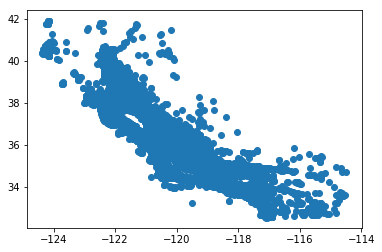

In [100]:
plt.scatter(vista_counties_emseic_merged['Station_Longitude'], vista_counties_emseic_merged['Station_Latitude'])

### Merging Aggregated EMSEIC with Aggregated Vista CA by County

In [536]:
## extract from vista stations count by county
aggregated_vista_ca_by_county  = pd.read_csv('processed_data/county_vista_stations_count.csv')
aggregated_vista_ca_by_county = aggregated_vista_ca_by_county.drop('Unnamed: 0', axis=1)
print(aggregated_vista_ca_by_county.shape)
aggregated_vista_ca_by_county.head()

(58, 17)


Closest_County_Centroid  Composting Sites  \
0                 ALAMEDA               6.0   
1                  ALPINE               0.0   
2                  AMADOR               1.0   
3                   BUTTE               5.0   
4               CALAVERAS               1.0   

   Compressed Natural Gas Fueling Station  Dairy  Digester  Feed Lot  \
0                                     0.0    0.0       0.0       0.0   
1                                     0.0    0.0       0.0       0.0   
2                                     0.0    0.0       0.0       0.0   
3                                     0.0    3.0       1.0       0.0   
4                                     0.0    0.0       0.0       0.0   

   Landfill  Liquefied Natural Gas Fueling Station  \
0      42.0                                    3.0   
1       0.0                                    0.0   
2       0.0                                    0.0   
3       1.0                                    0.0   
4       0.0                                    0.0   

   Natural Gas Processing Plants  Natural Gas Station  \
0                            0.0                 35.0   
1                            0.0                  0.0   
2                            0.0                  1.0   
3                            0.0                  9.0   
4                            0.0                  2.0   

   Natural Gas Storage Field  Oil and Gas Facility Boundary  \
0                        0.0                            8.0   
1                        0.0                            0.0   
2                        0.0                            0.0   
3                        0.0                            0.0   
4                        0.0                            0.0   

   Oil and Gas Field Boundary  Oil and Gas Well  Power Plant  Refinery  \
0                         0.0             105.0         24.0       0.0   
1                         0.0               0.0          0.0       0.0   
2                         0.0               1.0          1.0       0.0   
3                         0.0             237.0          4.0       0.0   
4                         0.0               1.0          2.0       0.0   

   Wastewater Treatment Plant  
0                         8.0  
1                         0.0  
2                         0.0  
3                         1.0  
4                         1.0

In [537]:
## merge with counties_kept: 
## add certain county info from `counties_kept` to the aggregated vista ca by county
aggregated_vista_ca_by_county_emseic_merged = pd.merge(counties_kept, aggregated_vista_ca_by_county, left_on='County', right_on='Closest_County_Centroid', how='inner')
aggregated_vista_ca_by_county_emseic_merged = aggregated_vista_ca_by_county_emseic_merged.drop(['NAME'], axis=1)


In [538]:
## merge the Vista and counties data with the EMSEIC measurements on the county 
aggregated_vista_ca_by_county_emseic_merged = pd.merge(aggregated_vista_ca_by_county_emseic_merged, cumulative_emseic, left_on='Closest_County_Centroid', right_on='AREA', how='inner')
aggregated_vista_ca_by_county_emseic_merged = aggregated_vista_ca_by_county_emseic_merged.drop('AREA', axis=1)


In [539]:
# Create a new colunmn that sums all the vista facilities
vista = ['Composting Sites',
       'Compressed Natural Gas Fueling Station', 'Dairy', 'Digester',
       'Feed Lot', 'Landfill', 'Liquefied Natural Gas Fueling Station',
       'Natural Gas Processing Plants', 'Natural Gas Station',
       'Natural Gas Storage Field', 'Oil and Gas Facility Boundary',
       'Oil and Gas Field Boundary', 'Oil and Gas Well', 'Power Plant',
       'Refinery', 'Wastewater Treatment Plant']
aggregated_vista_ca_by_county_emseic_merged['Total Facilities'] = aggregated_vista_ca_by_county_emseic_merged[vista].sum(axis=1)



In [542]:
print(aggregated_vista_ca_by_county_emseic_merged.shape)
print(aggregated_vista_ca_by_county_emseic_merged.columns)
display(aggregated_vista_ca_by_county_emseic_merged.head())

aggregated_vista_ca_by_county_emseic_merged.describe()

(58, 32)
Index(['ALAND', 'AWATER', 'geometry', 'Centroid_Latitude',
       'Centroid_Longitude', 'County', 'Closest_County_Centroid',
       'Composting Sites', 'Compressed Natural Gas Fueling Station', 'Dairy',
       'Digester', 'Feed Lot', 'Landfill',
       'Liquefied Natural Gas Fueling Station',
       'Natural Gas Processing Plants', 'Natural Gas Station',
       'Natural Gas Storage Field', 'Oil and Gas Facility Boundary',
       'Oil and Gas Field Boundary', 'Oil and Gas Well', 'Power Plant',
       'Refinery', 'Wastewater Treatment Plant', 'TOG', 'ROG', 'COT', 'NOX',
       'SOX', 'PM', 'PM10', 'PM2_5', 'Total Facilities'],
      dtype='object')


ALAND      AWATER                                           geometry  \
0  2468694587    23299110  POLYGON ((-120.65560 39.69357, -120.65554 39.6...   
1  2499183617    76073827  POLYGON ((-121.18858 38.71431, -121.18732 38.7...   
2  7084000598  2729814515  MULTIPOLYGON (((-120.58191 34.09856, -120.5822...   
3  2641820834    43806026  POLYGON ((-120.63095 38.34111, -120.63058 38.3...   
4  4773390489   945942791  MULTIPOLYGON (((-119.63631 33.27304, -119.6360...   

   Centroid_Latitude  Centroid_Longitude         County  \
0          39.576925         -120.521993         SIERRA   
1          38.450011         -121.340441     SACRAMENTO   
2          34.537057         -120.039973  SANTA BARBARA   
3          38.183900         -120.561442      CALAVERAS   
4          34.358742         -119.133143        VENTURA   

  Closest_County_Centroid  Composting Sites  \
0                  SIERRA               0.0   
1              SACRAMENTO               9.0   
2           SANTA BARBARA              11.0   
3               CALAVERAS               1.0   
4                 VENTURA              15.0   

   Compressed Natural Gas Fueling Station  Dairy  ...  \
0                                     0.0    0.0  ...   
1                                     2.0   49.0  ...   
2                                     0.0    1.0  ...   
3                                     0.0    0.0  ...   
4                                     2.0    0.0  ...   

   Wastewater Treatment Plant         TOG        ROG         COT        NOX  \
0                         1.0    2.919915   1.438554    7.805287   0.544709   
1                         3.0  217.165891  56.568897  236.465119  49.590092   
2                         2.0   68.511205  31.267111   99.080178  72.568525   
3                         1.0   11.288079   5.075024   21.024100   2.769050   
4                         7.0   87.089382  35.795815  130.170462  41.243637   

       SOX         PM       PM10      PM2_5  Total Facilities  
0   0.0216   6.645700   4.106300   0.835700             520.0  
1   0.8202  44.410467  26.478438  10.618599            1119.0  
2  12.1968  24.605434  14.567637   5.522040           24131.0  
3   0.0387   5.729100   3.691200   1.326400               7.0  
4   1.9258  28.546457  16.436724   5.845438            9906.0  

[5 rows x 32 columns]

ALAND        AWATER  Centroid_Latitude  Centroid_Longitude  \
count  5.800000e+01  5.800000e+01          58.000000           58.000000   
mean   6.956916e+09  3.528745e+08          37.837769         -120.749135   
std    8.034836e+09  4.988760e+08           2.158905            1.938400   
min    1.214557e+08  4.555000e+06          33.023604         -123.980998   
25%    2.485251e+09  4.162416e+07          36.648278         -122.034468   
50%    3.978040e+09  1.475074e+08          38.036626         -120.913601   
75%    8.948226e+09  4.752120e+08          39.244120         -119.839863   
max    5.194812e+10  2.729815e+09          41.749903         -115.355400   

       Composting Sites  Compressed Natural Gas Fueling Station       Dairy  \
count         58.000000                               58.000000   58.000000   
mean           7.413793                                2.793103   29.568966   
std           10.975306                               12.129070   73.455109   
min            0.000000                                0.000000    0.000000   
25%            1.000000                                0.000000    0.000000   
50%            4.000000                                0.000000    1.000000   
75%            9.750000                                1.000000    8.500000   
max           68.000000                               80.000000  356.000000   

        Digester   Feed Lot   Landfill  ...  Wastewater Treatment Plant  \
count  58.000000  58.000000  58.000000  ...                   58.000000   
mean    0.568966   1.241379  12.310345  ...                    2.568966   
std     1.440176   4.109511  19.902576  ...                    3.911800   
min     0.000000   0.000000   0.000000  ...                    0.000000   
25%     0.000000   0.000000   0.000000  ...                    0.000000   
50%     0.000000   0.000000   1.000000  ...                    1.000000   
75%     0.000000   0.000000  17.750000  ...                    3.000000   
max     8.000000  27.000000  94.000000  ...                   23.000000   

              TOG         ROG          COT         NOX        SOX          PM  \
count   58.000000   58.000000    58.000000   58.000000  58.000000   58.000000   
mean    96.247357   29.111420   109.147947   35.884872   1.819507   43.718071   
std    132.191101   44.152260   192.757034   54.821446   3.522601   73.782832   
min      0.651000    0.451800     1.675300    0.386966   0.003300    2.161600   
25%     15.880941    6.444974    25.754561    5.679613   0.192425   11.985521   
50%     36.159173   14.526001    49.210886   18.515088   0.410679   21.653413   
75%    134.549045   34.989553    98.971436   45.083433   1.859900   47.641627   
max    690.708203  293.000611  1339.759222  348.804533  16.714600  499.739283   

             PM10      PM2_5  Total Facilities  
count   58.000000  58.000000         58.000000  
mean    24.577883   6.755929       4044.413793  
std     41.613330   8.598363      13408.253608  
min      1.265200   0.153800          0.000000  
25%      7.026248   2.424365          9.250000  
50%     13.257623   4.156081        181.500000  
75%     24.581002   7.064605        992.500000  
max    290.422335  43.886548      73659.000000  

[8 rows x 29 columns]

In [543]:
aggregated_vista_ca_by_county_emseic_merged[['County', 'Closest_County_Centroid', 'Total Facilities']]

County Closest_County_Centroid  Total Facilities
0            SIERRA                  SIERRA             520.0
1        SACRAMENTO              SACRAMENTO            1119.0
2     SANTA BARBARA           SANTA BARBARA           24131.0
3         CALAVERAS               CALAVERAS               7.0
4           VENTURA                 VENTURA            9906.0
5       LOS ANGELES             LOS ANGELES           21553.0
6            SONOMA                  SONOMA              62.0
7             KINGS                   KINGS           73659.0
8         SAN DIEGO               SAN DIEGO             279.0
9            PLACER                  PLACER               1.0
10    SAN FRANCISCO           SAN FRANCISCO               0.0
11            MARIN                   MARIN             166.0
12         MARIPOSA                MARIPOSA               5.0
13           LASSEN                  LASSEN              15.0
14             NAPA                    NAPA              53.0
15           SHASTA                  SHASTA              23.0
16         MONTEREY                MONTEREY            3624.0
17          TRINITY                 TRINITY               1.0
18        MENDOCINO               MENDOCINO              23.0
19             INYO                    INYO              10.0
20             MONO                    MONO               9.0
21         TUOLUMNE                TUOLUMNE               0.0
22           SOLANO                  SOLANO            2019.0
23   SAN BERNARDINO          SAN BERNARDINO              99.0
24     CONTRA COSTA            CONTRA COSTA             859.0
25           ALPINE                  ALPINE               0.0
26        EL DORADO               EL DORADO               2.0
27             YOLO                    YOLO            1296.0
28             YUBA                    YUBA              21.0
29       SAN BENITO              SAN BENITO             510.0
30         HUMBOLDT                HUMBOLDT             297.0
31        RIVERSIDE               RIVERSIDE              64.0
32             KERN                    KERN           66136.0
33           COLUSA                  COLUSA             901.0
34        DEL NORTE               DEL NORTE              13.0
35            MODOC                   MODOC               9.0
36           FRESNO                  FRESNO            1023.0
37           MADERA                  MADERA              52.0
38      SANTA CLARA             SANTA CLARA             197.0
39           TEHAMA                  TEHAMA             512.0
40      SAN JOAQUIN             SAN JOAQUIN            1329.0
41          ALAMEDA                 ALAMEDA             231.0
42           NEVADA                  NEVADA               0.0
43            BUTTE                   BUTTE             261.0
44           MERCED                  MERCED             792.0
45           TULARE                  TULARE             650.0
46       STANISLAUS              STANISLAUS             622.0
47           ORANGE                  ORANGE           14391.0
48         IMPERIAL                IMPERIAL             111.0
49           SUTTER                  SUTTER            1878.0
50           AMADOR                  AMADOR               4.0
51             LAKE                    LAKE               5.0
52           PLUMAS                  PLUMAS               4.0
53        SAN MATEO               SAN MATEO             278.0
54         SISKIYOU                SISKIYOU               6.0
55       SANTA CRUZ              SANTA CRUZ             159.0
56            GLENN                   GLENN            1142.0
57  SAN LUIS OBISPO         SAN LUIS OBISPO            3537.0

#### Saving Combined and Aggregated Vista CA, Counties, and EMSEIC dataframe to CSV


In [544]:
aggregated_vista_ca_by_county_emseic_merged.to_csv('processed_data/aggregated_vista_ca_by_county_emseic_merged.csv')
print('Saved!')


Saved!


### Plots

In [240]:
aggregated_vista_ca_by_county_emseic_merged.columns

Index(['Closest_County_Centroid', 'Composting Sites',
       'Compressed Natural Gas Fueling Station', 'Dairy', 'Digester',
       'Feed Lot', 'Landfill', 'Liquefied Natural Gas Fueling Station',
       'Natural Gas Processing Plants', 'Natural Gas Station',
       'Natural Gas Storage Field', 'Oil and Gas Facility Boundary',
       'Oil and Gas Field Boundary', 'Oil and Gas Well', 'Power Plant',
       'Refinery', 'Wastewater Treatment Plant', 'ALAND', 'AWATER', 'geometry',
       'Centroid_Latitude', 'Centroid_Longitude', 'TOG', 'ROG', 'COT', 'NOX',
       'SOX', 'PM', 'PM10', 'PM2_5', 'Total Facilities'],
      dtype='object')

#### Vista Facilities Count by County and {col} in Tons Per Day

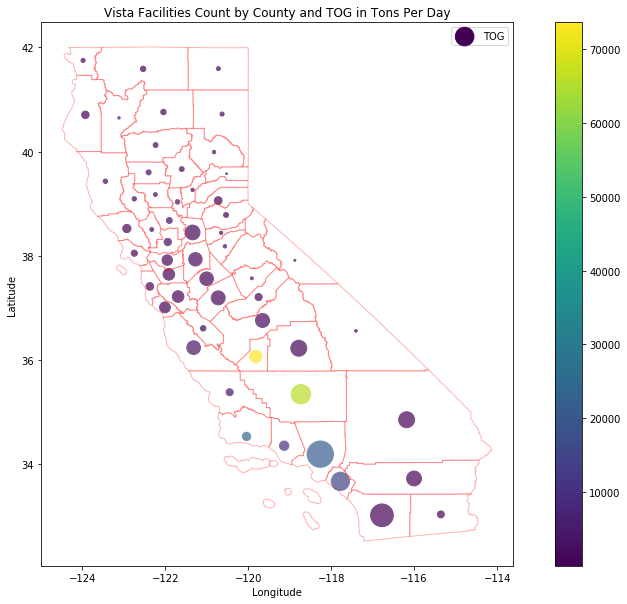

Each dot is the centroid of a county. The size of the circle corresponds to the total organic emissions for that county in 2012 as measured by the Air Resource Board of California.  The color  of the circle corresponds to the number of Vista Facilities that are nearest to the county centroid.


In [231]:
col = 'TOG'
fig, ax = plt.subplots(figsize=(15,10))

plt.scatter(aggregated_vista_ca_by_county_emseic_merged['Centroid_Longitude'], 
            aggregated_vista_ca_by_county_emseic_merged['Centroid_Latitude'], 
            s=aggregated_vista_ca_by_county_emseic_merged[col],
            c=aggregated_vista_ca_by_county_emseic_merged['Total Facilities'],
            label=col
           )

counties_wgs84.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3)

ax.axis('on') # You can optionally omit the axes

# Show a title
ax.set_title('Vista Facilities Count by County and {col} in Tons Per Day'.format(col=col))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.legend()
plt.show()

print('Each dot is the centroid of a county. The size of the circle corresponds to the total organic emissions for that county in 2012 as measured by the Air Resource Board of California.  The color  of the circle corresponds to the number of Vista Facilities that are nearest to the county centroid.')




#### Correlations

In [288]:
# sns.scatterplot(data=aggregated_vista_ca_by_county_emseic_merged, x='Oil and Gas Field Boundary', y='PM')
'''
_data: a datframe to create scatter plots
y: the target variable
cols: the columns that you want to create a scatterplot with y

Plots all the scatter plots between y and each indivudal column specified in `cols`
'''
def standard_bulk_scatter_plot(_data, cols, y):
    n = len(cols) ## this determines how many plots we need to make
    
    fig = plt.figure(figsize=(20, 20))
    
    rows = round(n / 2) ## this determines how many rows of 2 we will plot
    gs = fig.add_gridspec(rows, 2)
    
    switch = 0 ## flips betwen left and right plot on each row
    for i in range(n):
        c = cols[i]
        r = i // 2 ## the current row of this iteration
        ax1 = fig.add_subplot(gs[r, switch])
        
        ## scatterplot
#         print(c, y)
        sns.scatterplot(data=_data, x=c, y=y)
        
        ## chart design
        plt.xlabel(c + " Count")
        plt.ylabel(y + " in Tons Per Day")
        plt.title('{y} Measurement as Result of Number of {c}'.format(y=y, c=c))
        
        plt.tight_layout()
        
        ## move to other plot
        if switch == 0:
            switch = 1
        else:
            switch = 0

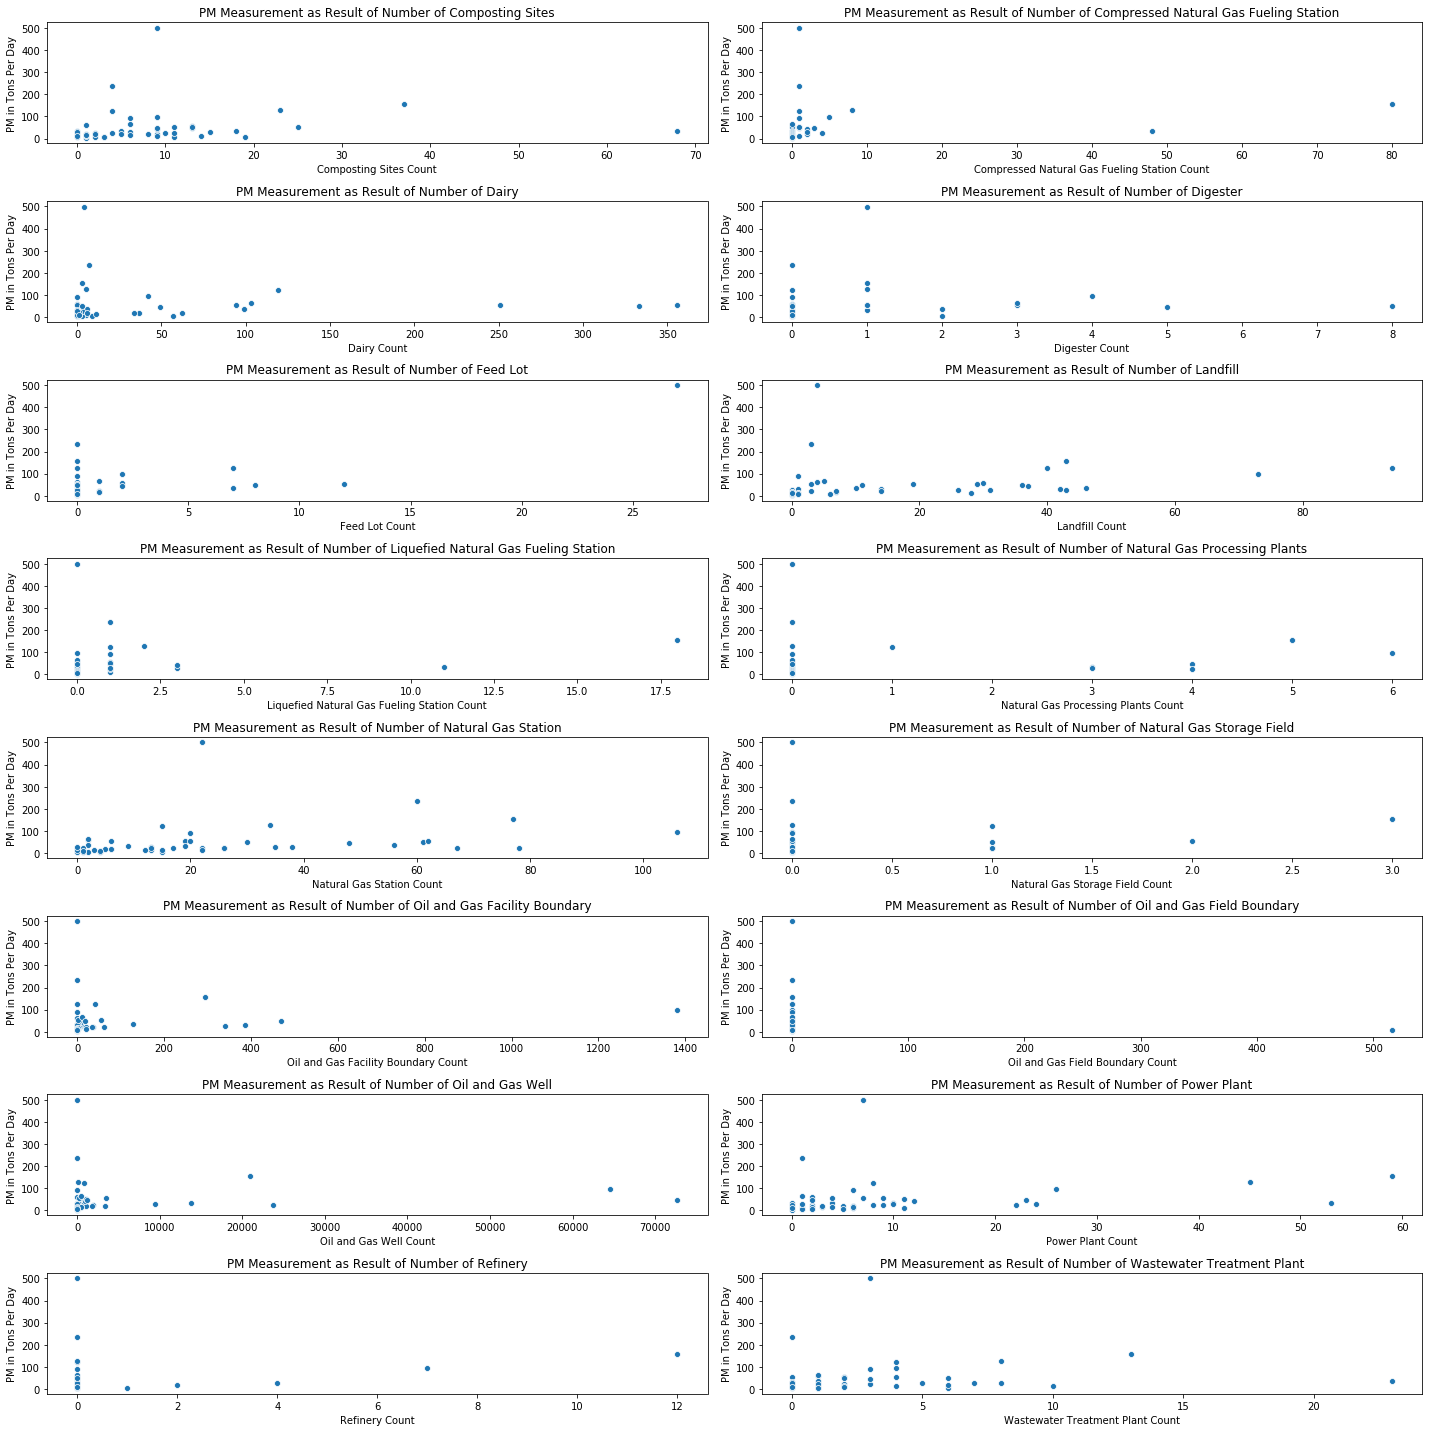

In [289]:
standard_bulk_scatter_plot(aggregated_vista_ca_by_county_emseic_merged, vista, 'PM')


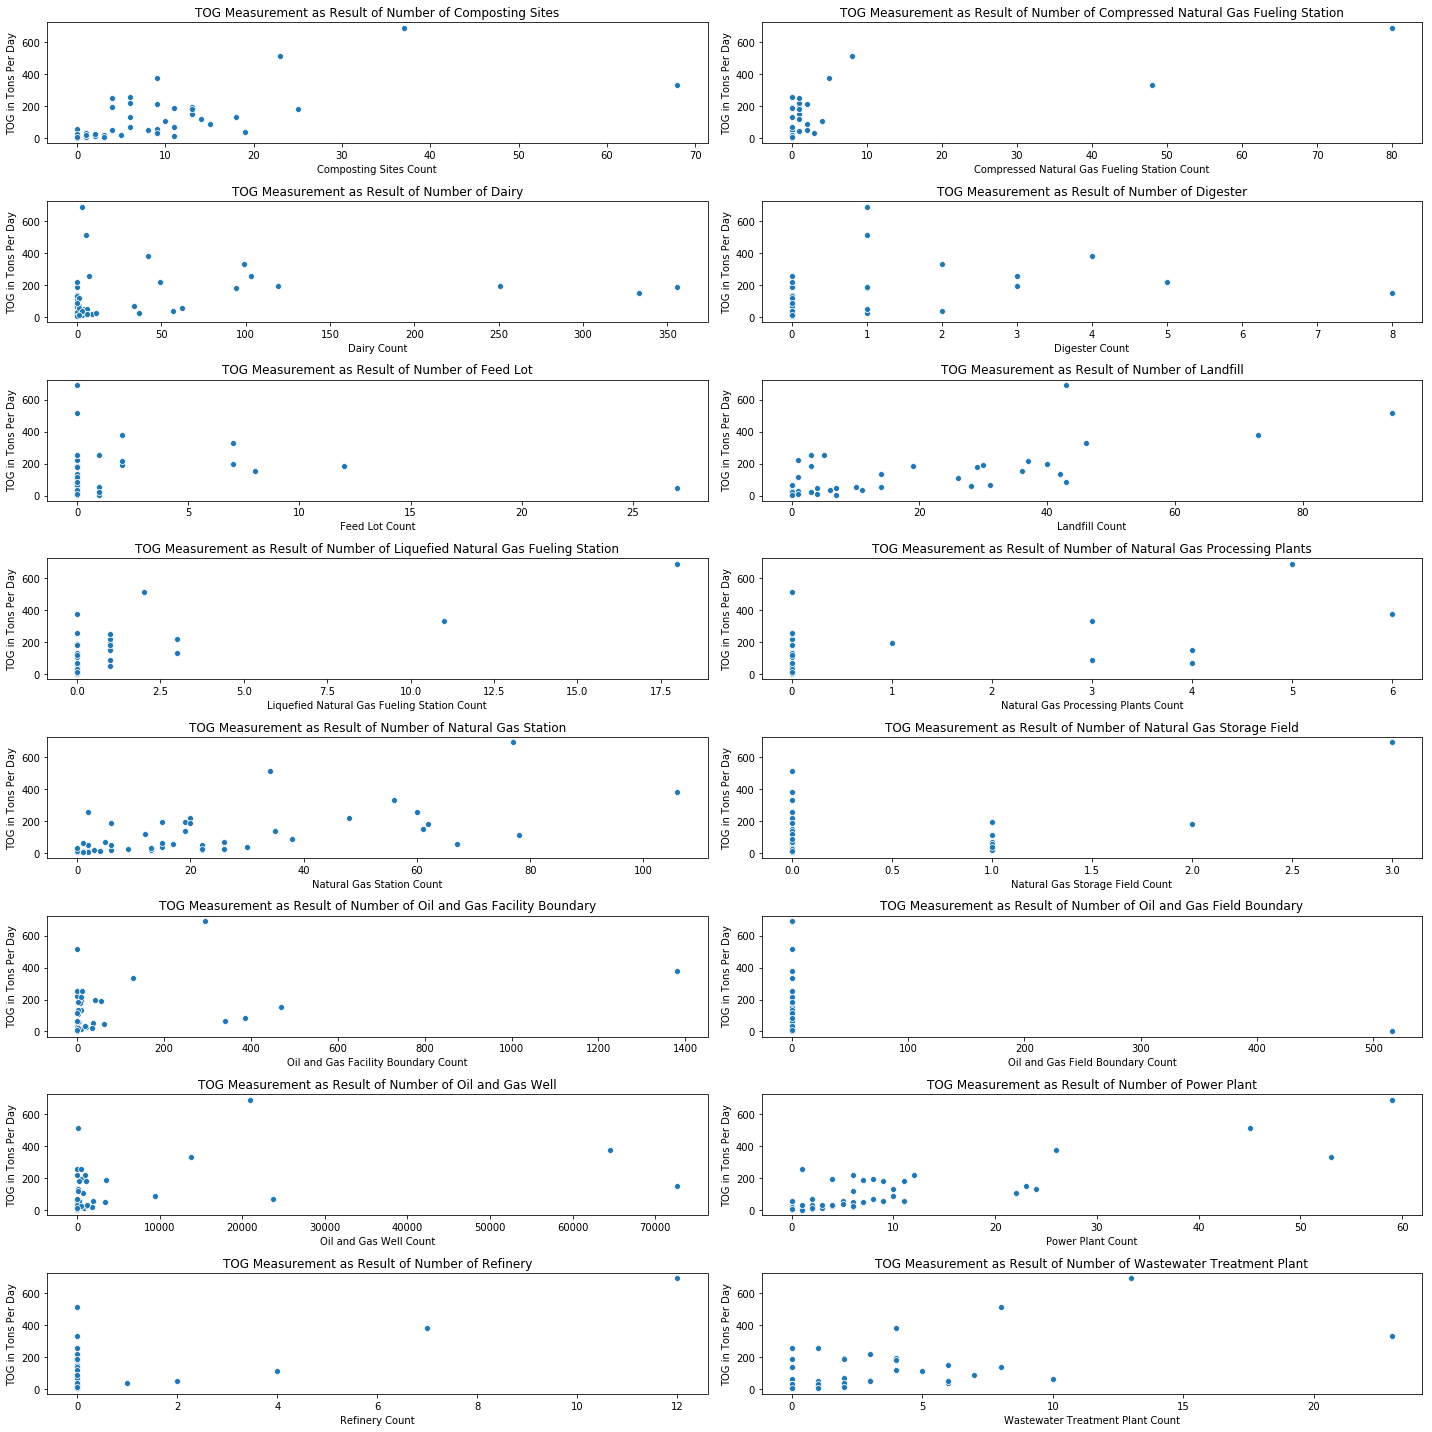

In [290]:
standard_bulk_scatter_plot(aggregated_vista_ca_by_county_emseic_merged, vista, 'TOG')


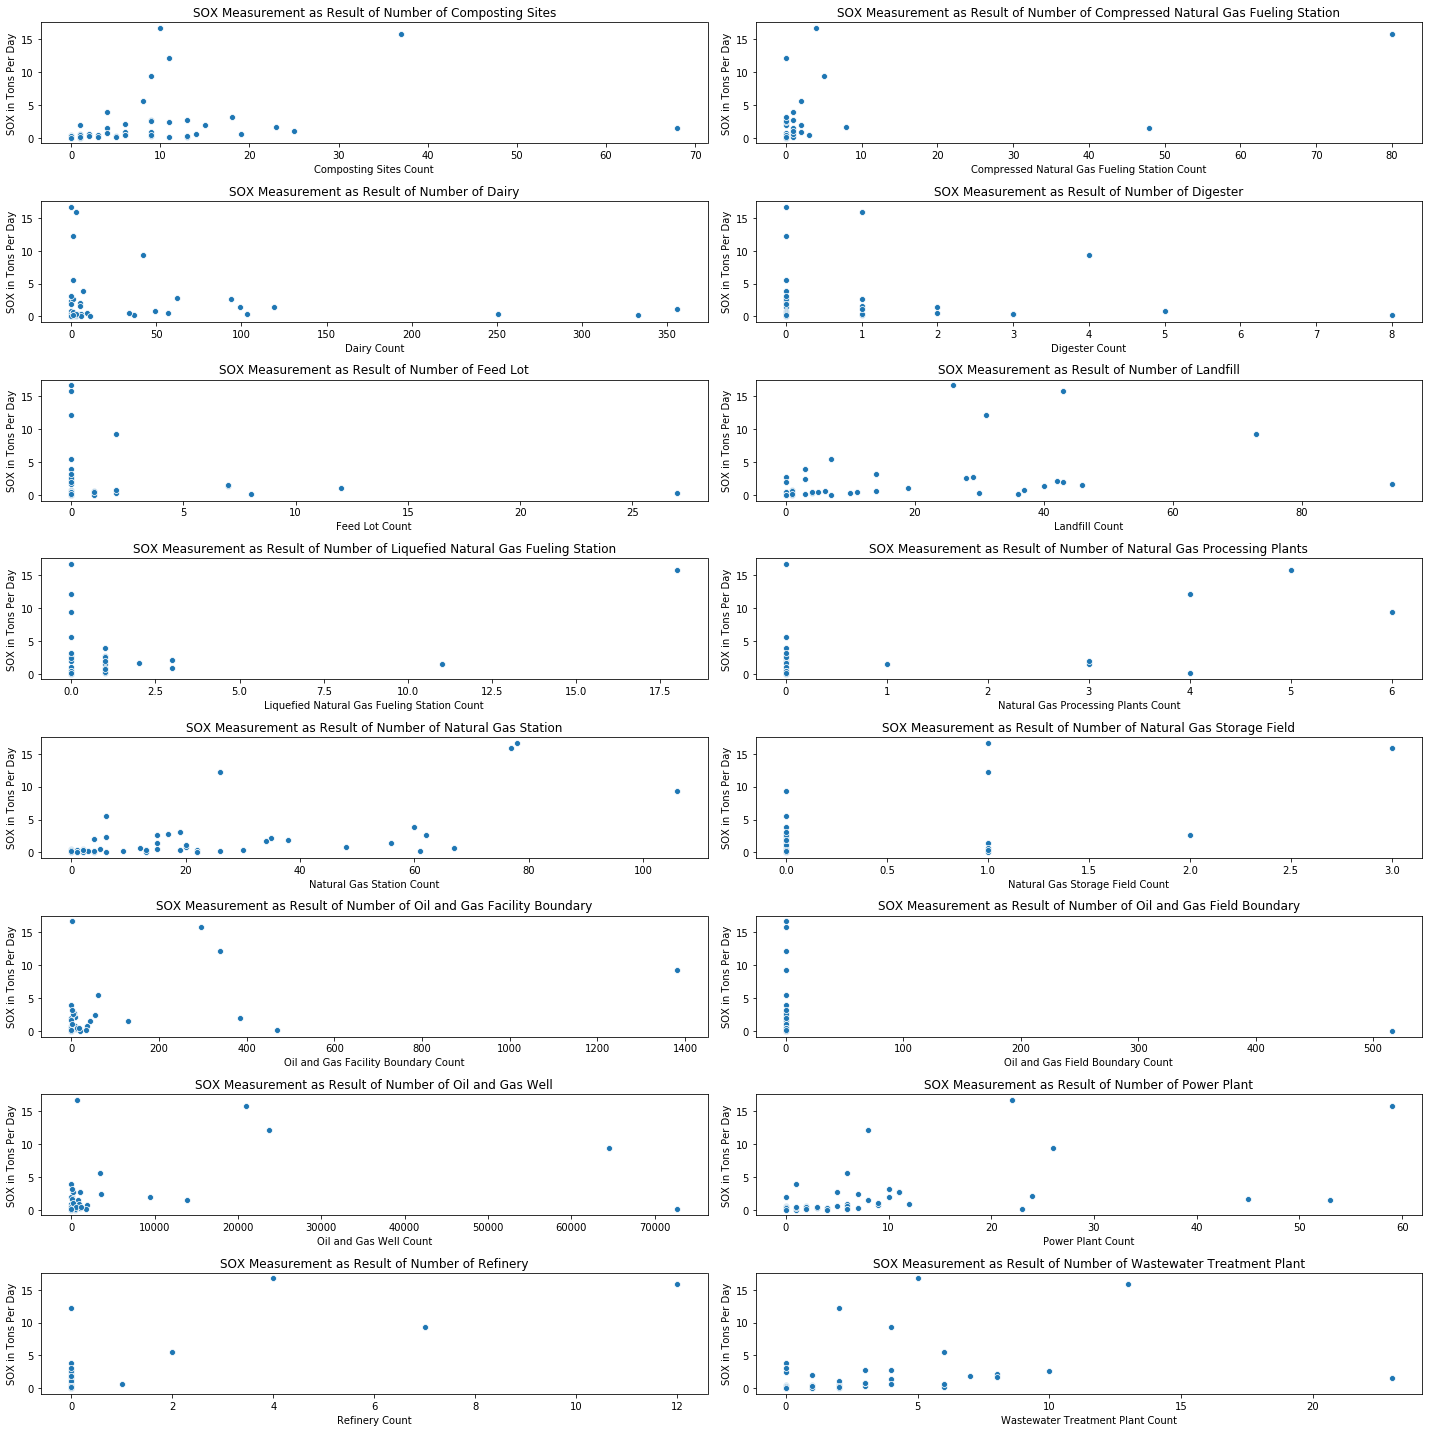

In [294]:
standard_bulk_scatter_plot(aggregated_vista_ca_by_county_emseic_merged, vista, 'SOX')


## Geographic plots of the California Vista data

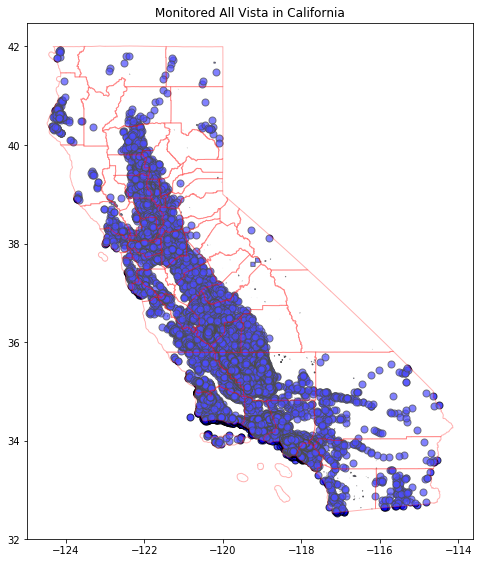

In [96]:
fig, ax = plt.subplots(figsize=(8,12))

combined_vista_ca.plot(ax=ax, color = 'blue', edgecolor='black', alpha = .7, markersize = 50)


counties_wgs84.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3)

ax.axis('on') # You can optionally omit the axes

# Show a title
ax.set_title('Monitored All Vista in California')

plt.show()

In [101]:
!ls data/NACP_Vista_CA_CH4_Inventory_1726/comp

NACP_Vista_CA_CH4_Inventory.pdf
Vista_CA_Composting_Sites.kmz
Vista_CA_Dairies.kmz
Vista_CA_Digesters.kmz
Vista_CA_Feed_Lots.kmz
Vista_CA_Landfills.kmz
Vista_CA_NG_Fueling_Stations.kmz
Vista_CA_NG_Stations.kmz
Vista_CA_Oil_and_Gas_Facilities.kmz
Vista_CA_Oil_and_Gas_Field_Boundaries.kmz
Vista_CA_Oil_and_Gas_Wells.kmz
Vista_CA_Power_Plants.kmz
Vista_CA_Processing_Plants.kmz
Vista_CA_Refineries.kmz
Vista_CA_Storage_Fields.kmz
Vista_CA_Wastewater_Treatment_Plants.kmz



Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Composting_Sites/Vista_CA_Composting_Sites.shp
  Geomtry types
    -Polygon

Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Dairies/Vista_CA_Dairies.shp
  Geomtry types
    -Point

Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Digesters/Vista_CA_Digesters.shp
  Geomtry types
    -MultiPolygon
    -Polygon

Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Feed_Lots/Vista_CA_Feed_Lots.shp
  Geomtry types
    -Point

Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_Landfills/Vista_CA_Landfills.shp
  Geomtry types
    -Polygon
    -MultiPolygon

Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_NG_Fueling_Stations/Vista_CA_NG_Fueling_Stations.shp
  Geomtry types
    -Polygon
    -MultiPolygon

Opening : data/NACP_Vista_CA_CH4_Inventory_1726/data/Vista_CA_NG_Stations/Vista_CA_NG_Stations.shp
  Geomtry types
    -Point

Opening : data/NACP_Vista_CA_CH4_Inventory

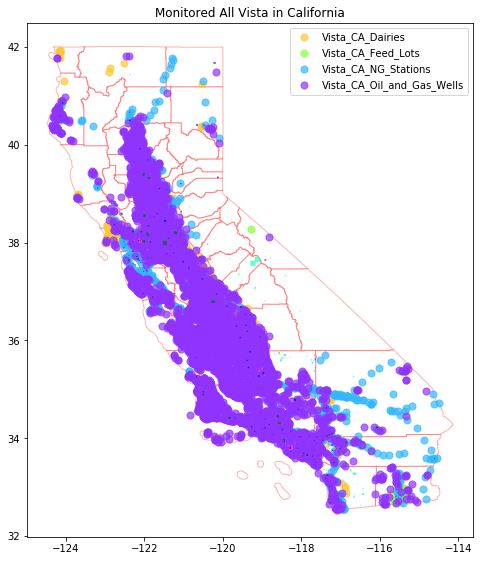

In [122]:
fig, ax = plt.subplots(figsize=(8,12))
counties_wgs84.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3)

colors = ["#FF5733", 
          "#FFC733", 
          "#FFF333", 
          "#8AFF33", 
          "#33FFBB",
          
          "#33FFF9",
          "#33B8FF",
          "#336BFF",
          "#6B33FF",
          "#9033FF",
          
          "#BB33FF",
          "#E333FF",
          "#FF33F0",
          "#0B6C1D",
          "#08286C"
          
         ]

i=0
for vca_source in vista_ca:
    
    extracted = extract_gpd("data/NACP_Vista_CA_CH4_Inventory_1726/data", vca_source)
    extracted_wgs84 = extracted.to_crs(epsg=4326, inplace=False)
    assert extracted_wgs84.crs == 'epsg:4326'
    
    
    extracted_wgs84.plot(ax=ax, color = colors[i], edgecolor=colors[i], alpha = .7, markersize = 50, label=vca_source)
    i+=1

plt.legend()

ax.axis('on') # You can optionally omit the axes

# Show a title
ax.set_title('Monitored All Vista in California')

plt.show()

In [304]:
garbo = pd.read_csv('processed_data/combined_vista_ca.csv')

garbo.head()

/Library/Python/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0  Latitude  Longitude                               VistaIPCC  \
0           0  37.72799 -120.89865  4B Biological Treatment of Solid Waste   
1           1  33.70999 -117.32864  4B Biological Treatment of Solid Waste   
2           2  38.01667 -122.13333  4B Biological Treatment of Solid Waste   
3           3  34.03281 -118.35424  4B Biological Treatment of Solid Waste   
4           4  34.44517 -117.29007  4B Biological Treatment of Solid Waste   

                                  VistaName        VistaSType   Vista_ID  \
0                                3D Ag, LLC  Composting Sites  CMP000001   
1                    A. Lua Recycling, Inc.  Composting Sites  CMP000002   
2          Acme Composting Compost Facility  Composting Sites  CMP000003   
3                       Adams Garden Supply  Composting Sites  CMP000004   
4  Advance Disposal Center for the Environm  Composting Sites  CMP000005   

   Vista_Date State                City      Source  \
0  2019-08-20    CA             Oakdale  CalRecycle   
1  2019-08-20    CA       Lake Elsinore  CalRecycle   
2  2019-08-20    CA            Martinez  CalRecycle   
3  2019-08-20    CA  Los Angeles (City)  CalRecycle   
4  2019-08-20    CA            Hesperia  CalRecycle   

                                            geometry County  \
0  POLYGON ((-120.89865 37.7280800971221, -120.89...    NaN   
1  POLYGON ((-117.32864 33.71008015737547, -117.3...    NaN   
2  POLYGON ((-122.13333 38.01676009269305, -122.1...    NaN   
3  POLYGON ((-118.35424 34.03290015264501, -118.3...    NaN   
4  POLYGON ((-117.29007 34.44526014657136, -117.2...    NaN   

   Station_Longitude  Station_Latitude  
0         -120.89865          37.72799  
1         -117.32864          33.70999  
2         -122.13333          38.01667  
3         -118.35424          34.03281  
4         -117.29007          34.44517

In [300]:
!ls processed_data

aggregated_vista_ca_by_county_emseic_merged.csv
cleaned_combined_vista_ca.csv
combined_vista_ca.csv
county_vista_stations_count.csv


In [311]:
sorted(garbo.County.fillna('NA').unique())
garbo[garbo['County']=='San Francisco']

Unnamed: 0   Latitude   Longitude                VistaIPCC  \
3428         256  37.823042 -122.368239  1B2 Oil and Natural Gas   
3948         776  37.737072 -122.377341  1B2 Oil and Natural Gas   
4269        1097  37.755665 -122.386612  1B2 Oil and Natural Gas   

                       VistaName           VistaSType   Vista_ID  Vista_Date  \
3428                Avenue H-5Th  Natural Gas Station  COM000573  2019-08-20   
3948               Hunters Point  Natural Gas Station  COM000222  2019-08-20   
4269  San Francisco Gas Load Ctr  Natural Gas Station  COM000415  2019-08-20   

     State City Source                                          geometry  \
3428    CA  NaN    CEC  POINT Z (-122.3682393068945 37.82304210224592 0)   
3948    CA  NaN    CEC  POINT Z (-122.3773504650777 37.73706999690189 0)   
4269    CA  NaN    CEC  POINT Z (-122.3866122665103 37.75566480160461 0)   

             County  Station_Longitude  Station_Latitude  
3428  San Francisco        -122.368239         37.823042  
3948  San Francisco        -122.377341         37.737072  
4269  San Francisco        -122.386612         37.755665

In [318]:
displaced_vista_ca_stations[displaced_vista_ca_stations['County']=='San Francisco']

Latitude       Longitude                VistaIPCC  \
256   37.8230421022  -122.368239307  1B2 Oil and Natural Gas   
776   37.7370717091  -122.377341365  1B2 Oil and Natural Gas   
1097  37.7556648016  -122.386612267  1B2 Oil and Natural Gas   

                       VistaName           VistaSType   Vista_ID  Vista_Date  \
256                 Avenue H-5Th  Natural Gas Station  COM000573  2019-08-20   
776                Hunters Point  Natural Gas Station  COM000222  2019-08-20   
1097  San Francisco Gas Load Ctr  Natural Gas Station  COM000415  2019-08-20   

     State City Source                               geometry         County  \
256     CA         CEC  POINT Z (-122.36824 37.82304 0.00000)  San Francisco   
776     CA         CEC  POINT Z (-122.37735 37.73707 0.00000)  San Francisco   
1097    CA         CEC  POINT Z (-122.38661 37.75566 0.00000)  San Francisco   

      Station_Longitude  Station_Latitude Closest_County_Centroid  
256         -122.368239         37.823042               San Mateo  
776         -122.377341         37.737072               San Mateo  
1097        -122.386612         37.755665               San Mateo

In [319]:
displaced_vista_ca_stations[displaced_vista_ca_stations['County']=='Nevada']

Latitude       Longitude                VistaIPCC     VistaName  \
73  39.2227999955  -121.091465538  1B2 Oil and Natural Gas  Grass Valley   

             VistaSType   Vista_ID  Vista_Date State City Source  \
73  Natural Gas Station  COM000755  2019-08-20    CA         CEC   

                                 geometry  County  Station_Longitude  \
73  POINT Z (-121.09147 39.22280 0.00000)  Nevada        -121.091466   

    Station_Latitude Closest_County_Centroid  
73           39.2228                    Yuba

In [320]:
displaced_vista_ca_stations[displaced_vista_ca_stations['County']=='Alpine']

Empty GeoDataFrame
Columns: [Latitude, Longitude, VistaIPCC, VistaName, VistaSType, Vista_ID, Vista_Date, State, City, Source, geometry, County, Station_Longitude, Station_Latitude, Closest_County_Centroid]
Index: []

In [322]:
displaced_vista_ca_stations[displaced_vista_ca_stations['County']=='Tuolumne']

Empty GeoDataFrame
Columns: [Latitude, Longitude, VistaIPCC, VistaName, VistaSType, Vista_ID, Vista_Date, State, City, Source, geometry, County, Station_Longitude, Station_Latitude, Closest_County_Centroid]
Index: []

In [324]:
counties_wgs84

STATEFP COUNTYFP  COUNTYNS  GEOID             NAME                NAMELSAD  \
0       06      091  00277310  06091           Sierra           Sierra County   
1       06      067  00277298  06067       Sacramento       Sacramento County   
2       06      083  00277306  06083    Santa Barbara    Santa Barbara County   
3       06      009  01675885  06009        Calaveras        Calaveras County   
4       06      111  00277320  06111          Ventura          Ventura County   
5       06      037  00277283  06037      Los Angeles      Los Angeles County   
6       06      097  01657246  06097           Sonoma           Sonoma County   
7       06      031  00277280  06031            Kings            Kings County   
8       06      073  00277301  06073        San Diego        San Diego County   
9       06      061  00277295  06061           Placer           Placer County   
10      06      075  00277302  06075    San Francisco    San Francisco County   
11      06      041  00277285  06041            Marin            Marin County   
12      06      043  00277286  06043         Mariposa         Mariposa County   
13      06      035  01693324  06035           Lassen           Lassen County   
14      06      055  00277292  06055             Napa             Napa County   
15      06      089  01682610  06089           Shasta           Shasta County   
16      06      053  00277291  06053         Monterey         Monterey County   
17      06      105  00277317  06105          Trinity          Trinity County   
18      06      045  00277287  06045        Mendocino        Mendocino County   
19      06      027  01804637  06027             Inyo             Inyo County   
20      06      051  00277290  06051             Mono             Mono County   
21      06      109  00277319  06109         Tuolumne         Tuolumne County   
22      06      095  00277312  06095           Solano           Solano County   
23      06      071  00277300  06071   San Bernardino   San Bernardino County   
24      06      013  01675903  06013     Contra Costa     Contra Costa County   
25      06      003  01675840  06003           Alpine           Alpine County   
26      06      017  00277273  06017        El Dorado        El Dorado County   
27      06      113  00277321  06113             Yolo             Yolo County   
28      06      115  00277322  06115             Yuba             Yuba County   
29      06      069  00277299  06069       San Benito       San Benito County   
30      06      023  01681908  06023         Humboldt         Humboldt County   
31      06      065  00277297  06065        Riverside        Riverside County   
32      06      029  02054176  06029             Kern             Kern County   
33      06      011  01675902  06011           Colusa           Colusa County   
34      06      015  01682074  06015        Del Norte        Del Norte County   
35      06      049  00277289  06049            Modoc            Modoc County   
36      06      019  00277274  06019           Fresno           Fresno County   
37      06      039  00277284  06039           Madera           Madera County   
38      06      085  00277307  06085      Santa Clara      Santa Clara County   
39      06      103  01692767  06103           Tehama           Tehama County   
40      06      077  00277303  06077      San Joaquin      San Joaquin County   
41      06      001  01675839  06001          Alameda          Alameda County   
42      06      057  01682927  06057           Nevada           Nevada County   
43      06      007  01675842  06007            Butte            Butte County   
44      06      047  00277288  06047           Merced           Merced County   
45      06      107  00277318  06107           Tulare           Tulare County   
46      06      099  00277314  06099       Stanislaus       Stanislaus County   
47      06      059  00277294  06059           Orange           Orange County   
48      06      025  00277277  060

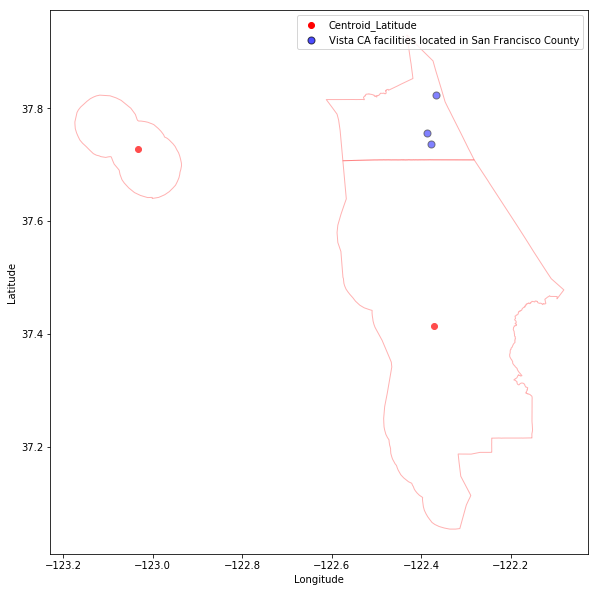

In [339]:
## The centroids of each county


fig, ax = plt.subplots(figsize=(15,10))
sf_sm_counties_wgs84 = counties_wgs84[(counties_wgs84['NAME'] == 'San Francisco') | (counties_wgs84['NAME'] == 'San Mateo')]
plt.scatter(sf_sm_counties_wgs84['Centroid_Longitude'], sf_sm_counties_wgs84['Centroid_Latitude'], c='red')

displaced_vista_ca_stations[displaced_vista_ca_stations['County']=='San Francisco'].plot(ax=ax, color = 'blue', edgecolor='black', alpha = .7, markersize = 50, label='Vista CA facilities located in San Francisco County')

sf_sm_counties_wgs84.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3)

ax.axis('on') # You can optionally omit the axes


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()




## References and Datasources

1. California Counties: https://catalog.data.gov/dataset/tiger-line-shapefile-2016-state-california-current-county-subdivision-state-based
2. Vista CA: https://daac.ornl.gov/NACP/guides/NACP_Vista_CA_CH4_Inventory.html
3. California Emissions by Sector and County in 2012: https://ww3.arb.ca.gov/ei/maps/2017statemap/cntymap.htm


In [97]:
aggregated_vista_ca_by_county_emseic_merged[aggregated_vista_ca_by_county_emseic_merged['Total Facilities']==0].head()

NameError: name 'aggregated_vista_ca_by_county_emseic_merged' is not defined

In [240]:
!ls processed_data
aggregated_vista_ca_by_county_emseic_merged = pd.read_csv('processed_data/aggregated_vista_ca_by_county_emseic_merged.csv')
print(aggregated_vista_ca_by_county_emseic_merged.shape)
aggregated_vista_ca_by_county_emseic_merged.head()

aggregated_vista_ca_by_county_emseic_merged.csv
all_counties_historical_ARB_aggregated_emseic.csv
ca_vista_counties_emseic_evs_pop_merged.csv
cleaned_combined_vista_ca.csv
combined_vista_ca.csv
county_vista_stations_count.csv
(58, 33)


Unnamed: 0       ALAND      AWATER  \
0           0  2468694587    23299110   
1           1  2499183617    76073827   
2           2  7084000598  2729814515   
3           3  2641820834    43806026   
4           4  4773390489   945942791   

                                            geometry  Centroid_Latitude  \
0  POLYGON ((-120.6555981820125 39.69356523820564...          39.576925   
1  POLYGON ((-121.1885841398944 38.71431311442083...          38.450011   
2  MULTIPOLYGON (((-120.5819095703916 34.09856172...          34.537057   
3  POLYGON ((-120.6309460064869 38.34110512435024...          38.183900   
4  MULTIPOLYGON (((-119.6363143545649 33.27304469...          34.358742   

   Centroid_Longitude         County Closest_County_Centroid  \
0         -120.521993         SIERRA                  SIERRA   
1         -121.340441     SACRAMENTO              SACRAMENTO   
2         -120.039973  SANTA BARBARA           SANTA BARBARA   
3         -120.561442      CALAVERAS               CALAVERAS   
4         -119.133143        VENTURA                 VENTURA   

   Composting Sites  Compressed Natural Gas Fueling Station  ...  \
0               0.0                                     0.0  ...   
1               9.0                                     2.0  ...   
2              11.0                                     0.0  ...   
3               1.0                                     0.0  ...   
4              15.0                                     2.0  ...   

   Wastewater Treatment Plant         TOG        ROG         COT        NOX  \
0                         1.0    2.919915   1.438554    7.805287   0.544709   
1                         3.0  217.165891  56.568897  236.465119  49.590092   
2                         2.0   68.511205  31.267111   99.080178  72.568525   
3                         1.0   11.288079   5.075024   21.024100   2.769050   
4                         7.0   87.089382  35.795815  130.170462  41.243637   

       SOX         PM       PM10      PM2_5  Total Facilities  
0   0.0216   6.645700   4.106300   0.835700             520.0  
1   0.8202  44.410467  26.478438  10.618599            1119.0  
2  12.1968  24.605434  14.567637   5.522040           24131.0  
3   0.0387   5.729100   3.691200   1.326400               7.0  
4   1.9258  28.546457  16.436724   5.845438            9906.0  

[5 rows x 33 columns]

In [241]:
# YOUR CODE HERE
fn  = 'data/EV_Chargers.xlsx'
xl  = pd.ExcelFile(fn)
print(xl.sheet_names) # display a list of the sheets in the spreadsheet

df0 = xl.parse(xl.sheet_names[1])
df0['AREA'] = df0['County'].apply(lambda x: x.upper())
df0.head()

['Info', 'EV Chargers', 'population']


County  Public Level 1  Shared Private Level 1  Public Level 2  \
0    Alameda              14                      14            1288   
1     Alpine               0                       0              12   
2     Amador               0                       0              23   
3      Butte               6                       0              32   
4  Calaveras               0                       0               7   

   Shared Private Level 2  Public DC Fast  Shared Private DC Fast  Total  \
0                    1460             268                      38   3082   
1                       1               0                       0     13   
2                       7               0                       0     30   
3                      20              16                       2     76   
4                       0               0                       0      7   

   Total Public EV Stations       AREA  
0                      1570    ALAMEDA  
1                        12     ALPINE  
2                        23     AMADOR  
3                        54      BUTTE  
4                         7  CALAVERAS

In [242]:
df0_merged = pd.merge(aggregated_vista_ca_by_county_emseic_merged, df0, left_on='County', right_on='AREA', how='inner')
df0_merged.head()

Unnamed: 0       ALAND      AWATER  \
0           0  2468694587    23299110   
1           1  2499183617    76073827   
2           2  7084000598  2729814515   
3           3  2641820834    43806026   
4           4  4773390489   945942791   

                                            geometry  Centroid_Latitude  \
0  POLYGON ((-120.6555981820125 39.69356523820564...          39.576925   
1  POLYGON ((-121.1885841398944 38.71431311442083...          38.450011   
2  MULTIPOLYGON (((-120.5819095703916 34.09856172...          34.537057   
3  POLYGON ((-120.6309460064869 38.34110512435024...          38.183900   
4  MULTIPOLYGON (((-119.6363143545649 33.27304469...          34.358742   

   Centroid_Longitude       County_x Closest_County_Centroid  \
0         -120.521993         SIERRA                  SIERRA   
1         -121.340441     SACRAMENTO              SACRAMENTO   
2         -120.039973  SANTA BARBARA           SANTA BARBARA   
3         -120.561442      CALAVERAS               CALAVERAS   
4         -119.133143        VENTURA                 VENTURA   

   Composting Sites  Compressed Natural Gas Fueling Station  ...  \
0               0.0                                     0.0  ...   
1               9.0                                     2.0  ...   
2              11.0                                     0.0  ...   
3               1.0                                     0.0  ...   
4              15.0                                     2.0  ...   

        County_y  Public Level 1  Shared Private Level 1  Public Level 2  \
0         Sierra               0                       0               1   
1     Sacramento              83                       6             688   
2  Santa Barbara              11                       0             241   
3      Calaveras               0                       0               7   
4        Ventura               6                       0             395   

   Shared Private Level 2  Public DC Fast  Shared Private DC Fast  Total  \
0                       0               0                       0      1   
1                     802             179                       7   1765   
2                     167              39                       3    461   
3                       0               0                       0      7   
4                     326             122                      19    868   

   Total Public EV Stations           AREA  
0                         1         SIERRA  
1                       950     SACRAMENTO  
2                       291  SANTA BARBARA  
3                         7      CALAVERAS  
4                       523        VENTURA  

[5 rows x 43 columns]

In [243]:
df1 = xl.parse(xl.sheet_names[2])
df1['AREA'] = df1['County'].apply(lambda x: x.split(' County')[0].upper())
df1.head()

Rank                 County  Population            AREA
0     1     Los Angeles County    10039107     LOS ANGELES
1     2       San Diego County     3338330       SAN DIEGO
2     3          Orange County     3175692          ORANGE
3     4       Riverside County     2470546       RIVERSIDE
4     5  San Bernardino County     2180085  SAN BERNARDINO

In [244]:
df0_merged = pd.merge(df0_merged, df1, left_on='AREA', right_on='AREA', how='inner')
df0_merged['COT per capita'] = df0_merged['COT']/df0_merged['Population']
df0_merged = df0_merged.drop(['Unnamed: 0', 'County_y'], axis=1)


In [245]:
print(df0_merged.columns)
df0_merged.head()

df0_merged.to_csv('processed_data/ca_vista_counties_emseic_evs_pop_merged.csv')

Index(['ALAND', 'AWATER', 'geometry', 'Centroid_Latitude',
       'Centroid_Longitude', 'County_x', 'Closest_County_Centroid',
       'Composting Sites', 'Compressed Natural Gas Fueling Station', 'Dairy',
       'Digester', 'Feed Lot', 'Landfill',
       'Liquefied Natural Gas Fueling Station',
       'Natural Gas Processing Plants', 'Natural Gas Station',
       'Natural Gas Storage Field', 'Oil and Gas Facility Boundary',
       'Oil and Gas Field Boundary', 'Oil and Gas Well', 'Power Plant',
       'Refinery', 'Wastewater Treatment Plant', 'TOG', 'ROG', 'COT', 'NOX',
       'SOX', 'PM', 'PM10', 'PM2_5', 'Total Facilities', 'Public Level 1',
       'Shared Private Level 1', 'Public Level 2', 'Shared Private Level 2',
       'Public DC Fast', 'Shared Private DC Fast', 'Total',
       'Total Public EV Stations', 'AREA', 'Rank', 'County', 'Population',
       'COT per capita'],
      dtype='object')


In [246]:
df0_merged[df0_merged['COT per capita'] == max(df0_merged['COT per capita'])]
df0_merged.sort_values('COT per capita', ascending=False).head()

ALAND     AWATER                                           geometry  \
52   6612400993  156387635  POLYGON ((-121.3670213466647 40.07767821207138...   
0    2468694587   23299110  POLYGON ((-120.6555981820125 39.69356523820564...   
25   1912292633   12557304  POLYGON ((-120.0733439609761 38.70109519801451...   
54  16261974847  179108278  POLYGON ((-122.8708818655825 42.00396722510192...   
13  11761603010  463438616  POLYGON ((-121.3219234212433 40.65496226124475...   

    Centroid_Latitude  Centroid_Longitude  County_x Closest_County_Centroid  \
52          39.992295         -120.824371    PLUMAS                  PLUMAS   
0           39.576925         -120.521993    SIERRA                  SIERRA   
25          38.621783         -119.798352    ALPINE                  ALPINE   
54          41.587986         -122.533287  SISKIYOU                SISKIYOU   
13          40.721086         -120.629952    LASSEN                  LASSEN   

    Composting Sites  Compressed Natural Gas Fueling Station  Dairy  ...  \
52               0.0                                     0.0    0.0  ...   
0                0.0                                     0.0    0.0  ...   
25               0.0                                     0.0    0.0  ...   
54               0.0                                     0.0    3.0  ...   
13               0.0                                     0.0    2.0  ...   

    Shared Private Level 2  Public DC Fast  Shared Private DC Fast  Total  \
52                       0               0                       0      5   
0                        0               0                       0      1   
25                       1               0                       0     13   
54                       4              39                       0     63   
13                       1               0                       0      5   

    Total Public EV Stations      AREA  Rank           County  Population  \
52                         5    PLUMAS    51    Plumas County       18807   
0                          1    SIERRA    57    Sierra County        3005   
25                        12    ALPINE    58    Alpine County        1129   
54                        59  SISKIYOU    45  Siskiyou County       43539   
13                         4    LASSEN    47    Lassen County       30573   

    COT per capita  
52        0.002602  
0         0.002597  
25        0.001484  
54        0.001252  
13        0.001021  

[5 rows x 45 columns]

Text(0, 0.5, 'Estimated Carbon Monoxide Totals Per Person in CA County')

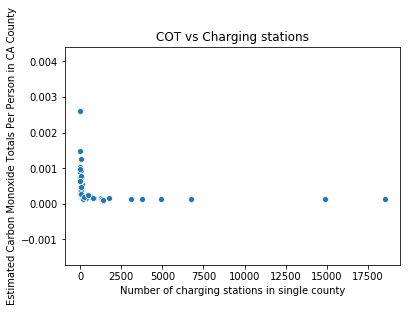

In [247]:
sns.scatterplot(data=df0_merged, x='Total', y='COT per capita')

plt.title('COT vs Charging stations')
plt.xlabel('Number of charging stations in single county')
plt.ylabel('Estimated Carbon Monoxide Totals Per Person in CA County')

Text(0, 0.5, 'Estimated Carbon Monoxide Totals in County')

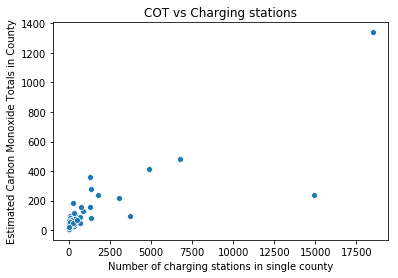

In [248]:
sns.scatterplot(data=df0_merged, x='Total', y='COT')

plt.title('COT vs Charging stations')
plt.xlabel('Number of charging stations in single county')
plt.ylabel('Estimated Carbon Monoxide Totals in County')

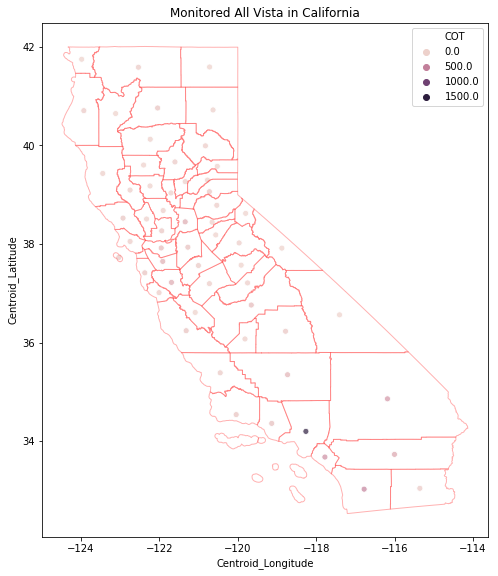

In [249]:
fig, ax = plt.subplots(figsize=(8,12))

# df0_merged[['geometry', 'COT']].plot(ax=ax, color = 'blue',)
sns.scatterplot(data=df0_merged, x='Centroid_Longitude', y='Centroid_Latitude', hue='COT')

counties_wgs84.plot(ax=ax, color = 'white', edgecolor='red', alpha = .3)

ax.axis('on') # You can optionally omit the axes

# Show a title
ax.set_title('Monitored All Vista in California')

plt.show()


In [250]:
counties_copy = counties_wgs84.copy()
counties_copy['County'] = counties_copy['NAME'].apply(lambda x: x.upper())

counties_copy = pd.merge(counties_copy, df0_merged.drop(['geometry'], axis=1), left_on='County', right_on='County_x', how='inner')
print(counties_copy.columns)
counties_copy.head()

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT',
       'ALAND_x', 'AWATER_x', 'INTPTLAT', 'INTPTLON', 'geometry',
       'Centroid_Latitude_x', 'Centroid_Longitude_x', 'County_x', 'ALAND_y',
       'AWATER_y', 'Centroid_Latitude_y', 'Centroid_Longitude_y', 'County_x',
       'Closest_County_Centroid', 'Composting Sites',
       'Compressed Natural Gas Fueling Station', 'Dairy', 'Digester',
       'Feed Lot', 'Landfill', 'Liquefied Natural Gas Fueling Station',
       'Natural Gas Processing Plants', 'Natural Gas Station',
       'Natural Gas Storage Field', 'Oil and Gas Facility Boundary',
       'Oil and Gas Field Boundary', 'Oil and Gas Well', 'Power Plant',
       'Refinery', 'Wastewater Treatment Plant', 'TOG', 'ROG', 'COT', 'NOX',
       'SOX', 'PM', 'PM10', 'PM2_5', 'Total Facilities', 'Public Level 1',
       'Shared Private Level 1', 'Public Level 2', 'Shared Private Level 2',
 

STATEFP COUNTYFP  COUNTYNS  GEOID           NAME              NAMELSAD LSAD  \
0      06      091  00277310  06091         Sierra         Sierra County   06   
1      06      067  00277298  06067     Sacramento     Sacramento County   06   
2      06      083  00277306  06083  Santa Barbara  Santa Barbara County   06   
3      06      009  01675885  06009      Calaveras      Calaveras County   06   
4      06      111  00277320  06111        Ventura        Ventura County   06   

  CLASSFP  MTFCC CSAFP  ... Shared Private Level 2 Public DC Fast  \
0      H1  G4020  None  ...                      0              0   
1      H1  G4020   472  ...                    802            179   
2      H1  G4020  None  ...                    167             39   
3      H1  G4020  None  ...                      0              0   
4      H1  G4020   348  ...                    326            122   

  Shared Private DC Fast  Total  Total Public EV Stations           AREA Rank  \
0                      0      1                         1         SIERRA   57   
1                      7   1765                       950     SACRAMENTO    8   
2                      3    461                       291  SANTA BARBARA   20   
3                      0      7                         7      CALAVERAS   44   
4                     19    868                       523        VENTURA   13   

               County_y  Population  COT per capita  
0         Sierra County        3005        0.002597  
1     Sacramento County     1552058        0.000152  
2  Santa Barbara County      446499        0.000222  
3      Calaveras County       45905        0.000458  
4        Ventura County      846006        0.000154  

[5 rows x 65 columns]

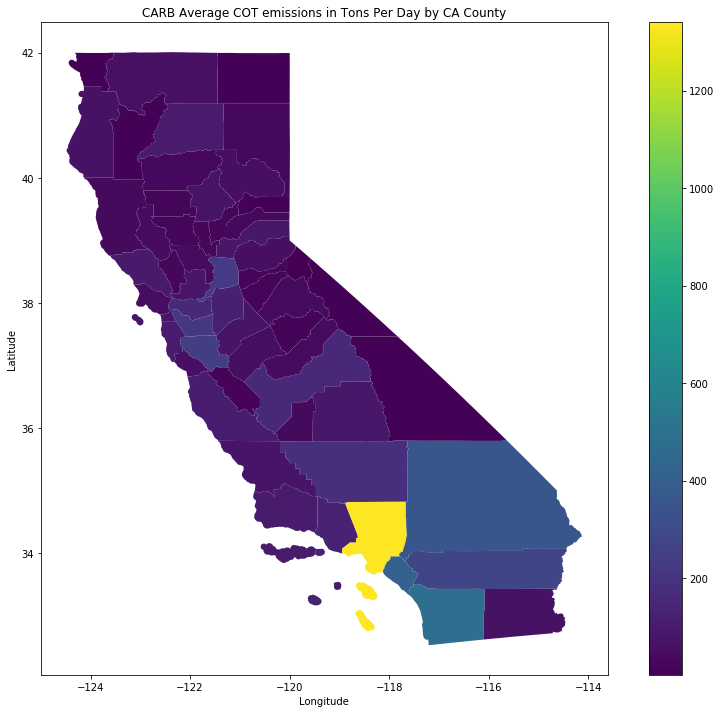

In [251]:

fig, ax = plt.subplots(figsize=(15,12))

# df0_merged[['geometry', 'COT']].plot(ax=ax, color = 'blue',)
# sns.scatterplot(data=df0_merged, x='Centroid_Longitude', y='Centroid_Latitude', hue='COT')

counties_plot = counties_copy.plot(ax=ax, column='COT', legend=True)

    
counties_plot.axis('on') # You can optionally omit the axes

# Show a title
counties_plot.set_title('CARB Average COT emissions in Tons Per Day by CA County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [292]:
# sns.scatterplot(data=aggregated_vista_ca_by_county_emseic_merged, x='Oil and Gas Field Boundary', y='PM')
'''
_data: a datframe to create scatter plots
y: the target variable
cols: the columns that you want to create a scatterplot with y

Plots all the scatter plots between y and each indivudal column specified in `cols`
'''
def standard_bulk_geoplot(_data, cols, titles, n_cols=2):
    assert len(cols) == len(titles)
    n = len(cols) ## this determines how many plots we need to make
    
    fig = plt.figure(figsize=(10, 10))
    
    rows = math.ceil(n / n_cols) ## this determines how many rows of 2 we will plot
    gs = fig.add_gridspec(rows, n_cols)
    
    switch = 0 ## flips betwen left and right plot on each row
    for i in range(n):
        c = cols[i]
        r = i // n_cols ## the current row of this iteration
        ax1 = fig.add_subplot(gs[r, switch])
        
        ## scatterplot
#         print(c, y)
        geo_plot = _data.plot(ax=ax1, column=c, legend=True)

    
        geo_plot.axis('on') # You can optionally omit the axes

        # Show a title
        plt.title(titles[i])
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        
        plt.tight_layout()
        
        ## move to other plot
        switch = i % n_cols

In [274]:
counties_copy.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT',
       'ALAND_x', 'AWATER_x', 'INTPTLAT', 'INTPTLON', 'geometry',
       'Centroid_Latitude_x', 'Centroid_Longitude_x', 'County_x', 'ALAND_y',
       'AWATER_y', 'Centroid_Latitude_y', 'Centroid_Longitude_y', 'County_x',
       'Closest_County_Centroid', 'Composting Sites',
       'Compressed Natural Gas Fueling Station', 'Dairy', 'Digester',
       'Feed Lot', 'Landfill', 'Liquefied Natural Gas Fueling Station',
       'Natural Gas Processing Plants', 'Natural Gas Station',
       'Natural Gas Storage Field', 'Oil and Gas Facility Boundary',
       'Oil and Gas Field Boundary', 'Oil and Gas Well', 'Power Plant',
       'Refinery', 'Wastewater Treatment Plant', 'TOG', 'ROG', 'COT', 'NOX',
       'SOX', 'PM', 'PM10', 'PM2_5', 'Total Facilities', 'Public Level 1',
       'Shared Private Level 1', 'Public Level 2', 'Shared Private Level 2',
 

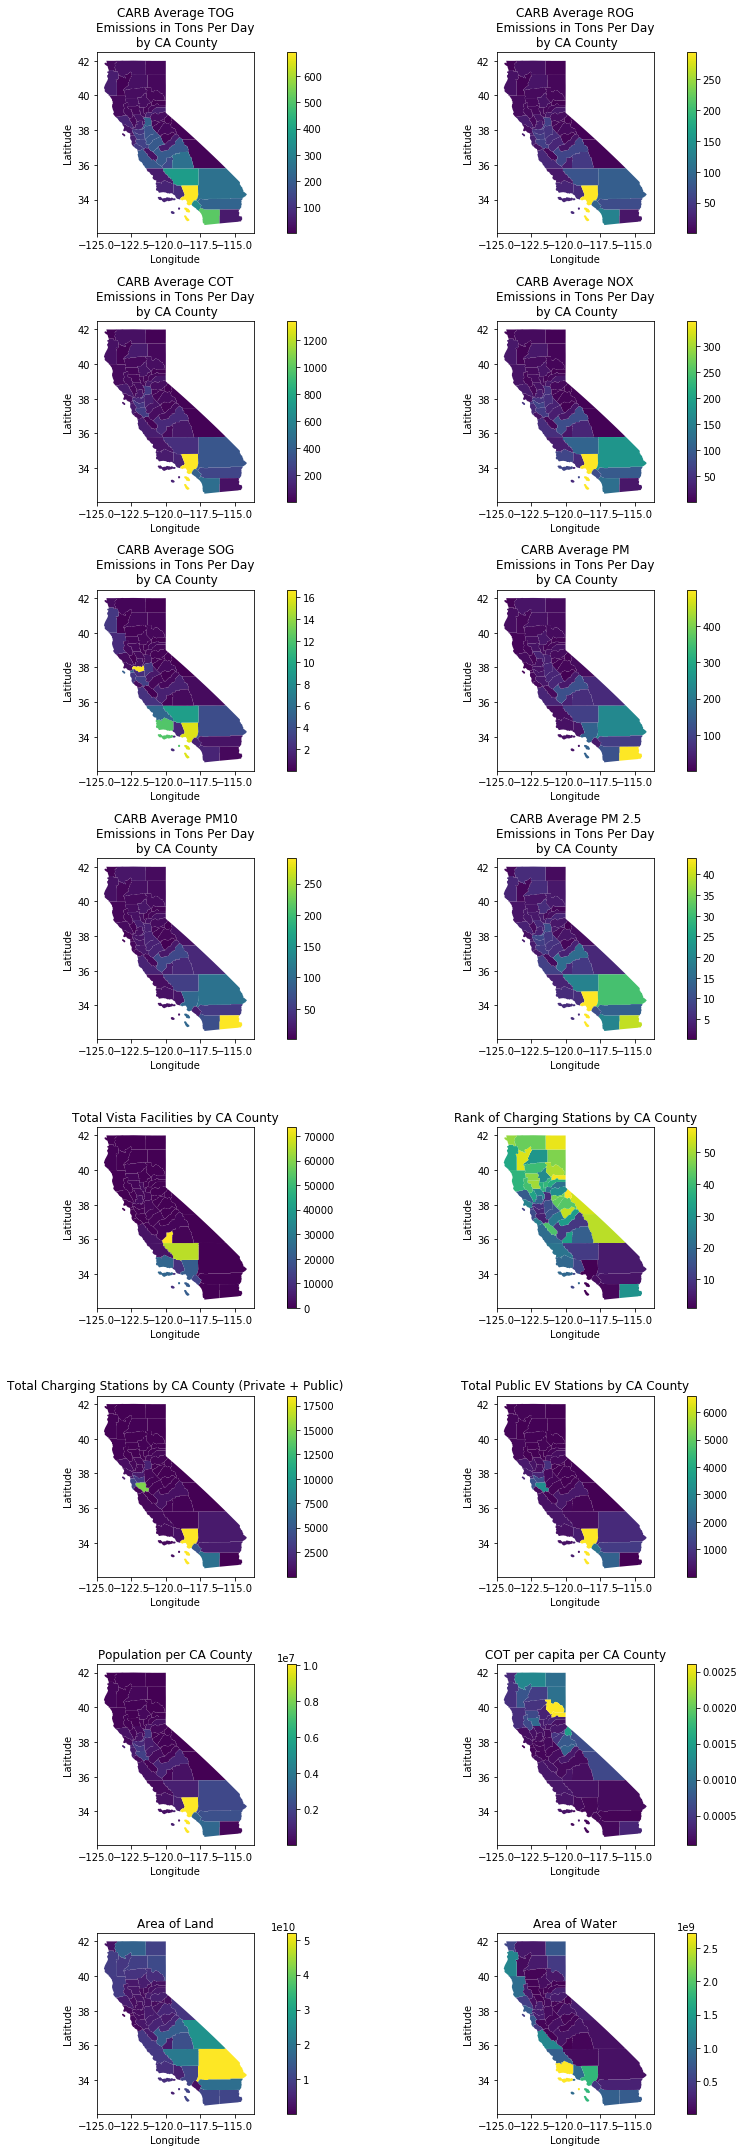

In [279]:
gpd_measurements_cols = ['TOG', 'ROG', 
                         'COT', 'NOX',
                         'SOX', 'PM', 
                         'PM10', 'PM2_5', 
                         'Total Facilities', 'Rank',
                         'Total', 'Total Public EV Stations',
                         'Population', 'COT per capita',
                         'ALAND_y','AWATER_y'
                        ]

gpd_measurements_titles = ['CARB Average TOG\nEmissions in Tons Per Day\n by CA County', 
                         'CARB Average ROG\nEmissions in Tons Per Day\n by CA County', 
                         'CARB Average COT\nEmissions in Tons Per Day\n by CA County', 
                         'CARB Average NOX\nEmissions in Tons Per Day\n by CA County', 
                         'CARB Average SOG\nEmissions in Tons Per Day\n by CA County', 
                         'CARB Average PM\nEmissions in Tons Per Day\n by CA County', 
                         'CARB Average PM10\nEmissions in Tons Per Day\n by CA County', 
                         'CARB Average PM 2.5\nEmissions in Tons Per Day\n by CA County',
                         'Total Vista Facilities by CA County',
                           'Rank of Charging Stations by CA County',
                         'Total Charging Stations by CA County (Private + Public)',
                         'Total Public EV Stations by CA County',
                         'Population per CA County', 
                         'COT per capita per CA County',
                           'Area of Land', 'Area of Water'
                        ]

standard_bulk_geoplot(counties_copy, gpd_measurements_cols, gpd_measurements_titles)

/Library/Python/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


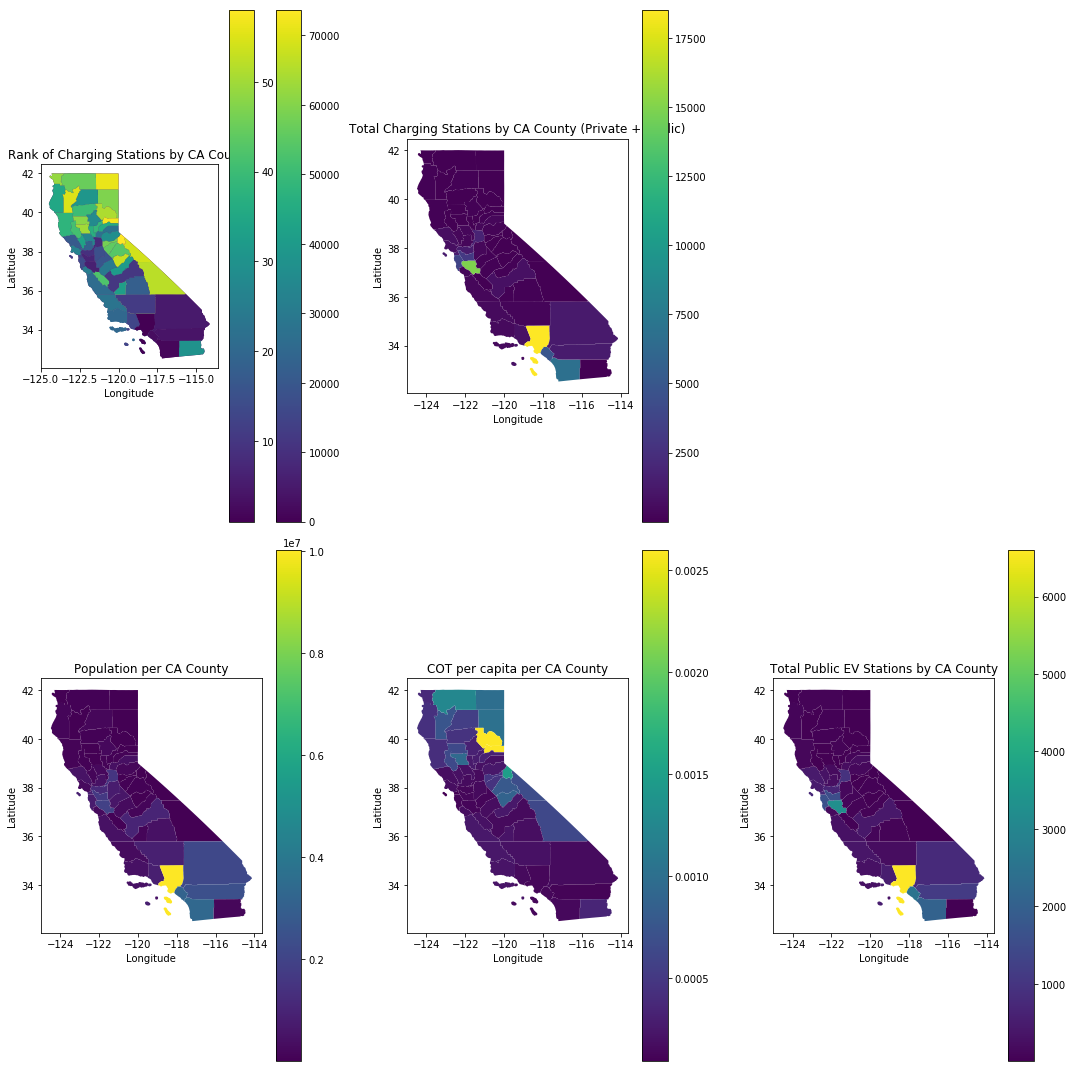

In [293]:
gpd_measurements_cols = [
                         'Total Facilities', 'Rank',
                         'Total', 'Total Public EV Stations',
                         'Population', 'COT per capita'
                        ]

gpd_measurements_titles = [
                         'Total Vista Facilities by CA County',
                           'Rank of Charging Stations by CA County',
                         'Total Charging Stations by CA County (Private + Public)',
                         'Total Public EV Stations by CA County',
                         'Population per CA County', 
                         'COT per capita per CA County'
                        ]

standard_bulk_geoplot(counties_copy, gpd_measurements_cols, gpd_measurements_titles)